**Updates:**

1. Changed Model from Classification to Regression in order to gain better Accuracy. Thanks for feedback @Aditya Soni.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
train = pd.read_csv("C:/Users/Katta's/PycharmProjects/data/usecase1/train.csv")
train.head()


In [5]:
train.isnull().sum().sum()

0

In [6]:
#There are no null values in the data provided

In [8]:
test = pd.read_csv("C:/Users/Katta's/PycharmProjects/data/usecase1/test.csv")
test.head()
print(test.shape)

(200000, 201)


In [9]:
X_train = train.drop(['ID_code', 'target'], axis = 1)
X_train.head()
print(X_train.shape)

(200000, 200)


In [10]:
y_train = train['target']
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [11]:
X_test = test.drop(['ID_code'], axis = 1)
X_test.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [13]:
test.isnull().sum().sum()

0

In [14]:
X_train.var()

var_0        9.241909
var_1       16.402858
var_2        6.974322
var_3        4.175153
var_4        2.634614
var_5       61.830963
var_6        0.751008
var_7       11.683241
var_8       11.106446
var_9        1.525398
var_10      30.258724
var_11      35.643922
var_12       0.036123
var_13      21.525290
var_14       5.053091
var_15       0.169506
var_16       6.540402
var_17      45.059166
var_18      61.644015
var_19      63.947112
var_20      34.530360
var_21      67.183656
var_22       8.110864
var_23       0.277617
var_24      14.267582
var_25       0.081530
var_26      35.072569
var_27       2.321705
var_28       0.613664
var_29       6.843150
              ...    
var_170     19.577270
var_171     28.922975
var_172     75.241236
var_173     35.601200
var_174     50.928585
var_175      8.364631
var_176     56.459280
var_177      6.911087
var_178     73.613144
var_179      7.834157
var_180     27.680674
var_181      1.882006
var_182     80.343150
var_183     20.024944
var_184   

In [15]:
# As the variance is high, we need to scale out the features

In [17]:
ss = StandardScaler()
X_train_Scaled = ss.fit_transform(X_train)

In [18]:
X_test_Scaled = ss.transform(X_test)

In [19]:
y_train.value_counts(dropna=False)

0    179902
1     20098
Name: target, dtype: int64

In [20]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)

In [21]:
model = Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
history = model.fit(X_train_Scaled, encoded_Y, epochs=10, batch_size = 32, shuffle=True, verbose=1)

Instructions for updating:
Use tf.cast instead.


Epoch 1/10


    32/200000 [..............................] - ETA: 32:36 - loss: 0.5252 - acc: 0.5000

   928/200000 [..............................] - ETA: 1:18 - loss: 0.2817 - acc: 0.6983 

  1760/200000 [..............................] - ETA: 46s - loss: 0.2126 - acc: 0.7756 

  2688/200000 [..............................] - ETA: 34s - loss: 0.1729 - acc: 0.8192



  3680/200000 [..............................] - ETA: 27s - loss: 0.1553 - acc: 0.8359

  4576/200000 [..............................] - ETA: 24s - loss: 0.1436 - acc: 0.8462

  5536/200000 [..............................] - ETA: 21s - loss: 0.1351 - acc: 0.8544

  6560/200000 [..............................] - ETA: 19s - loss: 0.1265 - acc: 0.8634

  7616/200000 [>.............................] - ETA: 18s - loss: 0.1207 - acc: 0.8676

  8576/200000 [>.............................] - ETA: 17s - loss: 0.1169 - acc: 0.8708

  9568/200000 [>.............................] - ETA: 16s - loss: 0.1126 - acc: 0.8749

 10592/200000 [>.............................] - ETA: 15s - loss: 0.1099 - acc: 0.8764

 11584/200000 [>.............................] - ETA: 15s - loss: 0.1084 - acc: 0.8767

 12608/200000 [>.............................] - ETA: 14s - loss: 0.1063 - acc: 0.8786

 13664/200000 [=>............................] - ETA: 14s - loss: 0.1042 - acc: 0.8798



 14688/200000 [=>............................] - ETA: 13s - loss: 0.1024 - acc: 0.8815

 15392/200000 [=>............................] - ETA: 13s - loss: 0.1009 - acc: 0.8828

 16256/200000 [=>............................] - ETA: 13s - loss: 0.1002 - acc: 0.8832

 17312/200000 [=>............................] - ETA: 13s - loss: 0.0988 - acc: 0.8845

 18368/200000 [=>............................] - ETA: 12s - loss: 0.0975 - acc: 0.8857

 19456/200000 [=>............................] - ETA: 12s - loss: 0.0958 - acc: 0.8874

 20512/200000 [==>...........................] - ETA: 12s - loss: 0.0947 - acc: 0.8887

 21440/200000 [==>...........................] - ETA: 11s - loss: 0.0935 - acc: 0.8898

 22400/200000 [==>...........................] - ETA: 11s - loss: 0.0923 - acc: 0.8913

 23424/200000 [==>...........................] - ETA: 11s - loss: 0.0914 - acc: 0.8920

 24448/200000 [==>...........................] - ETA: 11s - loss: 0.0902 - acc: 0.8932

 25504/200000 [==>...........................] - ETA: 11s - loss: 0.0891 - acc: 0.8943

 26592/200000 [==>...........................] - ETA: 11s - loss: 0.0886 - acc: 0.8947

 27584/200000 [===>..........................] - ETA: 10s - loss: 0.0880 - acc: 0.8951

 28512/200000 [===>..........................] - ETA: 10s - loss: 0.0876 - acc: 0.8956

 29568/200000 [===>..........................] - ETA: 10s - loss: 0.0869 - acc: 0.8961

 30592/200000 [===>..........................] - ETA: 10s - loss: 0.0863 - acc: 0.8966

 31680/200000 [===>..........................] - ETA: 10s - loss: 0.0859 - acc: 0.8970

 32768/200000 [===>..........................] - ETA: 10s - loss: 0.0856 - acc: 0.8972

 33760/200000 [====>.........................] - ETA: 10s - loss: 0.0850 - acc: 0.8976

 34656/200000 [====>.........................] - ETA: 10s - loss: 0.0847 - acc: 0.8978

 35680/200000 [====>.........................] - ETA: 9s - loss: 0.0843 - acc: 0.8983 

 36704/200000 [====>.........................] - ETA: 9s - loss: 0.0839 - acc: 0.8986

 37760/200000 [====>.........................] - ETA: 9s - loss: 0.0835 - acc: 0.8989

 38816/200000 [====>.........................] - ETA: 9s - loss: 0.0832 - acc: 0.8993

 39808/200000 [====>.........................] - ETA: 9s - loss: 0.0827 - acc: 0.8999

 40704/200000 [=====>........................] - ETA: 9s - loss: 0.0822 - acc: 0.9007

 41728/200000 [=====>........................] - ETA: 9s - loss: 0.0817 - acc: 0.9011

 42784/200000 [=====>........................] - ETA: 9s - loss: 0.0815 - acc: 0.9012

 43872/200000 [=====>........................] - ETA: 9s - loss: 0.0813 - acc: 0.9013

 44960/200000 [=====>........................] - ETA: 9s - loss: 0.0808 - acc: 0.9018

 45888/200000 [=====>........................] - ETA: 8s - loss: 0.0808 - acc: 0.9017

 46816/200000 [======>.......................] - ETA: 8s - loss: 0.0804 - acc: 0.9021

 47840/200000 [======>.......................] - ETA: 8s - loss: 0.0802 - acc: 0.9024

 48896/200000 [======>.......................] - ETA: 8s - loss: 0.0802 - acc: 0.9022

 49888/200000 [======>.......................] - ETA: 8s - loss: 0.0800 - acc: 0.9023

 50944/200000 [======>.......................] - ETA: 8s - loss: 0.0797 - acc: 0.9026

 51840/200000 [======>.......................] - ETA: 8s - loss: 0.0795 - acc: 0.9029

 52800/200000 [======>.......................] - ETA: 8s - loss: 0.0793 - acc: 0.9030

 53824/200000 [=======>......................] - ETA: 8s - loss: 0.0790 - acc: 0.9034

 54880/200000 [=======>......................] - ETA: 8s - loss: 0.0788 - acc: 0.9036

 55968/200000 [=======>......................] - ETA: 8s - loss: 0.0784 - acc: 0.9039

 57024/200000 [=======>......................] - ETA: 8s - loss: 0.0782 - acc: 0.9040

 57952/200000 [=======>......................] - ETA: 8s - loss: 0.0780 - acc: 0.9043

 58912/200000 [=======>......................] - ETA: 7s - loss: 0.0778 - acc: 0.9044

 59968/200000 [=======>......................] - ETA: 7s - loss: 0.0777 - acc: 0.9046

 61056/200000 [========>.....................] - ETA: 7s - loss: 0.0775 - acc: 0.9047

 62048/200000 [========>.....................] - ETA: 7s - loss: 0.0774 - acc: 0.9048

 63072/200000 [========>.....................] - ETA: 7s - loss: 0.0773 - acc: 0.9049

 64000/200000 [========>.....................] - ETA: 7s - loss: 0.0771 - acc: 0.9050

 64992/200000 [========>.....................] - ETA: 7s - loss: 0.0769 - acc: 0.9052

 66048/200000 [========>.....................] - ETA: 7s - loss: 0.0769 - acc: 0.9050

 67104/200000 [=========>....................] - ETA: 7s - loss: 0.0768 - acc: 0.9052

 68128/200000 [=========>....................] - ETA: 7s - loss: 0.0767 - acc: 0.9052

 69184/200000 [=========>....................] - ETA: 7s - loss: 0.0766 - acc: 0.9053

 70112/200000 [=========>....................] - ETA: 7s - loss: 0.0765 - acc: 0.9055

 71040/200000 [=========>....................] - ETA: 7s - loss: 0.0763 - acc: 0.9057

 72000/200000 [=========>....................] - ETA: 7s - loss: 0.0763 - acc: 0.9058

 73120/200000 [=========>....................] - ETA: 7s - loss: 0.0762 - acc: 0.9059



 74144/200000 [==========>...................] - ETA: 6s - loss: 0.0762 - acc: 0.9058

 75008/200000 [==========>...................] - ETA: 6s - loss: 0.0760 - acc: 0.9060

 75872/200000 [==========>...................] - ETA: 6s - loss: 0.0758 - acc: 0.9061

 76800/200000 [==========>...................] - ETA: 6s - loss: 0.0757 - acc: 0.9062

 77824/200000 [==========>...................] - ETA: 6s - loss: 0.0757 - acc: 0.9062

 78816/200000 [==========>...................] - ETA: 6s - loss: 0.0756 - acc: 0.9063

 79872/200000 [==========>...................] - ETA: 6s - loss: 0.0754 - acc: 0.9064

 80864/200000 [===========>..................] - ETA: 6s - loss: 0.0754 - acc: 0.9065

 81920/200000 [===========>..................] - ETA: 6s - loss: 0.0754 - acc: 0.9065

 82752/200000 [===========>..................] - ETA: 6s - loss: 0.0754 - acc: 0.9065

 83776/200000 [===========>..................] - ETA: 6s - loss: 0.0754 - acc: 0.9064

 84768/200000 [===========>..................] - ETA: 6s - loss: 0.0752 - acc: 0.9065

 85856/200000 [===========>..................] - ETA: 6s - loss: 0.0751 - acc: 0.9067

 86912/200000 [============>.................] - ETA: 6s - loss: 0.0750 - acc: 0.9068

 87936/200000 [============>.................] - ETA: 6s - loss: 0.0748 - acc: 0.9071

 88800/200000 [============>.................] - ETA: 6s - loss: 0.0746 - acc: 0.9072

 89728/200000 [============>.................] - ETA: 6s - loss: 0.0746 - acc: 0.9072

 90752/200000 [============>.................] - ETA: 5s - loss: 0.0746 - acc: 0.9072

 91776/200000 [============>.................] - ETA: 5s - loss: 0.0746 - acc: 0.9072

 92800/200000 [============>.................] - ETA: 5s - loss: 0.0745 - acc: 0.9073

 93856/200000 [=============>................] - ETA: 5s - loss: 0.0744 - acc: 0.9074

 94752/200000 [=============>................] - ETA: 5s - loss: 0.0744 - acc: 0.9073

 95648/200000 [=============>................] - ETA: 5s - loss: 0.0743 - acc: 0.9074

 96640/200000 [=============>................] - ETA: 5s - loss: 0.0744 - acc: 0.9073

 97696/200000 [=============>................] - ETA: 5s - loss: 0.0744 - acc: 0.9073

 98752/200000 [=============>................] - ETA: 5s - loss: 0.0744 - acc: 0.9072

 99808/200000 [=============>................] - ETA: 5s - loss: 0.0744 - acc: 0.9072

100736/200000 [==============>...............] - ETA: 5s - loss: 0.0744 - acc: 0.9072

101696/200000 [==============>...............] - ETA: 5s - loss: 0.0743 - acc: 0.9074

102688/200000 [==============>...............] - ETA: 5s - loss: 0.0741 - acc: 0.9075

103712/200000 [==============>...............] - ETA: 5s - loss: 0.0742 - acc: 0.9074

104736/200000 [==============>...............] - ETA: 5s - loss: 0.0742 - acc: 0.9073

105760/200000 [==============>...............] - ETA: 5s - loss: 0.0740 - acc: 0.9076

106720/200000 [===============>..............] - ETA: 5s - loss: 0.0739 - acc: 0.9077

107584/200000 [===============>..............] - ETA: 5s - loss: 0.0739 - acc: 0.9077

108576/200000 [===============>..............] - ETA: 4s - loss: 0.0739 - acc: 0.9077

109536/200000 [===============>..............] - ETA: 4s - loss: 0.0738 - acc: 0.9078

110592/200000 [===============>..............] - ETA: 4s - loss: 0.0737 - acc: 0.9079

111616/200000 [===============>..............] - ETA: 4s - loss: 0.0737 - acc: 0.9079

112704/200000 [===============>..............] - ETA: 4s - loss: 0.0737 - acc: 0.9079

113568/200000 [================>.............] - ETA: 4s - loss: 0.0736 - acc: 0.9079

114496/200000 [================>.............] - ETA: 4s - loss: 0.0735 - acc: 0.9080

115552/200000 [================>.............] - ETA: 4s - loss: 0.0734 - acc: 0.9081

116640/200000 [================>.............] - ETA: 4s - loss: 0.0734 - acc: 0.9081

117696/200000 [================>.............] - ETA: 4s - loss: 0.0734 - acc: 0.9081

118624/200000 [================>.............] - ETA: 4s - loss: 0.0734 - acc: 0.9081

119584/200000 [================>.............] - ETA: 4s - loss: 0.0734 - acc: 0.9081

120672/200000 [=================>............] - ETA: 4s - loss: 0.0734 - acc: 0.9080

121792/200000 [=================>............] - ETA: 4s - loss: 0.0734 - acc: 0.9080

122912/200000 [=================>............] - ETA: 4s - loss: 0.0735 - acc: 0.9079

124032/200000 [=================>............] - ETA: 4s - loss: 0.0734 - acc: 0.9080

125184/200000 [=================>............] - ETA: 4s - loss: 0.0733 - acc: 0.9081



126304/200000 [=================>............] - ETA: 3s - loss: 0.0733 - acc: 0.9082

127136/200000 [==================>...........] - ETA: 3s - loss: 0.0733 - acc: 0.9082

128160/200000 [==================>...........] - ETA: 3s - loss: 0.0733 - acc: 0.9082

129216/200000 [==================>...........] - ETA: 3s - loss: 0.0733 - acc: 0.9081

130336/200000 [==================>...........] - ETA: 3s - loss: 0.0734 - acc: 0.9079

131488/200000 [==================>...........] - ETA: 3s - loss: 0.0733 - acc: 0.9079

132576/200000 [==================>...........] - ETA: 3s - loss: 0.0733 - acc: 0.9079

133664/200000 [===================>..........] - ETA: 3s - loss: 0.0732 - acc: 0.9080

134752/200000 [===================>..........] - ETA: 3s - loss: 0.0732 - acc: 0.9079

135840/200000 [===================>..........] - ETA: 3s - loss: 0.0732 - acc: 0.9079

136992/200000 [===================>..........] - ETA: 3s - loss: 0.0732 - acc: 0.9078



138112/200000 [===================>..........] - ETA: 3s - loss: 0.0731 - acc: 0.9080

139072/200000 [===================>..........] - ETA: 3s - loss: 0.0731 - acc: 0.9081

140064/200000 [====================>.........] - ETA: 3s - loss: 0.0730 - acc: 0.9082

141120/200000 [====================>.........] - ETA: 3s - loss: 0.0730 - acc: 0.9082

142208/200000 [====================>.........] - ETA: 3s - loss: 0.0729 - acc: 0.9083

143264/200000 [====================>.........] - ETA: 3s - loss: 0.0729 - acc: 0.9084

144352/200000 [====================>.........] - ETA: 2s - loss: 0.0728 - acc: 0.9083



145504/200000 [====================>.........] - ETA: 2s - loss: 0.0728 - acc: 0.9084

146464/200000 [====================>.........] - ETA: 2s - loss: 0.0727 - acc: 0.9085

147232/200000 [=====================>........] - ETA: 2s - loss: 0.0727 - acc: 0.9085

148288/200000 [=====================>........] - ETA: 2s - loss: 0.0727 - acc: 0.9085

149408/200000 [=====================>........] - ETA: 2s - loss: 0.0726 - acc: 0.9086

150528/200000 [=====================>........] - ETA: 2s - loss: 0.0725 - acc: 0.9087

151648/200000 [=====================>........] - ETA: 2s - loss: 0.0725 - acc: 0.9088

152768/200000 [=====================>........] - ETA: 2s - loss: 0.0724 - acc: 0.9088

153856/200000 [======================>.......] - ETA: 2s - loss: 0.0724 - acc: 0.9088

154976/200000 [======================>.......] - ETA: 2s - loss: 0.0724 - acc: 0.9087

156096/200000 [======================>.......] - ETA: 2s - loss: 0.0724 - acc: 0.9087

157216/200000 [======================>.......] - ETA: 2s - loss: 0.0724 - acc: 0.9087

158336/200000 [======================>.......] - ETA: 2s - loss: 0.0724 - acc: 0.9088

159488/200000 [======================>.......] - ETA: 2s - loss: 0.0724 - acc: 0.9088

160608/200000 [=======================>......] - ETA: 2s - loss: 0.0724 - acc: 0.9087

161760/200000 [=======================>......] - ETA: 1s - loss: 0.0724 - acc: 0.9087

162880/200000 [=======================>......] - ETA: 1s - loss: 0.0723 - acc: 0.9088

164000/200000 [=======================>......] - ETA: 1s - loss: 0.0723 - acc: 0.9089

165120/200000 [=======================>......] - ETA: 1s - loss: 0.0723 - acc: 0.9088

166240/200000 [=======================>......] - ETA: 1s - loss: 0.0722 - acc: 0.9089

167328/200000 [========================>.....] - ETA: 1s - loss: 0.0723 - acc: 0.9088

168320/200000 [========================>.....] - ETA: 1s - loss: 0.0722 - acc: 0.9089



169344/200000 [========================>.....] - ETA: 1s - loss: 0.0722 - acc: 0.9089

170336/200000 [========================>.....] - ETA: 1s - loss: 0.0723 - acc: 0.9088

171296/200000 [========================>.....] - ETA: 1s - loss: 0.0722 - acc: 0.9088

172384/200000 [========================>.....] - ETA: 1s - loss: 0.0722 - acc: 0.9088



173536/200000 [=========================>....] - ETA: 1s - loss: 0.0722 - acc: 0.9088

174528/200000 [=========================>....] - ETA: 1s - loss: 0.0721 - acc: 0.9090

175552/200000 [=========================>....] - ETA: 1s - loss: 0.0721 - acc: 0.9090

176672/200000 [=========================>....] - ETA: 1s - loss: 0.0721 - acc: 0.9090

177824/200000 [=========================>....] - ETA: 1s - loss: 0.0722 - acc: 0.9089

178912/200000 [=========================>....] - ETA: 1s - loss: 0.0722 - acc: 0.9089

180064/200000 [==========================>...] - ETA: 1s - loss: 0.0722 - acc: 0.9089

181216/200000 [==========================>...] - ETA: 0s - loss: 0.0721 - acc: 0.9090

182304/200000 [==========================>...] - ETA: 0s - loss: 0.0721 - acc: 0.9090

183424/200000 [==========================>...] - ETA: 0s - loss: 0.0721 - acc: 0.9090

184576/200000 [==========================>...] - ETA: 0s - loss: 0.0720 - acc: 0.9091



185728/200000 [==========================>...] - ETA: 0s - loss: 0.0720 - acc: 0.9092

186400/200000 [==========================>...] - ETA: 0s - loss: 0.0720 - acc: 0.9091

187424/200000 [===========================>..] - ETA: 0s - loss: 0.0719 - acc: 0.9092

188544/200000 [===========================>..] - ETA: 0s - loss: 0.0719 - acc: 0.9092

189696/200000 [===========================>..] - ETA: 0s - loss: 0.0719 - acc: 0.9092

190784/200000 [===========================>..] - ETA: 0s - loss: 0.0719 - acc: 0.9093

191936/200000 [===========================>..] - ETA: 0s - loss: 0.0718 - acc: 0.9093



193056/200000 [===========================>..] - ETA: 0s - loss: 0.0718 - acc: 0.9094

194048/200000 [============================>.] - ETA: 0s - loss: 0.0717 - acc: 0.9094

195104/200000 [============================>.] - ETA: 0s - loss: 0.0717 - acc: 0.9094

196128/200000 [============================>.] - ETA: 0s - loss: 0.0717 - acc: 0.9094

196928/200000 [============================>.] - ETA: 0s - loss: 0.0717 - acc: 0.9095

197952/200000 [============================>.] - ETA: 0s - loss: 0.0716 - acc: 0.9096

198944/200000 [============================>.] - ETA: 0s - loss: 0.0716 - acc: 0.9097

199968/200000 [============================>.] - ETA: 0s - loss: 0.0715 - acc: 0.9097

200000/200000 [==============================] - 10s 52us/step - loss: 0.0716 - acc: 0.9097


Epoch 2/10
    32/200000 [..............................] - ETA: 1:39 - loss: 0.0743 - acc: 0.8750

   992/200000 [..............................] - ETA: 13s - loss: 0.0607 - acc: 0.9264 

  1792/200000 [..............................] - ETA: 13s - loss: 0.0628 - acc: 0.9230

  2656/200000 [..............................] - ETA: 12s - loss: 0.0630 - acc: 0.9239

  3520/200000 [..............................] - ETA: 12s - loss: 0.0642 - acc: 0.9207

  4480/200000 [..............................] - ETA: 11s - loss: 0.0652 - acc: 0.9199



  5536/200000 [..............................] - ETA: 11s - loss: 0.0649 - acc: 0.9200

  6528/200000 [..............................] - ETA: 11s - loss: 0.0660 - acc: 0.9173

  7456/200000 [>.............................] - ETA: 11s - loss: 0.0661 - acc: 0.9163

  8448/200000 [>.............................] - ETA: 10s - loss: 0.0662 - acc: 0.9161

  9440/200000 [>.............................] - ETA: 10s - loss: 0.0657 - acc: 0.9159

 10528/200000 [>.............................] - ETA: 10s - loss: 0.0658 - acc: 0.9157

 11584/200000 [>.............................] - ETA: 10s - loss: 0.0664 - acc: 0.9143



 12736/200000 [>.............................] - ETA: 10s - loss: 0.0666 - acc: 0.9137

 13600/200000 [=>............................] - ETA: 10s - loss: 0.0667 - acc: 0.9135

 14560/200000 [=>............................] - ETA: 10s - loss: 0.0664 - acc: 0.9141

 15616/200000 [=>............................] - ETA: 9s - loss: 0.0667 - acc: 0.9139 

 16736/200000 [=>............................] - ETA: 9s - loss: 0.0669 - acc: 0.9138

 17856/200000 [=>............................] - ETA: 9s - loss: 0.0671 - acc: 0.9133

 18880/200000 [=>............................] - ETA: 9s - loss: 0.0668 - acc: 0.9141



 20000/200000 [==>...........................] - ETA: 9s - loss: 0.0669 - acc: 0.9138

 20864/200000 [==>...........................] - ETA: 9s - loss: 0.0664 - acc: 0.9144

 21856/200000 [==>...........................] - ETA: 9s - loss: 0.0664 - acc: 0.9143

 22944/200000 [==>...........................] - ETA: 9s - loss: 0.0667 - acc: 0.9140

 24064/200000 [==>...........................] - ETA: 9s - loss: 0.0668 - acc: 0.9136

 25184/200000 [==>...........................] - ETA: 9s - loss: 0.0666 - acc: 0.9139

 26336/200000 [==>...........................] - ETA: 8s - loss: 0.0662 - acc: 0.9146



 27488/200000 [===>..........................] - ETA: 8s - loss: 0.0662 - acc: 0.9144

 28480/200000 [===>..........................] - ETA: 8s - loss: 0.0662 - acc: 0.9148

 29504/200000 [===>..........................] - ETA: 8s - loss: 0.0661 - acc: 0.9150

 30624/200000 [===>..........................] - ETA: 8s - loss: 0.0666 - acc: 0.9140



 31680/200000 [===>..........................] - ETA: 8s - loss: 0.0663 - acc: 0.9143

 32640/200000 [===>..........................] - ETA: 8s - loss: 0.0662 - acc: 0.9142

 33664/200000 [====>.........................] - ETA: 8s - loss: 0.0662 - acc: 0.9143

 34784/200000 [====>.........................] - ETA: 8s - loss: 0.0658 - acc: 0.9146



 35872/200000 [====>.........................] - ETA: 8s - loss: 0.0662 - acc: 0.9142

 36864/200000 [====>.........................] - ETA: 8s - loss: 0.0662 - acc: 0.9142

 37856/200000 [====>.........................] - ETA: 8s - loss: 0.0661 - acc: 0.9143

 38976/200000 [====>.........................] - ETA: 8s - loss: 0.0661 - acc: 0.9142

 40096/200000 [=====>........................] - ETA: 8s - loss: 0.0662 - acc: 0.9140

 41216/200000 [=====>........................] - ETA: 7s - loss: 0.0666 - acc: 0.9135

 42368/200000 [=====>........................] - ETA: 7s - loss: 0.0670 - acc: 0.9128



 43488/200000 [=====>........................] - ETA: 7s - loss: 0.0667 - acc: 0.9132

 44512/200000 [=====>........................] - ETA: 7s - loss: 0.0670 - acc: 0.9129

 45568/200000 [=====>........................] - ETA: 7s - loss: 0.0671 - acc: 0.9127

 46688/200000 [======>.......................] - ETA: 7s - loss: 0.0669 - acc: 0.9131

 47840/200000 [======>.......................] - ETA: 7s - loss: 0.0668 - acc: 0.9132

 48992/200000 [======>.......................] - ETA: 7s - loss: 0.0669 - acc: 0.9131

 50144/200000 [======>.......................] - ETA: 7s - loss: 0.0669 - acc: 0.9131

 51264/200000 [======>.......................] - ETA: 7s - loss: 0.0668 - acc: 0.9132

 52416/200000 [======>.......................] - ETA: 7s - loss: 0.0668 - acc: 0.9133

 53536/200000 [=======>......................] - ETA: 7s - loss: 0.0667 - acc: 0.9134

 54656/200000 [=======>......................] - ETA: 7s - loss: 0.0668 - acc: 0.9134

 55808/200000 [=======>......................] - ETA: 7s - loss: 0.0669 - acc: 0.9132

 56928/200000 [=======>......................] - ETA: 6s - loss: 0.0669 - acc: 0.9131

 58016/200000 [=======>......................] - ETA: 6s - loss: 0.0670 - acc: 0.9129



 59168/200000 [=======>......................] - ETA: 6s - loss: 0.0671 - acc: 0.9128

 60160/200000 [========>.....................] - ETA: 6s - loss: 0.0671 - acc: 0.9128

 61216/200000 [========>.....................] - ETA: 6s - loss: 0.0670 - acc: 0.9127

 62336/200000 [========>.....................] - ETA: 6s - loss: 0.0670 - acc: 0.9128



 63488/200000 [========>.....................] - ETA: 6s - loss: 0.0671 - acc: 0.9125

 64384/200000 [========>.....................] - ETA: 6s - loss: 0.0671 - acc: 0.9125

 65408/200000 [========>.....................] - ETA: 6s - loss: 0.0670 - acc: 0.9126

 66528/200000 [========>.....................] - ETA: 6s - loss: 0.0671 - acc: 0.9125

 67648/200000 [=========>....................] - ETA: 6s - loss: 0.0671 - acc: 0.9124

 68768/200000 [=========>....................] - ETA: 6s - loss: 0.0673 - acc: 0.9123

 69920/200000 [=========>....................] - ETA: 6s - loss: 0.0671 - acc: 0.9126



 71072/200000 [=========>....................] - ETA: 6s - loss: 0.0671 - acc: 0.9127

 72064/200000 [=========>....................] - ETA: 6s - loss: 0.0670 - acc: 0.9128

 73056/200000 [=========>....................] - ETA: 6s - loss: 0.0671 - acc: 0.9127

 74144/200000 [==========>...................] - ETA: 6s - loss: 0.0671 - acc: 0.9127

 75296/200000 [==========>...................] - ETA: 6s - loss: 0.0672 - acc: 0.9126

 76448/200000 [==========>...................] - ETA: 5s - loss: 0.0672 - acc: 0.9125

 77600/200000 [==========>...................] - ETA: 5s - loss: 0.0672 - acc: 0.9125

 78720/200000 [==========>...................] - ETA: 5s - loss: 0.0672 - acc: 0.9125

 79872/200000 [==========>...................] - ETA: 5s - loss: 0.0674 - acc: 0.9124

 81024/200000 [===========>..................] - ETA: 5s - loss: 0.0673 - acc: 0.9125

 82208/200000 [===========>..................] - ETA: 5s - loss: 0.0673 - acc: 0.9126

 83360/200000 [===========>..................] - ETA: 5s - loss: 0.0673 - acc: 0.9126

 84480/200000 [===========>..................] - ETA: 5s - loss: 0.0675 - acc: 0.9124

 85504/200000 [===========>..................] - ETA: 5s - loss: 0.0675 - acc: 0.9124

 86592/200000 [===========>..................] - ETA: 5s - loss: 0.0676 - acc: 0.9123

 87744/200000 [============>.................] - ETA: 5s - loss: 0.0675 - acc: 0.9124

 88896/200000 [============>.................] - ETA: 5s - loss: 0.0675 - acc: 0.9123

 90048/200000 [============>.................] - ETA: 5s - loss: 0.0674 - acc: 0.9125

 91200/200000 [============>.................] - ETA: 5s - loss: 0.0674 - acc: 0.9125

 92352/200000 [============>.................] - ETA: 5s - loss: 0.0674 - acc: 0.9126

 93504/200000 [=============>................] - ETA: 5s - loss: 0.0675 - acc: 0.9125

 94656/200000 [=============>................] - ETA: 5s - loss: 0.0674 - acc: 0.9126



 95808/200000 [=============>................] - ETA: 4s - loss: 0.0674 - acc: 0.9125

 96768/200000 [=============>................] - ETA: 4s - loss: 0.0675 - acc: 0.9124

 97824/200000 [=============>................] - ETA: 4s - loss: 0.0675 - acc: 0.9124

 98944/200000 [=============>................] - ETA: 4s - loss: 0.0673 - acc: 0.9126

100000/200000 [==============>...............] - ETA: 4s - loss: 0.0675 - acc: 0.9125

101120/200000 [==============>...............] - ETA: 4s - loss: 0.0674 - acc: 0.9126

102272/200000 [==============>...............] - ETA: 4s - loss: 0.0674 - acc: 0.9126



103424/200000 [==============>...............] - ETA: 4s - loss: 0.0675 - acc: 0.9125

104448/200000 [==============>...............] - ETA: 4s - loss: 0.0674 - acc: 0.9127

105472/200000 [==============>...............] - ETA: 4s - loss: 0.0674 - acc: 0.9126

106560/200000 [==============>...............] - ETA: 4s - loss: 0.0672 - acc: 0.9128



107712/200000 [===============>..............] - ETA: 4s - loss: 0.0671 - acc: 0.9129

108480/200000 [===============>..............] - ETA: 4s - loss: 0.0670 - acc: 0.9130

109376/200000 [===============>..............] - ETA: 4s - loss: 0.0670 - acc: 0.9130

110368/200000 [===============>..............] - ETA: 4s - loss: 0.0670 - acc: 0.9131

111456/200000 [===============>..............] - ETA: 4s - loss: 0.0671 - acc: 0.9130

112608/200000 [===============>..............] - ETA: 4s - loss: 0.0671 - acc: 0.9130

113728/200000 [================>.............] - ETA: 4s - loss: 0.0671 - acc: 0.9130

114848/200000 [================>.............] - ETA: 4s - loss: 0.0670 - acc: 0.9131

115968/200000 [================>.............] - ETA: 4s - loss: 0.0670 - acc: 0.9130

117120/200000 [================>.............] - ETA: 3s - loss: 0.0672 - acc: 0.9129

118240/200000 [================>.............] - ETA: 3s - loss: 0.0672 - acc: 0.9129



119360/200000 [================>.............] - ETA: 3s - loss: 0.0671 - acc: 0.9130

120384/200000 [=================>............] - ETA: 3s - loss: 0.0673 - acc: 0.9128

121312/200000 [=================>............] - ETA: 3s - loss: 0.0672 - acc: 0.9129

122432/200000 [=================>............] - ETA: 3s - loss: 0.0672 - acc: 0.9129



123584/200000 [=================>............] - ETA: 3s - loss: 0.0672 - acc: 0.9129

124608/200000 [=================>............] - ETA: 3s - loss: 0.0672 - acc: 0.9129

125632/200000 [=================>............] - ETA: 3s - loss: 0.0672 - acc: 0.9129

126784/200000 [==================>...........] - ETA: 3s - loss: 0.0673 - acc: 0.9127

127936/200000 [==================>...........] - ETA: 3s - loss: 0.0672 - acc: 0.9128

129056/200000 [==================>...........] - ETA: 3s - loss: 0.0671 - acc: 0.9129

130208/200000 [==================>...........] - ETA: 3s - loss: 0.0672 - acc: 0.9128

131392/200000 [==================>...........] - ETA: 3s - loss: 0.0672 - acc: 0.9128

132576/200000 [==================>...........] - ETA: 3s - loss: 0.0672 - acc: 0.9128

133696/200000 [===================>..........] - ETA: 3s - loss: 0.0672 - acc: 0.9127

134816/200000 [===================>..........] - ETA: 3s - loss: 0.0672 - acc: 0.9127



135936/200000 [===================>..........] - ETA: 3s - loss: 0.0672 - acc: 0.9127

136960/200000 [===================>..........] - ETA: 2s - loss: 0.0673 - acc: 0.9126

137792/200000 [===================>..........] - ETA: 2s - loss: 0.0673 - acc: 0.9125

138816/200000 [===================>..........] - ETA: 2s - loss: 0.0673 - acc: 0.9125



139936/200000 [===================>..........] - ETA: 2s - loss: 0.0673 - acc: 0.9125

140960/200000 [====================>.........] - ETA: 2s - loss: 0.0673 - acc: 0.9125

141984/200000 [====================>.........] - ETA: 2s - loss: 0.0673 - acc: 0.9126

143072/200000 [====================>.........] - ETA: 2s - loss: 0.0673 - acc: 0.9125

144224/200000 [====================>.........] - ETA: 2s - loss: 0.0674 - acc: 0.9125

145376/200000 [====================>.........] - ETA: 2s - loss: 0.0674 - acc: 0.9125

146528/200000 [====================>.........] - ETA: 2s - loss: 0.0674 - acc: 0.9124

147680/200000 [=====================>........] - ETA: 2s - loss: 0.0674 - acc: 0.9125

148832/200000 [=====================>........] - ETA: 2s - loss: 0.0674 - acc: 0.9124

149952/200000 [=====================>........] - ETA: 2s - loss: 0.0674 - acc: 0.9125

151072/200000 [=====================>........] - ETA: 2s - loss: 0.0673 - acc: 0.9125

152224/200000 [=====================>........] - ETA: 2s - loss: 0.0673 - acc: 0.9126

153376/200000 [======================>.......] - ETA: 2s - loss: 0.0672 - acc: 0.9127

154496/200000 [======================>.......] - ETA: 2s - loss: 0.0672 - acc: 0.9127

155648/200000 [======================>.......] - ETA: 2s - loss: 0.0672 - acc: 0.9128

156800/200000 [======================>.......] - ETA: 2s - loss: 0.0672 - acc: 0.9128

157952/200000 [======================>.......] - ETA: 1s - loss: 0.0672 - acc: 0.9128

159072/200000 [======================>.......] - ETA: 1s - loss: 0.0672 - acc: 0.9128



160224/200000 [=======================>......] - ETA: 1s - loss: 0.0673 - acc: 0.9127

161216/200000 [=======================>......] - ETA: 1s - loss: 0.0673 - acc: 0.9127

162304/200000 [=======================>......] - ETA: 1s - loss: 0.0673 - acc: 0.9128

163424/200000 [=======================>......] - ETA: 1s - loss: 0.0673 - acc: 0.9128

164544/200000 [=======================>......] - ETA: 1s - loss: 0.0673 - acc: 0.9128

165664/200000 [=======================>......] - ETA: 1s - loss: 0.0673 - acc: 0.9128

166816/200000 [========================>.....] - ETA: 1s - loss: 0.0673 - acc: 0.9128

167936/200000 [========================>.....] - ETA: 1s - loss: 0.0673 - acc: 0.9128

169056/200000 [========================>.....] - ETA: 1s - loss: 0.0672 - acc: 0.9130

170208/200000 [========================>.....] - ETA: 1s - loss: 0.0672 - acc: 0.9129

171360/200000 [========================>.....] - ETA: 1s - loss: 0.0672 - acc: 0.9129

172512/200000 [========================>.....] - ETA: 1s - loss: 0.0672 - acc: 0.9130

173632/200000 [=========================>....] - ETA: 1s - loss: 0.0672 - acc: 0.9130

174688/200000 [=========================>....] - ETA: 1s - loss: 0.0672 - acc: 0.9131

175744/200000 [=========================>....] - ETA: 1s - loss: 0.0672 - acc: 0.9131

176864/200000 [=========================>....] - ETA: 1s - loss: 0.0672 - acc: 0.9131

178016/200000 [=========================>....] - ETA: 1s - loss: 0.0671 - acc: 0.9131

179072/200000 [=========================>....] - ETA: 0s - loss: 0.0670 - acc: 0.9132

180096/200000 [==========================>...] - ETA: 0s - loss: 0.0670 - acc: 0.9132

181216/200000 [==========================>...] - ETA: 0s - loss: 0.0671 - acc: 0.9132

182368/200000 [==========================>...] - ETA: 0s - loss: 0.0671 - acc: 0.9130

183520/200000 [==========================>...] - ETA: 0s - loss: 0.0672 - acc: 0.9130

184672/200000 [==========================>...] - ETA: 0s - loss: 0.0671 - acc: 0.9130

185696/200000 [==========================>...] - ETA: 0s - loss: 0.0671 - acc: 0.9130

186656/200000 [==========================>...] - ETA: 0s - loss: 0.0671 - acc: 0.9131

187680/200000 [===========================>..] - ETA: 0s - loss: 0.0671 - acc: 0.9131

188672/200000 [===========================>..] - ETA: 0s - loss: 0.0671 - acc: 0.9130

189728/200000 [===========================>..] - ETA: 0s - loss: 0.0672 - acc: 0.9129

190784/200000 [===========================>..] - ETA: 0s - loss: 0.0672 - acc: 0.9130

191808/200000 [===========================>..] - ETA: 0s - loss: 0.0671 - acc: 0.9130

192896/200000 [===========================>..] - ETA: 0s - loss: 0.0671 - acc: 0.9130

194016/200000 [============================>.] - ETA: 0s - loss: 0.0672 - acc: 0.9130

194752/200000 [============================>.] - ETA: 0s - loss: 0.0672 - acc: 0.9130

195168/200000 [============================>.] - ETA: 0s - loss: 0.0672 - acc: 0.9130

195872/200000 [============================>.] - ETA: 0s - loss: 0.0672 - acc: 0.9130



196704/200000 [============================>.] - ETA: 0s - loss: 0.0671 - acc: 0.9131

197248/200000 [============================>.] - ETA: 0s - loss: 0.0672 - acc: 0.9130

197728/200000 [============================>.] - ETA: 0s - loss: 0.0672 - acc: 0.9130

198304/200000 [============================>.] - ETA: 0s - loss: 0.0672 - acc: 0.9130

198528/200000 [============================>.] - ETA: 0s - loss: 0.0672 - acc: 0.9130

199008/200000 [============================>.] - ETA: 0s - loss: 0.0672 - acc: 0.9130



199360/200000 [============================>.] - ETA: 0s - loss: 0.0672 - acc: 0.9129



199712/200000 [============================>.] - ETA: 0s - loss: 0.0672 - acc: 0.9129

200000/200000 [==============================] - 10s 49us/step - loss: 0.0672 - acc: 0.9130


Epoch 3/10


    32/200000 [..............................] - ETA: 1:45 - loss: 0.0889 - acc: 0.9062

   704/200000 [..............................] - ETA: 19s - loss: 0.0585 - acc: 0.9247 

  1440/200000 [..............................] - ETA: 16s - loss: 0.0646 - acc: 0.9181

  1984/200000 [..............................] - ETA: 17s - loss: 0.0685 - acc: 0.9123

  2592/200000 [..............................] - ETA: 17s - loss: 0.0666 - acc: 0.9155

  3136/200000 [..............................] - ETA: 17s - loss: 0.0678 - acc: 0.9126

  3584/200000 [..............................] - ETA: 18s - loss: 0.0663 - acc: 0.9143

  3968/200000 [..............................] - ETA: 19s - loss: 0.0665 - acc: 0.9146

  4608/200000 [..............................] - ETA: 18s - loss: 0.0675 - acc: 0.9128

  5472/200000 [..............................] - ETA: 17s - loss: 0.0671 - acc: 0.9137

  6400/200000 [..............................] - ETA: 16s - loss: 0.0677 - acc: 0.9123

  7328/200000 [>.............................] - ETA: 15s - loss: 0.0676 - acc: 0.9129

  8352/200000 [>.............................] - ETA: 15s - loss: 0.0683 - acc: 0.9119

  9344/200000 [>.............................] - ETA: 14s - loss: 0.0684 - acc: 0.9111

 10080/200000 [>.............................] - ETA: 14s - loss: 0.0679 - acc: 0.9122

 10912/200000 [>.............................] - ETA: 14s - loss: 0.0680 - acc: 0.9123

 11648/200000 [>.............................] - ETA: 13s - loss: 0.0674 - acc: 0.9128

 12736/200000 [>.............................] - ETA: 13s - loss: 0.0670 - acc: 0.9131

 13888/200000 [=>............................] - ETA: 12s - loss: 0.0660 - acc: 0.9147



 14976/200000 [=>............................] - ETA: 12s - loss: 0.0660 - acc: 0.9147

 15776/200000 [=>............................] - ETA: 12s - loss: 0.0659 - acc: 0.9151

 16480/200000 [=>............................] - ETA: 12s - loss: 0.0657 - acc: 0.9152

 17376/200000 [=>............................] - ETA: 12s - loss: 0.0660 - acc: 0.9148

 18176/200000 [=>............................] - ETA: 12s - loss: 0.0654 - acc: 0.9156

 19072/200000 [=>............................] - ETA: 12s - loss: 0.0649 - acc: 0.9163

 20064/200000 [==>...........................] - ETA: 11s - loss: 0.0646 - acc: 0.9166

 21024/200000 [==>...........................] - ETA: 11s - loss: 0.0648 - acc: 0.9167

 22080/200000 [==>...........................] - ETA: 11s - loss: 0.0648 - acc: 0.9166

 22752/200000 [==>...........................] - ETA: 11s - loss: 0.0646 - acc: 0.9168

 23360/200000 [==>...........................] - ETA: 11s - loss: 0.0642 - acc: 0.9171

 24128/200000 [==>...........................] - ETA: 11s - loss: 0.0644 - acc: 0.9169

 24992/200000 [==>...........................] - ETA: 11s - loss: 0.0641 - acc: 0.9172

 26048/200000 [==>...........................] - ETA: 11s - loss: 0.0641 - acc: 0.9174



 27104/200000 [===>..........................] - ETA: 11s - loss: 0.0643 - acc: 0.9172

 27808/200000 [===>..........................] - ETA: 11s - loss: 0.0644 - acc: 0.9171

 28640/200000 [===>..........................] - ETA: 10s - loss: 0.0644 - acc: 0.9169

 29440/200000 [===>..........................] - ETA: 10s - loss: 0.0644 - acc: 0.9168

 30176/200000 [===>..........................] - ETA: 10s - loss: 0.0643 - acc: 0.9171

 30848/200000 [===>..........................] - ETA: 10s - loss: 0.0646 - acc: 0.9165

 31680/200000 [===>..........................] - ETA: 10s - loss: 0.0645 - acc: 0.9167

 32608/200000 [===>..........................] - ETA: 10s - loss: 0.0644 - acc: 0.9170

 33568/200000 [====>.........................] - ETA: 10s - loss: 0.0645 - acc: 0.9168

 34592/200000 [====>.........................] - ETA: 10s - loss: 0.0645 - acc: 0.9168

 35552/200000 [====>.........................] - ETA: 10s - loss: 0.0642 - acc: 0.9171

 36512/200000 [====>.........................] - ETA: 10s - loss: 0.0643 - acc: 0.9168

 37504/200000 [====>.........................] - ETA: 10s - loss: 0.0641 - acc: 0.9170

 38336/200000 [====>.........................] - ETA: 10s - loss: 0.0641 - acc: 0.9170

 39232/200000 [====>.........................] - ETA: 10s - loss: 0.0640 - acc: 0.9170

 40160/200000 [=====>........................] - ETA: 9s - loss: 0.0641 - acc: 0.9170 

 41024/200000 [=====>........................] - ETA: 9s - loss: 0.0643 - acc: 0.9168

 41888/200000 [=====>........................] - ETA: 9s - loss: 0.0644 - acc: 0.9168

 42816/200000 [=====>........................] - ETA: 9s - loss: 0.0642 - acc: 0.9171

 43616/200000 [=====>........................] - ETA: 9s - loss: 0.0644 - acc: 0.9169

 44448/200000 [=====>........................] - ETA: 9s - loss: 0.0644 - acc: 0.9170

 44992/200000 [=====>........................] - ETA: 9s - loss: 0.0645 - acc: 0.9167

 45632/200000 [=====>........................] - ETA: 9s - loss: 0.0646 - acc: 0.9166

 46240/200000 [=====>........................] - ETA: 9s - loss: 0.0646 - acc: 0.9165

 46912/200000 [======>.......................] - ETA: 9s - loss: 0.0644 - acc: 0.9167

 47520/200000 [======>.......................] - ETA: 9s - loss: 0.0645 - acc: 0.9166

 48096/200000 [======>.......................] - ETA: 9s - loss: 0.0645 - acc: 0.9165

 48800/200000 [======>.......................] - ETA: 9s - loss: 0.0645 - acc: 0.9165

 49280/200000 [======>.......................] - ETA: 9s - loss: 0.0646 - acc: 0.9164

 49888/200000 [======>.......................] - ETA: 9s - loss: 0.0647 - acc: 0.9164

 50528/200000 [======>.......................] - ETA: 9s - loss: 0.0646 - acc: 0.9165

 51136/200000 [======>.......................] - ETA: 9s - loss: 0.0646 - acc: 0.9166

 51840/200000 [======>.......................] - ETA: 9s - loss: 0.0646 - acc: 0.9166

 52608/200000 [======>.......................] - ETA: 9s - loss: 0.0647 - acc: 0.9165

 53408/200000 [=======>......................] - ETA: 9s - loss: 0.0650 - acc: 0.9162

 54304/200000 [=======>......................] - ETA: 9s - loss: 0.0649 - acc: 0.9161

 55200/200000 [=======>......................] - ETA: 9s - loss: 0.0649 - acc: 0.9162

 56128/200000 [=======>......................] - ETA: 9s - loss: 0.0648 - acc: 0.9163

 57024/200000 [=======>......................] - ETA: 9s - loss: 0.0650 - acc: 0.9160

 57824/200000 [=======>......................] - ETA: 9s - loss: 0.0651 - acc: 0.9160

 58720/200000 [=======>......................] - ETA: 9s - loss: 0.0649 - acc: 0.9161

 59520/200000 [=======>......................] - ETA: 9s - loss: 0.0649 - acc: 0.9162

 60384/200000 [========>.....................] - ETA: 9s - loss: 0.0647 - acc: 0.9165

 61056/200000 [========>.....................] - ETA: 9s - loss: 0.0647 - acc: 0.9165

 61760/200000 [========>.....................] - ETA: 8s - loss: 0.0647 - acc: 0.9165

 62720/200000 [========>.....................] - ETA: 8s - loss: 0.0647 - acc: 0.9165

 63712/200000 [========>.....................] - ETA: 8s - loss: 0.0648 - acc: 0.9163

 64768/200000 [========>.....................] - ETA: 8s - loss: 0.0646 - acc: 0.9165

 65728/200000 [========>.....................] - ETA: 8s - loss: 0.0648 - acc: 0.9164

 66656/200000 [========>.....................] - ETA: 8s - loss: 0.0648 - acc: 0.9163

 67552/200000 [=========>....................] - ETA: 8s - loss: 0.0649 - acc: 0.9163

 68448/200000 [=========>....................] - ETA: 8s - loss: 0.0649 - acc: 0.9164

 69376/200000 [=========>....................] - ETA: 8s - loss: 0.0648 - acc: 0.9164

 70464/200000 [=========>....................] - ETA: 8s - loss: 0.0649 - acc: 0.9164

 71488/200000 [=========>....................] - ETA: 8s - loss: 0.0649 - acc: 0.9165

 72352/200000 [=========>....................] - ETA: 8s - loss: 0.0648 - acc: 0.9165

 73088/200000 [=========>....................] - ETA: 8s - loss: 0.0648 - acc: 0.9165

 73888/200000 [==========>...................] - ETA: 7s - loss: 0.0649 - acc: 0.9164

 74656/200000 [==========>...................] - ETA: 7s - loss: 0.0649 - acc: 0.9165

 75424/200000 [==========>...................] - ETA: 7s - loss: 0.0649 - acc: 0.9165

 76256/200000 [==========>...................] - ETA: 7s - loss: 0.0649 - acc: 0.9165

 76896/200000 [==========>...................] - ETA: 7s - loss: 0.0649 - acc: 0.9165

 77568/200000 [==========>...................] - ETA: 7s - loss: 0.0648 - acc: 0.9167

 78208/200000 [==========>...................] - ETA: 7s - loss: 0.0647 - acc: 0.9169

 78784/200000 [==========>...................] - ETA: 7s - loss: 0.0646 - acc: 0.9170

 79424/200000 [==========>...................] - ETA: 7s - loss: 0.0646 - acc: 0.9170

 80224/200000 [===========>..................] - ETA: 7s - loss: 0.0645 - acc: 0.9171

 81216/200000 [===========>..................] - ETA: 7s - loss: 0.0645 - acc: 0.9171

 82208/200000 [===========>..................] - ETA: 7s - loss: 0.0646 - acc: 0.9169

 83200/200000 [===========>..................] - ETA: 7s - loss: 0.0647 - acc: 0.9169

 84032/200000 [===========>..................] - ETA: 7s - loss: 0.0647 - acc: 0.9168

 84864/200000 [===========>..................] - ETA: 7s - loss: 0.0647 - acc: 0.9168

 85824/200000 [===========>..................] - ETA: 7s - loss: 0.0647 - acc: 0.9169

 86688/200000 [============>.................] - ETA: 7s - loss: 0.0647 - acc: 0.9168

 87616/200000 [============>.................] - ETA: 7s - loss: 0.0647 - acc: 0.9169

 88576/200000 [============>.................] - ETA: 7s - loss: 0.0648 - acc: 0.9168



 89568/200000 [============>.................] - ETA: 6s - loss: 0.0648 - acc: 0.9168

 90368/200000 [============>.................] - ETA: 6s - loss: 0.0648 - acc: 0.9168

 91104/200000 [============>.................] - ETA: 6s - loss: 0.0647 - acc: 0.9167

 91776/200000 [============>.................] - ETA: 6s - loss: 0.0647 - acc: 0.9168

 92416/200000 [============>.................] - ETA: 6s - loss: 0.0647 - acc: 0.9169

 93056/200000 [============>.................] - ETA: 6s - loss: 0.0647 - acc: 0.9169

 93888/200000 [=============>................] - ETA: 6s - loss: 0.0647 - acc: 0.9169

 94816/200000 [=============>................] - ETA: 6s - loss: 0.0648 - acc: 0.9168

 95872/200000 [=============>................] - ETA: 6s - loss: 0.0649 - acc: 0.9168

 96864/200000 [=============>................] - ETA: 6s - loss: 0.0649 - acc: 0.9167

 97888/200000 [=============>................] - ETA: 6s - loss: 0.0650 - acc: 0.9165

 98880/200000 [=============>................] - ETA: 6s - loss: 0.0649 - acc: 0.9166

 99776/200000 [=============>................] - ETA: 6s - loss: 0.0648 - acc: 0.9166

100704/200000 [==============>...............] - ETA: 6s - loss: 0.0648 - acc: 0.9167



101472/200000 [==============>...............] - ETA: 6s - loss: 0.0647 - acc: 0.9167

102336/200000 [==============>...............] - ETA: 6s - loss: 0.0647 - acc: 0.9168

103360/200000 [==============>...............] - ETA: 6s - loss: 0.0647 - acc: 0.9168

104384/200000 [==============>...............] - ETA: 5s - loss: 0.0647 - acc: 0.9168

105376/200000 [==============>...............] - ETA: 5s - loss: 0.0647 - acc: 0.9167

106304/200000 [==============>...............] - ETA: 5s - loss: 0.0648 - acc: 0.9167

107264/200000 [===============>..............] - ETA: 5s - loss: 0.0647 - acc: 0.9167

108256/200000 [===============>..............] - ETA: 5s - loss: 0.0647 - acc: 0.9167

109248/200000 [===============>..............] - ETA: 5s - loss: 0.0647 - acc: 0.9168

110240/200000 [===============>..............] - ETA: 5s - loss: 0.0647 - acc: 0.9169

111264/200000 [===============>..............] - ETA: 5s - loss: 0.0646 - acc: 0.9170

112192/200000 [===============>..............] - ETA: 5s - loss: 0.0646 - acc: 0.9169

113056/200000 [===============>..............] - ETA: 5s - loss: 0.0647 - acc: 0.9168

114016/200000 [================>.............] - ETA: 5s - loss: 0.0646 - acc: 0.9169

114944/200000 [================>.............] - ETA: 5s - loss: 0.0647 - acc: 0.9168

115904/200000 [================>.............] - ETA: 5s - loss: 0.0647 - acc: 0.9168

116864/200000 [================>.............] - ETA: 5s - loss: 0.0647 - acc: 0.9167

117888/200000 [================>.............] - ETA: 5s - loss: 0.0648 - acc: 0.9167



118816/200000 [================>.............] - ETA: 4s - loss: 0.0648 - acc: 0.9168

119488/200000 [================>.............] - ETA: 4s - loss: 0.0649 - acc: 0.9166

120416/200000 [=================>............] - ETA: 4s - loss: 0.0649 - acc: 0.9167

121440/200000 [=================>............] - ETA: 4s - loss: 0.0648 - acc: 0.9167

122336/200000 [=================>............] - ETA: 4s - loss: 0.0648 - acc: 0.9167

123168/200000 [=================>............] - ETA: 4s - loss: 0.0649 - acc: 0.9166

124064/200000 [=================>............] - ETA: 4s - loss: 0.0648 - acc: 0.9167

124896/200000 [=================>............] - ETA: 4s - loss: 0.0649 - acc: 0.9167

125664/200000 [=================>............] - ETA: 4s - loss: 0.0649 - acc: 0.9166

126432/200000 [=================>............] - ETA: 4s - loss: 0.0649 - acc: 0.9166

127328/200000 [==================>...........] - ETA: 4s - loss: 0.0649 - acc: 0.9166

128288/200000 [==================>...........] - ETA: 4s - loss: 0.0649 - acc: 0.9166

129248/200000 [==================>...........] - ETA: 4s - loss: 0.0649 - acc: 0.9166

130240/200000 [==================>...........] - ETA: 4s - loss: 0.0648 - acc: 0.9168



131264/200000 [==================>...........] - ETA: 4s - loss: 0.0647 - acc: 0.9169

132064/200000 [==================>...........] - ETA: 4s - loss: 0.0647 - acc: 0.9168

132896/200000 [==================>...........] - ETA: 4s - loss: 0.0648 - acc: 0.9167

133888/200000 [===================>..........] - ETA: 4s - loss: 0.0648 - acc: 0.9167

134880/200000 [===================>..........] - ETA: 3s - loss: 0.0648 - acc: 0.9167

135872/200000 [===================>..........] - ETA: 3s - loss: 0.0649 - acc: 0.9166

136864/200000 [===================>..........] - ETA: 3s - loss: 0.0648 - acc: 0.9167

137856/200000 [===================>..........] - ETA: 3s - loss: 0.0648 - acc: 0.9167

138784/200000 [===================>..........] - ETA: 3s - loss: 0.0647 - acc: 0.9167

139584/200000 [===================>..........] - ETA: 3s - loss: 0.0647 - acc: 0.9167

140544/200000 [====================>.........] - ETA: 3s - loss: 0.0647 - acc: 0.9168

141504/200000 [====================>.........] - ETA: 3s - loss: 0.0647 - acc: 0.9169

142528/200000 [====================>.........] - ETA: 3s - loss: 0.0646 - acc: 0.9169

143520/200000 [====================>.........] - ETA: 3s - loss: 0.0647 - acc: 0.9168

144480/200000 [====================>.........] - ETA: 3s - loss: 0.0647 - acc: 0.9168

145312/200000 [====================>.........] - ETA: 3s - loss: 0.0647 - acc: 0.9168

146112/200000 [====================>.........] - ETA: 3s - loss: 0.0647 - acc: 0.9168

147040/200000 [=====================>........] - ETA: 3s - loss: 0.0648 - acc: 0.9167

147968/200000 [=====================>........] - ETA: 3s - loss: 0.0649 - acc: 0.9166

148896/200000 [=====================>........] - ETA: 3s - loss: 0.0648 - acc: 0.9166

149824/200000 [=====================>........] - ETA: 3s - loss: 0.0648 - acc: 0.9166

150720/200000 [=====================>........] - ETA: 2s - loss: 0.0648 - acc: 0.9166

151488/200000 [=====================>........] - ETA: 2s - loss: 0.0648 - acc: 0.9166

152288/200000 [=====================>........] - ETA: 2s - loss: 0.0648 - acc: 0.9166

153120/200000 [=====================>........] - ETA: 2s - loss: 0.0648 - acc: 0.9166

153952/200000 [======================>.......] - ETA: 2s - loss: 0.0648 - acc: 0.9166

154816/200000 [======================>.......] - ETA: 2s - loss: 0.0648 - acc: 0.9166

155648/200000 [======================>.......] - ETA: 2s - loss: 0.0648 - acc: 0.9166

156512/200000 [======================>.......] - ETA: 2s - loss: 0.0648 - acc: 0.9166

157312/200000 [======================>.......] - ETA: 2s - loss: 0.0648 - acc: 0.9166

158080/200000 [======================>.......] - ETA: 2s - loss: 0.0648 - acc: 0.9166

158816/200000 [======================>.......] - ETA: 2s - loss: 0.0649 - acc: 0.9165

159616/200000 [======================>.......] - ETA: 2s - loss: 0.0649 - acc: 0.9165

160448/200000 [=======================>......] - ETA: 2s - loss: 0.0649 - acc: 0.9165

161216/200000 [=======================>......] - ETA: 2s - loss: 0.0649 - acc: 0.9165

162016/200000 [=======================>......] - ETA: 2s - loss: 0.0649 - acc: 0.9165

162848/200000 [=======================>......] - ETA: 2s - loss: 0.0649 - acc: 0.9166

163680/200000 [=======================>......] - ETA: 2s - loss: 0.0649 - acc: 0.9165

164448/200000 [=======================>......] - ETA: 2s - loss: 0.0649 - acc: 0.9165

165152/200000 [=======================>......] - ETA: 2s - loss: 0.0649 - acc: 0.9166

165952/200000 [=======================>......] - ETA: 2s - loss: 0.0649 - acc: 0.9166

166752/200000 [========================>.....] - ETA: 2s - loss: 0.0648 - acc: 0.9166

167520/200000 [========================>.....] - ETA: 1s - loss: 0.0648 - acc: 0.9167

168320/200000 [========================>.....] - ETA: 1s - loss: 0.0648 - acc: 0.9166

169152/200000 [========================>.....] - ETA: 1s - loss: 0.0648 - acc: 0.9167

169920/200000 [========================>.....] - ETA: 1s - loss: 0.0648 - acc: 0.9166

170720/200000 [========================>.....] - ETA: 1s - loss: 0.0648 - acc: 0.9166

171552/200000 [========================>.....] - ETA: 1s - loss: 0.0649 - acc: 0.9165

172384/200000 [========================>.....] - ETA: 1s - loss: 0.0648 - acc: 0.9166

173216/200000 [========================>.....] - ETA: 1s - loss: 0.0648 - acc: 0.9166

174048/200000 [=========================>....] - ETA: 1s - loss: 0.0649 - acc: 0.9165

174912/200000 [=========================>....] - ETA: 1s - loss: 0.0648 - acc: 0.9166

175776/200000 [=========================>....] - ETA: 1s - loss: 0.0648 - acc: 0.9166

176640/200000 [=========================>....] - ETA: 1s - loss: 0.0648 - acc: 0.9166

177504/200000 [=========================>....] - ETA: 1s - loss: 0.0648 - acc: 0.9165

178368/200000 [=========================>....] - ETA: 1s - loss: 0.0649 - acc: 0.9165

179232/200000 [=========================>....] - ETA: 1s - loss: 0.0648 - acc: 0.9165

180096/200000 [==========================>...] - ETA: 1s - loss: 0.0648 - acc: 0.9165

180960/200000 [==========================>...] - ETA: 1s - loss: 0.0648 - acc: 0.9165

181728/200000 [==========================>...] - ETA: 1s - loss: 0.0649 - acc: 0.9164

182560/200000 [==========================>...] - ETA: 1s - loss: 0.0649 - acc: 0.9165

183424/200000 [==========================>...] - ETA: 1s - loss: 0.0649 - acc: 0.9164

184256/200000 [==========================>...] - ETA: 0s - loss: 0.0649 - acc: 0.9164

185088/200000 [==========================>...] - ETA: 0s - loss: 0.0648 - acc: 0.9165

185888/200000 [==========================>...] - ETA: 0s - loss: 0.0648 - acc: 0.9165

186752/200000 [===========================>..] - ETA: 0s - loss: 0.0648 - acc: 0.9165

187584/200000 [===========================>..] - ETA: 0s - loss: 0.0648 - acc: 0.9165

188448/200000 [===========================>..] - ETA: 0s - loss: 0.0649 - acc: 0.9165

189344/200000 [===========================>..] - ETA: 0s - loss: 0.0649 - acc: 0.9164

190240/200000 [===========================>..] - ETA: 0s - loss: 0.0649 - acc: 0.9164

191136/200000 [===========================>..] - ETA: 0s - loss: 0.0648 - acc: 0.9165

192032/200000 [===========================>..] - ETA: 0s - loss: 0.0648 - acc: 0.9166

192960/200000 [===========================>..] - ETA: 0s - loss: 0.0648 - acc: 0.9166

193824/200000 [============================>.] - ETA: 0s - loss: 0.0648 - acc: 0.9166

194720/200000 [============================>.] - ETA: 0s - loss: 0.0647 - acc: 0.9166

195616/200000 [============================>.] - ETA: 0s - loss: 0.0647 - acc: 0.9167

196480/200000 [============================>.] - ETA: 0s - loss: 0.0647 - acc: 0.9166

197344/200000 [============================>.] - ETA: 0s - loss: 0.0647 - acc: 0.9166

198208/200000 [============================>.] - ETA: 0s - loss: 0.0648 - acc: 0.9166

199072/200000 [============================>.] - ETA: 0s - loss: 0.0648 - acc: 0.9166

199968/200000 [============================>.] - ETA: 0s - loss: 0.0648 - acc: 0.9165

200000/200000 [==============================] - 12s 61us/step - loss: 0.0648 - acc: 0.9165


Epoch 4/10
    32/200000 [..............................] - ETA: 1:52 - loss: 0.0656 - acc: 0.9375

   800/200000 [..............................] - ETA: 17s - loss: 0.0549 - acc: 0.9313 

  1664/200000 [..............................] - ETA: 14s - loss: 0.0590 - acc: 0.9279



  2496/200000 [..............................] - ETA: 13s - loss: 0.0569 - acc: 0.9307

  3168/200000 [..............................] - ETA: 13s - loss: 0.0564 - acc: 0.9312

  3968/200000 [..............................] - ETA: 13s - loss: 0.0583 - acc: 0.9272

  4864/200000 [..............................] - ETA: 13s - loss: 0.0606 - acc: 0.9245

  5760/200000 [..............................] - ETA: 12s - loss: 0.0616 - acc: 0.9222

  6624/200000 [..............................] - ETA: 12s - loss: 0.0599 - acc: 0.9238

  7488/200000 [>.............................] - ETA: 12s - loss: 0.0598 - acc: 0.9243



  8320/200000 [>.............................] - ETA: 12s - loss: 0.0600 - acc: 0.9245

  8992/200000 [>.............................] - ETA: 12s - loss: 0.0597 - acc: 0.9253

  9824/200000 [>.............................] - ETA: 12s - loss: 0.0600 - acc: 0.9247

 10688/200000 [>.............................] - ETA: 12s - loss: 0.0604 - acc: 0.9243

 11488/200000 [>.............................] - ETA: 12s - loss: 0.0604 - acc: 0.9248

 12352/200000 [>.............................] - ETA: 11s - loss: 0.0607 - acc: 0.9244

 13216/200000 [>.............................] - ETA: 11s - loss: 0.0606 - acc: 0.9243

 14080/200000 [=>............................] - ETA: 11s - loss: 0.0609 - acc: 0.9234

 14784/200000 [=>............................] - ETA: 11s - loss: 0.0607 - acc: 0.9239

 15552/200000 [=>............................] - ETA: 11s - loss: 0.0607 - acc: 0.9240

 16320/200000 [=>............................] - ETA: 11s - loss: 0.0605 - acc: 0.9239

 17120/200000 [=>............................] - ETA: 11s - loss: 0.0605 - acc: 0.9238

 17888/200000 [=>............................] - ETA: 11s - loss: 0.0610 - acc: 0.9232

 18688/200000 [=>............................] - ETA: 11s - loss: 0.0609 - acc: 0.9232

 19488/200000 [=>............................] - ETA: 11s - loss: 0.0607 - acc: 0.9235

 20320/200000 [==>...........................] - ETA: 11s - loss: 0.0604 - acc: 0.9241

 21088/200000 [==>...........................] - ETA: 11s - loss: 0.0604 - acc: 0.9240

 21824/200000 [==>...........................] - ETA: 11s - loss: 0.0606 - acc: 0.9238

 22560/200000 [==>...........................] - ETA: 11s - loss: 0.0605 - acc: 0.9242

 23296/200000 [==>...........................] - ETA: 11s - loss: 0.0603 - acc: 0.9244

 24096/200000 [==>...........................] - ETA: 11s - loss: 0.0604 - acc: 0.9243

 24864/200000 [==>...........................] - ETA: 11s - loss: 0.0601 - acc: 0.9248

 25632/200000 [==>...........................] - ETA: 11s - loss: 0.0600 - acc: 0.9248

 26464/200000 [==>...........................] - ETA: 11s - loss: 0.0600 - acc: 0.9248

 27328/200000 [===>..........................] - ETA: 11s - loss: 0.0599 - acc: 0.9248

 28192/200000 [===>..........................] - ETA: 11s - loss: 0.0600 - acc: 0.9245

 29024/200000 [===>..........................] - ETA: 10s - loss: 0.0601 - acc: 0.9243

 29888/200000 [===>..........................] - ETA: 10s - loss: 0.0603 - acc: 0.9239

 30752/200000 [===>..........................] - ETA: 10s - loss: 0.0605 - acc: 0.9238

 31616/200000 [===>..........................] - ETA: 10s - loss: 0.0604 - acc: 0.9240

 32512/200000 [===>..........................] - ETA: 10s - loss: 0.0602 - acc: 0.9243

 33408/200000 [====>.........................] - ETA: 10s - loss: 0.0604 - acc: 0.9241

 34272/200000 [====>.........................] - ETA: 10s - loss: 0.0600 - acc: 0.9247

 35136/200000 [====>.........................] - ETA: 10s - loss: 0.0599 - acc: 0.9250

 36032/200000 [====>.........................] - ETA: 10s - loss: 0.0598 - acc: 0.9251

 36928/200000 [====>.........................] - ETA: 10s - loss: 0.0600 - acc: 0.9248

 37824/200000 [====>.........................] - ETA: 10s - loss: 0.0599 - acc: 0.9250

 38720/200000 [====>.........................] - ETA: 10s - loss: 0.0600 - acc: 0.9246

 39616/200000 [====>.........................] - ETA: 10s - loss: 0.0601 - acc: 0.9246

 40512/200000 [=====>........................] - ETA: 9s - loss: 0.0601 - acc: 0.9245 

 41408/200000 [=====>........................] - ETA: 9s - loss: 0.0603 - acc: 0.9244

 42272/200000 [=====>........................] - ETA: 9s - loss: 0.0602 - acc: 0.9246

 43168/200000 [=====>........................] - ETA: 9s - loss: 0.0599 - acc: 0.9247

 44064/200000 [=====>........................] - ETA: 9s - loss: 0.0600 - acc: 0.9247

 44960/200000 [=====>........................] - ETA: 9s - loss: 0.0599 - acc: 0.9247

 45856/200000 [=====>........................] - ETA: 9s - loss: 0.0597 - acc: 0.9250

 46720/200000 [======>.......................] - ETA: 9s - loss: 0.0599 - acc: 0.9247

 47584/200000 [======>.......................] - ETA: 9s - loss: 0.0600 - acc: 0.9246

 48480/200000 [======>.......................] - ETA: 9s - loss: 0.0599 - acc: 0.9246

 49344/200000 [======>.......................] - ETA: 9s - loss: 0.0600 - acc: 0.9245

 50208/200000 [======>.......................] - ETA: 9s - loss: 0.0602 - acc: 0.9242

 51104/200000 [======>.......................] - ETA: 9s - loss: 0.0602 - acc: 0.9242

 51936/200000 [======>.......................] - ETA: 9s - loss: 0.0601 - acc: 0.9242

 52864/200000 [======>.......................] - ETA: 9s - loss: 0.0602 - acc: 0.9241

 53888/200000 [=======>......................] - ETA: 8s - loss: 0.0602 - acc: 0.9240

 54880/200000 [=======>......................] - ETA: 8s - loss: 0.0602 - acc: 0.9241

 55904/200000 [=======>......................] - ETA: 8s - loss: 0.0603 - acc: 0.9239

 56928/200000 [=======>......................] - ETA: 8s - loss: 0.0606 - acc: 0.9234

 57984/200000 [=======>......................] - ETA: 8s - loss: 0.0606 - acc: 0.9235

 59040/200000 [=======>......................] - ETA: 8s - loss: 0.0605 - acc: 0.9236

 60064/200000 [========>.....................] - ETA: 8s - loss: 0.0606 - acc: 0.9236

 61088/200000 [========>.....................] - ETA: 8s - loss: 0.0606 - acc: 0.9237

 62112/200000 [========>.....................] - ETA: 8s - loss: 0.0606 - acc: 0.9237



 63168/200000 [========>.....................] - ETA: 8s - loss: 0.0604 - acc: 0.9239

 64032/200000 [========>.....................] - ETA: 8s - loss: 0.0605 - acc: 0.9238

 65056/200000 [========>.....................] - ETA: 8s - loss: 0.0606 - acc: 0.9237

 66112/200000 [========>.....................] - ETA: 7s - loss: 0.0605 - acc: 0.9237



 67200/200000 [=========>....................] - ETA: 7s - loss: 0.0605 - acc: 0.9238

 68096/200000 [=========>....................] - ETA: 7s - loss: 0.0604 - acc: 0.9239

 69024/200000 [=========>....................] - ETA: 7s - loss: 0.0605 - acc: 0.9238

 70048/200000 [=========>....................] - ETA: 7s - loss: 0.0605 - acc: 0.9238

 71072/200000 [=========>....................] - ETA: 7s - loss: 0.0606 - acc: 0.9237

 72128/200000 [=========>....................] - ETA: 7s - loss: 0.0607 - acc: 0.9235

 73152/200000 [=========>....................] - ETA: 7s - loss: 0.0608 - acc: 0.9234

 74176/200000 [==========>...................] - ETA: 7s - loss: 0.0608 - acc: 0.9234

 75264/200000 [==========>...................] - ETA: 7s - loss: 0.0608 - acc: 0.9233

 76320/200000 [==========>...................] - ETA: 7s - loss: 0.0609 - acc: 0.9232

 77408/200000 [==========>...................] - ETA: 7s - loss: 0.0609 - acc: 0.9231

 78496/200000 [==========>...................] - ETA: 7s - loss: 0.0609 - acc: 0.9232

 79584/200000 [==========>...................] - ETA: 6s - loss: 0.0609 - acc: 0.9231

 80640/200000 [===========>..................] - ETA: 6s - loss: 0.0609 - acc: 0.9232

 81696/200000 [===========>..................] - ETA: 6s - loss: 0.0609 - acc: 0.9233



 82720/200000 [===========>..................] - ETA: 6s - loss: 0.0609 - acc: 0.9232

 83584/200000 [===========>..................] - ETA: 6s - loss: 0.0610 - acc: 0.9230

 84576/200000 [===========>..................] - ETA: 6s - loss: 0.0609 - acc: 0.9231

 85600/200000 [===========>..................] - ETA: 6s - loss: 0.0609 - acc: 0.9231



 86624/200000 [===========>..................] - ETA: 6s - loss: 0.0610 - acc: 0.9230

 87488/200000 [============>.................] - ETA: 6s - loss: 0.0610 - acc: 0.9229

 88512/200000 [============>.................] - ETA: 6s - loss: 0.0610 - acc: 0.9230

 89408/200000 [============>.................] - ETA: 6s - loss: 0.0610 - acc: 0.9230

 90240/200000 [============>.................] - ETA: 6s - loss: 0.0610 - acc: 0.9230

 91040/200000 [============>.................] - ETA: 6s - loss: 0.0610 - acc: 0.9229

 91872/200000 [============>.................] - ETA: 6s - loss: 0.0610 - acc: 0.9229



 92768/200000 [============>.................] - ETA: 6s - loss: 0.0610 - acc: 0.9230

 93440/200000 [=============>................] - ETA: 6s - loss: 0.0610 - acc: 0.9229

 94176/200000 [=============>................] - ETA: 6s - loss: 0.0610 - acc: 0.9229

 94912/200000 [=============>................] - ETA: 6s - loss: 0.0610 - acc: 0.9229

 95584/200000 [=============>................] - ETA: 6s - loss: 0.0611 - acc: 0.9227

 96224/200000 [=============>................] - ETA: 5s - loss: 0.0611 - acc: 0.9228

 96768/200000 [=============>................] - ETA: 5s - loss: 0.0611 - acc: 0.9228

 97376/200000 [=============>................] - ETA: 5s - loss: 0.0611 - acc: 0.9228

 98144/200000 [=============>................] - ETA: 5s - loss: 0.0611 - acc: 0.9227

 99008/200000 [=============>................] - ETA: 5s - loss: 0.0611 - acc: 0.9228

 99552/200000 [=============>................] - ETA: 5s - loss: 0.0611 - acc: 0.9228

100192/200000 [==============>...............] - ETA: 5s - loss: 0.0612 - acc: 0.9226

101088/200000 [==============>...............] - ETA: 5s - loss: 0.0612 - acc: 0.9226

101824/200000 [==============>...............] - ETA: 5s - loss: 0.0613 - acc: 0.9226

102816/200000 [==============>...............] - ETA: 5s - loss: 0.0613 - acc: 0.9225

103520/200000 [==============>...............] - ETA: 5s - loss: 0.0613 - acc: 0.9225

104288/200000 [==============>...............] - ETA: 5s - loss: 0.0612 - acc: 0.9226

104832/200000 [==============>...............] - ETA: 5s - loss: 0.0613 - acc: 0.9225

105600/200000 [==============>...............] - ETA: 5s - loss: 0.0612 - acc: 0.9226

106368/200000 [==============>...............] - ETA: 5s - loss: 0.0613 - acc: 0.9225

107136/200000 [===============>..............] - ETA: 5s - loss: 0.0612 - acc: 0.9226

107936/200000 [===============>..............] - ETA: 5s - loss: 0.0612 - acc: 0.9226

108832/200000 [===============>..............] - ETA: 5s - loss: 0.0611 - acc: 0.9227

109728/200000 [===============>..............] - ETA: 5s - loss: 0.0611 - acc: 0.9226

110496/200000 [===============>..............] - ETA: 5s - loss: 0.0612 - acc: 0.9225

111232/200000 [===============>..............] - ETA: 5s - loss: 0.0611 - acc: 0.9225

112192/200000 [===============>..............] - ETA: 5s - loss: 0.0611 - acc: 0.9226

113152/200000 [===============>..............] - ETA: 5s - loss: 0.0611 - acc: 0.9226

114144/200000 [================>.............] - ETA: 5s - loss: 0.0611 - acc: 0.9226

115168/200000 [================>.............] - ETA: 4s - loss: 0.0611 - acc: 0.9225

116128/200000 [================>.............] - ETA: 4s - loss: 0.0611 - acc: 0.9225



117120/200000 [================>.............] - ETA: 4s - loss: 0.0611 - acc: 0.9225

117856/200000 [================>.............] - ETA: 4s - loss: 0.0611 - acc: 0.9225

118880/200000 [================>.............] - ETA: 4s - loss: 0.0611 - acc: 0.9225

119936/200000 [================>.............] - ETA: 4s - loss: 0.0611 - acc: 0.9226



120992/200000 [=================>............] - ETA: 4s - loss: 0.0611 - acc: 0.9225

121856/200000 [=================>............] - ETA: 4s - loss: 0.0611 - acc: 0.9226

122784/200000 [=================>............] - ETA: 4s - loss: 0.0611 - acc: 0.9226

123808/200000 [=================>............] - ETA: 4s - loss: 0.0610 - acc: 0.9227

124864/200000 [=================>............] - ETA: 4s - loss: 0.0610 - acc: 0.9227

125920/200000 [=================>............] - ETA: 4s - loss: 0.0610 - acc: 0.9226

126976/200000 [==================>...........] - ETA: 4s - loss: 0.0610 - acc: 0.9227

128032/200000 [==================>...........] - ETA: 4s - loss: 0.0610 - acc: 0.9226

129120/200000 [==================>...........] - ETA: 4s - loss: 0.0609 - acc: 0.9228

130208/200000 [==================>...........] - ETA: 4s - loss: 0.0609 - acc: 0.9228

131264/200000 [==================>...........] - ETA: 3s - loss: 0.0609 - acc: 0.9228



132320/200000 [==================>...........] - ETA: 3s - loss: 0.0610 - acc: 0.9228

133216/200000 [==================>...........] - ETA: 3s - loss: 0.0610 - acc: 0.9227

134304/200000 [===================>..........] - ETA: 3s - loss: 0.0610 - acc: 0.9227

135328/200000 [===================>..........] - ETA: 3s - loss: 0.0611 - acc: 0.9226

136384/200000 [===================>..........] - ETA: 3s - loss: 0.0611 - acc: 0.9226

137408/200000 [===================>..........] - ETA: 3s - loss: 0.0611 - acc: 0.9225

138432/200000 [===================>..........] - ETA: 3s - loss: 0.0611 - acc: 0.9226

139456/200000 [===================>..........] - ETA: 3s - loss: 0.0611 - acc: 0.9226

140544/200000 [====================>.........] - ETA: 3s - loss: 0.0611 - acc: 0.9226

141632/200000 [====================>.........] - ETA: 3s - loss: 0.0610 - acc: 0.9226

142688/200000 [====================>.........] - ETA: 3s - loss: 0.0610 - acc: 0.9227



143712/200000 [====================>.........] - ETA: 3s - loss: 0.0610 - acc: 0.9227

144576/200000 [====================>.........] - ETA: 3s - loss: 0.0610 - acc: 0.9226

145600/200000 [====================>.........] - ETA: 3s - loss: 0.0610 - acc: 0.9227

146656/200000 [====================>.........] - ETA: 3s - loss: 0.0610 - acc: 0.9227

147712/200000 [=====================>........] - ETA: 2s - loss: 0.0611 - acc: 0.9226

148736/200000 [=====================>........] - ETA: 2s - loss: 0.0610 - acc: 0.9227

149792/200000 [=====================>........] - ETA: 2s - loss: 0.0610 - acc: 0.9227

150816/200000 [=====================>........] - ETA: 2s - loss: 0.0609 - acc: 0.9228

151840/200000 [=====================>........] - ETA: 2s - loss: 0.0610 - acc: 0.9227

152864/200000 [=====================>........] - ETA: 2s - loss: 0.0609 - acc: 0.9228

153920/200000 [======================>.......] - ETA: 2s - loss: 0.0609 - acc: 0.9227

154976/200000 [======================>.......] - ETA: 2s - loss: 0.0610 - acc: 0.9227

156000/200000 [======================>.......] - ETA: 2s - loss: 0.0610 - acc: 0.9227

157024/200000 [======================>.......] - ETA: 2s - loss: 0.0610 - acc: 0.9226

158016/200000 [======================>.......] - ETA: 2s - loss: 0.0610 - acc: 0.9226



159072/200000 [======================>.......] - ETA: 2s - loss: 0.0609 - acc: 0.9226

159968/200000 [======================>.......] - ETA: 2s - loss: 0.0609 - acc: 0.9226

160992/200000 [=======================>......] - ETA: 2s - loss: 0.0610 - acc: 0.9225

162048/200000 [=======================>......] - ETA: 2s - loss: 0.0610 - acc: 0.9225

163008/200000 [=======================>......] - ETA: 2s - loss: 0.0610 - acc: 0.9225

164064/200000 [=======================>......] - ETA: 2s - loss: 0.0610 - acc: 0.9226

165088/200000 [=======================>......] - ETA: 1s - loss: 0.0610 - acc: 0.9225



166144/200000 [=======================>......] - ETA: 1s - loss: 0.0610 - acc: 0.9225

167040/200000 [========================>.....] - ETA: 1s - loss: 0.0610 - acc: 0.9226

168064/200000 [========================>.....] - ETA: 1s - loss: 0.0609 - acc: 0.9226

169120/200000 [========================>.....] - ETA: 1s - loss: 0.0609 - acc: 0.9227

170176/200000 [========================>.....] - ETA: 1s - loss: 0.0609 - acc: 0.9226

171168/200000 [========================>.....] - ETA: 1s - loss: 0.0610 - acc: 0.9226

172224/200000 [========================>.....] - ETA: 1s - loss: 0.0610 - acc: 0.9226

173280/200000 [========================>.....] - ETA: 1s - loss: 0.0610 - acc: 0.9225

174336/200000 [=========================>....] - ETA: 1s - loss: 0.0610 - acc: 0.9225

175392/200000 [=========================>....] - ETA: 1s - loss: 0.0610 - acc: 0.9225

176416/200000 [=========================>....] - ETA: 1s - loss: 0.0609 - acc: 0.9225

177408/200000 [=========================>....] - ETA: 1s - loss: 0.0610 - acc: 0.9225

178464/200000 [=========================>....] - ETA: 1s - loss: 0.0609 - acc: 0.9226

179520/200000 [=========================>....] - ETA: 1s - loss: 0.0609 - acc: 0.9227

180576/200000 [==========================>...] - ETA: 1s - loss: 0.0610 - acc: 0.9226

181632/200000 [==========================>...] - ETA: 1s - loss: 0.0609 - acc: 0.9227

182624/200000 [==========================>...] - ETA: 0s - loss: 0.0610 - acc: 0.9226

183648/200000 [==========================>...] - ETA: 0s - loss: 0.0610 - acc: 0.9226

184704/200000 [==========================>...] - ETA: 0s - loss: 0.0610 - acc: 0.9226

185760/200000 [==========================>...] - ETA: 0s - loss: 0.0610 - acc: 0.9226

186784/200000 [===========================>..] - ETA: 0s - loss: 0.0610 - acc: 0.9226

187840/200000 [===========================>..] - ETA: 0s - loss: 0.0610 - acc: 0.9225

188864/200000 [===========================>..] - ETA: 0s - loss: 0.0610 - acc: 0.9225

189920/200000 [===========================>..] - ETA: 0s - loss: 0.0611 - acc: 0.9224

190976/200000 [===========================>..] - ETA: 0s - loss: 0.0612 - acc: 0.9223

192000/200000 [===========================>..] - ETA: 0s - loss: 0.0613 - acc: 0.9222

193024/200000 [===========================>..] - ETA: 0s - loss: 0.0612 - acc: 0.9223

194080/200000 [============================>.] - ETA: 0s - loss: 0.0612 - acc: 0.9222

195136/200000 [============================>.] - ETA: 0s - loss: 0.0612 - acc: 0.9223

196224/200000 [============================>.] - ETA: 0s - loss: 0.0611 - acc: 0.9224

197312/200000 [============================>.] - ETA: 0s - loss: 0.0611 - acc: 0.9224

198368/200000 [============================>.] - ETA: 0s - loss: 0.0611 - acc: 0.9224

199424/200000 [============================>.] - ETA: 0s - loss: 0.0611 - acc: 0.9225



200000/200000 [==============================] - 11s 55us/step - loss: 0.0611 - acc: 0.9225


Epoch 5/10
    32/200000 [..............................] - ETA: 1:21 - loss: 0.1089 - acc: 0.8438

   928/200000 [..............................] - ETA: 13s - loss: 0.0605 - acc: 0.9203 



  1984/200000 [..............................] - ETA: 11s - loss: 0.0617 - acc: 0.9204



  2816/200000 [..............................] - ETA: 11s - loss: 0.0594 - acc: 0.9247

  3680/200000 [..............................] - ETA: 11s - loss: 0.0576 - acc: 0.9274

  4704/200000 [..............................] - ETA: 11s - loss: 0.0569 - acc: 0.9284

  5728/200000 [..............................] - ETA: 10s - loss: 0.0563 - acc: 0.9286

  6784/200000 [>.............................] - ETA: 10s - loss: 0.0550 - acc: 0.9316

  7808/200000 [>.............................] - ETA: 10s - loss: 0.0545 - acc: 0.9325

  8864/200000 [>.............................] - ETA: 10s - loss: 0.0530 - acc: 0.9349

  9888/200000 [>.............................] - ETA: 10s - loss: 0.0535 - acc: 0.9341

 10816/200000 [>.............................] - ETA: 10s - loss: 0.0535 - acc: 0.9337

 11680/200000 [>.............................] - ETA: 10s - loss: 0.0541 - acc: 0.9327

 12544/200000 [>.............................] - ETA: 10s - loss: 0.0544 - acc: 0.9325

 13440/200000 [=>............................] - ETA: 10s - loss: 0.0544 - acc: 0.9324



 14304/200000 [=>............................] - ETA: 10s - loss: 0.0536 - acc: 0.9332

 15104/200000 [=>............................] - ETA: 10s - loss: 0.0533 - acc: 0.9335

 16064/200000 [=>............................] - ETA: 10s - loss: 0.0534 - acc: 0.9331

 17088/200000 [=>............................] - ETA: 10s - loss: 0.0535 - acc: 0.9333

 18080/200000 [=>............................] - ETA: 9s - loss: 0.0535 - acc: 0.9332 

 19072/200000 [=>............................] - ETA: 9s - loss: 0.0536 - acc: 0.9331

 20096/200000 [==>...........................] - ETA: 9s - loss: 0.0533 - acc: 0.9334

 21120/200000 [==>...........................] - ETA: 9s - loss: 0.0534 - acc: 0.9332

 22112/200000 [==>...........................] - ETA: 9s - loss: 0.0536 - acc: 0.9332

 23040/200000 [==>...........................] - ETA: 9s - loss: 0.0538 - acc: 0.9328

 24064/200000 [==>...........................] - ETA: 9s - loss: 0.0537 - acc: 0.9327

 25120/200000 [==>...........................] - ETA: 9s - loss: 0.0537 - acc: 0.9327

 26176/200000 [==>...........................] - ETA: 9s - loss: 0.0537 - acc: 0.9326

 27232/200000 [===>..........................] - ETA: 9s - loss: 0.0541 - acc: 0.9322

 28288/200000 [===>..........................] - ETA: 9s - loss: 0.0543 - acc: 0.9320

 29344/200000 [===>..........................] - ETA: 9s - loss: 0.0544 - acc: 0.9320

 30336/200000 [===>..........................] - ETA: 8s - loss: 0.0547 - acc: 0.9316

 31360/200000 [===>..........................] - ETA: 8s - loss: 0.0547 - acc: 0.9317

 32416/200000 [===>..........................] - ETA: 8s - loss: 0.0546 - acc: 0.9320

 33472/200000 [====>.........................] - ETA: 8s - loss: 0.0545 - acc: 0.9322

 34528/200000 [====>.........................] - ETA: 8s - loss: 0.0546 - acc: 0.9323

 35552/200000 [====>.........................] - ETA: 8s - loss: 0.0549 - acc: 0.9316

 36544/200000 [====>.........................] - ETA: 8s - loss: 0.0548 - acc: 0.9318

 37600/200000 [====>.........................] - ETA: 8s - loss: 0.0547 - acc: 0.9320

 38656/200000 [====>.........................] - ETA: 8s - loss: 0.0547 - acc: 0.9321

 39680/200000 [====>.........................] - ETA: 8s - loss: 0.0549 - acc: 0.9319

 40704/200000 [=====>........................] - ETA: 8s - loss: 0.0549 - acc: 0.9318

 41728/200000 [=====>........................] - ETA: 8s - loss: 0.0549 - acc: 0.9318



 42784/200000 [=====>........................] - ETA: 8s - loss: 0.0550 - acc: 0.9318

 43680/200000 [=====>........................] - ETA: 8s - loss: 0.0549 - acc: 0.9320

 44704/200000 [=====>........................] - ETA: 8s - loss: 0.0549 - acc: 0.9320

 45760/200000 [=====>........................] - ETA: 7s - loss: 0.0548 - acc: 0.9322

 46816/200000 [======>.......................] - ETA: 7s - loss: 0.0549 - acc: 0.9322

 47872/200000 [======>.......................] - ETA: 7s - loss: 0.0548 - acc: 0.9323

 48928/200000 [======>.......................] - ETA: 7s - loss: 0.0550 - acc: 0.9320

 49952/200000 [======>.......................] - ETA: 7s - loss: 0.0552 - acc: 0.9319

 51008/200000 [======>.......................] - ETA: 7s - loss: 0.0550 - acc: 0.9321

 52032/200000 [======>.......................] - ETA: 7s - loss: 0.0549 - acc: 0.9321

 53088/200000 [======>.......................] - ETA: 7s - loss: 0.0548 - acc: 0.9322

 54144/200000 [=======>......................] - ETA: 7s - loss: 0.0550 - acc: 0.9319

 55232/200000 [=======>......................] - ETA: 7s - loss: 0.0550 - acc: 0.9319

 56288/200000 [=======>......................] - ETA: 7s - loss: 0.0552 - acc: 0.9316



 57376/200000 [=======>......................] - ETA: 7s - loss: 0.0554 - acc: 0.9314

 58272/200000 [=======>......................] - ETA: 7s - loss: 0.0554 - acc: 0.9313

 59296/200000 [=======>......................] - ETA: 7s - loss: 0.0554 - acc: 0.9314

 60352/200000 [========>.....................] - ETA: 7s - loss: 0.0553 - acc: 0.9316

 61376/200000 [========>.....................] - ETA: 7s - loss: 0.0553 - acc: 0.9314

 62432/200000 [========>.....................] - ETA: 7s - loss: 0.0554 - acc: 0.9314

 63488/200000 [========>.....................] - ETA: 6s - loss: 0.0554 - acc: 0.9314

 64512/200000 [========>.....................] - ETA: 6s - loss: 0.0554 - acc: 0.9312

 65568/200000 [========>.....................] - ETA: 6s - loss: 0.0553 - acc: 0.9314

 66624/200000 [========>.....................] - ETA: 6s - loss: 0.0553 - acc: 0.9315

 67680/200000 [=========>....................] - ETA: 6s - loss: 0.0552 - acc: 0.9316

 68736/200000 [=========>....................] - ETA: 6s - loss: 0.0553 - acc: 0.9315

 69792/200000 [=========>....................] - ETA: 6s - loss: 0.0553 - acc: 0.9314

 70752/200000 [=========>....................] - ETA: 6s - loss: 0.0554 - acc: 0.9314

 71840/200000 [=========>....................] - ETA: 6s - loss: 0.0554 - acc: 0.9313

 72896/200000 [=========>....................] - ETA: 6s - loss: 0.0554 - acc: 0.9313

 73984/200000 [==========>...................] - ETA: 6s - loss: 0.0555 - acc: 0.9313

 75040/200000 [==========>...................] - ETA: 6s - loss: 0.0555 - acc: 0.9313

 76064/200000 [==========>...................] - ETA: 6s - loss: 0.0554 - acc: 0.9314

 77088/200000 [==========>...................] - ETA: 6s - loss: 0.0556 - acc: 0.9312

 78080/200000 [==========>...................] - ETA: 6s - loss: 0.0556 - acc: 0.9311

 79136/200000 [==========>...................] - ETA: 6s - loss: 0.0556 - acc: 0.9310

 80160/200000 [===========>..................] - ETA: 6s - loss: 0.0557 - acc: 0.9309

 81184/200000 [===========>..................] - ETA: 6s - loss: 0.0558 - acc: 0.9307

 82208/200000 [===========>..................] - ETA: 5s - loss: 0.0558 - acc: 0.9307



 83264/200000 [===========>..................] - ETA: 5s - loss: 0.0557 - acc: 0.9308

 84128/200000 [===========>..................] - ETA: 5s - loss: 0.0557 - acc: 0.9307

 85120/200000 [===========>..................] - ETA: 5s - loss: 0.0558 - acc: 0.9307

 86016/200000 [===========>..................] - ETA: 5s - loss: 0.0558 - acc: 0.9306

 87008/200000 [============>.................] - ETA: 5s - loss: 0.0558 - acc: 0.9305

 88064/200000 [============>.................] - ETA: 5s - loss: 0.0559 - acc: 0.9304

 89120/200000 [============>.................] - ETA: 5s - loss: 0.0559 - acc: 0.9304

 90144/200000 [============>.................] - ETA: 5s - loss: 0.0558 - acc: 0.9304

 91168/200000 [============>.................] - ETA: 5s - loss: 0.0559 - acc: 0.9305

 92192/200000 [============>.................] - ETA: 5s - loss: 0.0560 - acc: 0.9303

 93248/200000 [============>.................] - ETA: 5s - loss: 0.0560 - acc: 0.9302

 94304/200000 [=============>................] - ETA: 5s - loss: 0.0562 - acc: 0.9300

 95360/200000 [=============>................] - ETA: 5s - loss: 0.0562 - acc: 0.9300

 96416/200000 [=============>................] - ETA: 5s - loss: 0.0563 - acc: 0.9298

 97440/200000 [=============>................] - ETA: 5s - loss: 0.0563 - acc: 0.9299

 98496/200000 [=============>................] - ETA: 5s - loss: 0.0562 - acc: 0.9299

 99552/200000 [=============>................] - ETA: 5s - loss: 0.0563 - acc: 0.9299

100576/200000 [==============>...............] - ETA: 5s - loss: 0.0563 - acc: 0.9297



101600/200000 [==============>...............] - ETA: 4s - loss: 0.0563 - acc: 0.9298

102464/200000 [==============>...............] - ETA: 4s - loss: 0.0564 - acc: 0.9297

103520/200000 [==============>...............] - ETA: 4s - loss: 0.0563 - acc: 0.9297

104576/200000 [==============>...............] - ETA: 4s - loss: 0.0564 - acc: 0.9297

105632/200000 [==============>...............] - ETA: 4s - loss: 0.0564 - acc: 0.9296

106688/200000 [===============>..............] - ETA: 4s - loss: 0.0564 - acc: 0.9296

107744/200000 [===============>..............] - ETA: 4s - loss: 0.0564 - acc: 0.9297

108768/200000 [===============>..............] - ETA: 4s - loss: 0.0564 - acc: 0.9296

109824/200000 [===============>..............] - ETA: 4s - loss: 0.0563 - acc: 0.9298

110848/200000 [===============>..............] - ETA: 4s - loss: 0.0564 - acc: 0.9297

111872/200000 [===============>..............] - ETA: 4s - loss: 0.0564 - acc: 0.9297



112896/200000 [===============>..............] - ETA: 4s - loss: 0.0565 - acc: 0.9297

113728/200000 [================>.............] - ETA: 4s - loss: 0.0564 - acc: 0.9297

114784/200000 [================>.............] - ETA: 4s - loss: 0.0564 - acc: 0.9297

115840/200000 [================>.............] - ETA: 4s - loss: 0.0565 - acc: 0.9297

116864/200000 [================>.............] - ETA: 4s - loss: 0.0565 - acc: 0.9297

117920/200000 [================>.............] - ETA: 4s - loss: 0.0565 - acc: 0.9297

118944/200000 [================>.............] - ETA: 4s - loss: 0.0565 - acc: 0.9297

120000/200000 [=================>............] - ETA: 4s - loss: 0.0565 - acc: 0.9297

121056/200000 [=================>............] - ETA: 3s - loss: 0.0565 - acc: 0.9298

122080/200000 [=================>............] - ETA: 3s - loss: 0.0565 - acc: 0.9297

123136/200000 [=================>............] - ETA: 3s - loss: 0.0565 - acc: 0.9297

124128/200000 [=================>............] - ETA: 3s - loss: 0.0565 - acc: 0.9298

125184/200000 [=================>............] - ETA: 3s - loss: 0.0565 - acc: 0.9298

126240/200000 [=================>............] - ETA: 3s - loss: 0.0564 - acc: 0.9298

127264/200000 [==================>...........] - ETA: 3s - loss: 0.0564 - acc: 0.9298

128320/200000 [==================>...........] - ETA: 3s - loss: 0.0565 - acc: 0.9297

129344/200000 [==================>...........] - ETA: 3s - loss: 0.0565 - acc: 0.9298

130400/200000 [==================>...........] - ETA: 3s - loss: 0.0565 - acc: 0.9298

131296/200000 [==================>...........] - ETA: 3s - loss: 0.0565 - acc: 0.9298

132320/200000 [==================>...........] - ETA: 3s - loss: 0.0565 - acc: 0.9298

133376/200000 [===================>..........] - ETA: 3s - loss: 0.0565 - acc: 0.9298

134304/200000 [===================>..........] - ETA: 3s - loss: 0.0565 - acc: 0.9297

135360/200000 [===================>..........] - ETA: 3s - loss: 0.0566 - acc: 0.9297

136416/200000 [===================>..........] - ETA: 3s - loss: 0.0566 - acc: 0.9297

137440/200000 [===================>..........] - ETA: 3s - loss: 0.0566 - acc: 0.9297

138464/200000 [===================>..........] - ETA: 3s - loss: 0.0566 - acc: 0.9297

139520/200000 [===================>..........] - ETA: 3s - loss: 0.0566 - acc: 0.9296

140576/200000 [====================>.........] - ETA: 2s - loss: 0.0566 - acc: 0.9297

141600/200000 [====================>.........] - ETA: 2s - loss: 0.0566 - acc: 0.9297



142624/200000 [====================>.........] - ETA: 2s - loss: 0.0567 - acc: 0.9295

143488/200000 [====================>.........] - ETA: 2s - loss: 0.0567 - acc: 0.9295

144544/200000 [====================>.........] - ETA: 2s - loss: 0.0567 - acc: 0.9294

145568/200000 [====================>.........] - ETA: 2s - loss: 0.0567 - acc: 0.9294

146560/200000 [====================>.........] - ETA: 2s - loss: 0.0567 - acc: 0.9295

147616/200000 [=====================>........] - ETA: 2s - loss: 0.0566 - acc: 0.9295

148640/200000 [=====================>........] - ETA: 2s - loss: 0.0567 - acc: 0.9294

149664/200000 [=====================>........] - ETA: 2s - loss: 0.0568 - acc: 0.9294

150688/200000 [=====================>........] - ETA: 2s - loss: 0.0568 - acc: 0.9293

151744/200000 [=====================>........] - ETA: 2s - loss: 0.0568 - acc: 0.9293

152800/200000 [=====================>........] - ETA: 2s - loss: 0.0568 - acc: 0.9293

153824/200000 [======================>.......] - ETA: 2s - loss: 0.0568 - acc: 0.9293

154848/200000 [======================>.......] - ETA: 2s - loss: 0.0567 - acc: 0.9294

155904/200000 [======================>.......] - ETA: 2s - loss: 0.0568 - acc: 0.9293



156960/200000 [======================>.......] - ETA: 2s - loss: 0.0568 - acc: 0.9293

157856/200000 [======================>.......] - ETA: 2s - loss: 0.0568 - acc: 0.9293

158912/200000 [======================>.......] - ETA: 2s - loss: 0.0568 - acc: 0.9293

160000/200000 [=======================>......] - ETA: 2s - loss: 0.0569 - acc: 0.9291

161088/200000 [=======================>......] - ETA: 1s - loss: 0.0569 - acc: 0.9292

162144/200000 [=======================>......] - ETA: 1s - loss: 0.0569 - acc: 0.9292

163104/200000 [=======================>......] - ETA: 1s - loss: 0.0569 - acc: 0.9292

164160/200000 [=======================>......] - ETA: 1s - loss: 0.0569 - acc: 0.9292

165216/200000 [=======================>......] - ETA: 1s - loss: 0.0569 - acc: 0.9292

166272/200000 [=======================>......] - ETA: 1s - loss: 0.0568 - acc: 0.9293

167360/200000 [========================>.....] - ETA: 1s - loss: 0.0569 - acc: 0.9293

168448/200000 [========================>.....] - ETA: 1s - loss: 0.0569 - acc: 0.9293

169536/200000 [========================>.....] - ETA: 1s - loss: 0.0568 - acc: 0.9294

170624/200000 [========================>.....] - ETA: 1s - loss: 0.0569 - acc: 0.9293

171712/200000 [========================>.....] - ETA: 1s - loss: 0.0569 - acc: 0.9293

172768/200000 [========================>.....] - ETA: 1s - loss: 0.0569 - acc: 0.9293

173856/200000 [=========================>....] - ETA: 1s - loss: 0.0570 - acc: 0.9292

174944/200000 [=========================>....] - ETA: 1s - loss: 0.0570 - acc: 0.9291



176000/200000 [=========================>....] - ETA: 1s - loss: 0.0571 - acc: 0.9291

176800/200000 [=========================>....] - ETA: 1s - loss: 0.0571 - acc: 0.9291

177504/200000 [=========================>....] - ETA: 1s - loss: 0.0571 - acc: 0.9290

178336/200000 [=========================>....] - ETA: 1s - loss: 0.0571 - acc: 0.9290

179392/200000 [=========================>....] - ETA: 1s - loss: 0.0572 - acc: 0.9289

180448/200000 [==========================>...] - ETA: 0s - loss: 0.0571 - acc: 0.9290

181472/200000 [==========================>...] - ETA: 0s - loss: 0.0571 - acc: 0.9290

182336/200000 [==========================>...] - ETA: 0s - loss: 0.0572 - acc: 0.9290

183392/200000 [==========================>...] - ETA: 0s - loss: 0.0572 - acc: 0.9290

184480/200000 [==========================>...] - ETA: 0s - loss: 0.0572 - acc: 0.9290

185536/200000 [==========================>...] - ETA: 0s - loss: 0.0572 - acc: 0.9290

186464/200000 [==========================>...] - ETA: 0s - loss: 0.0571 - acc: 0.9291

187456/200000 [===========================>..] - ETA: 0s - loss: 0.0571 - acc: 0.9291

188448/200000 [===========================>..] - ETA: 0s - loss: 0.0572 - acc: 0.9290

189408/200000 [===========================>..] - ETA: 0s - loss: 0.0572 - acc: 0.9290

190368/200000 [===========================>..] - ETA: 0s - loss: 0.0572 - acc: 0.9290

191360/200000 [===========================>..] - ETA: 0s - loss: 0.0572 - acc: 0.9290

192320/200000 [===========================>..] - ETA: 0s - loss: 0.0572 - acc: 0.9290

193280/200000 [===========================>..] - ETA: 0s - loss: 0.0572 - acc: 0.9290

194272/200000 [============================>.] - ETA: 0s - loss: 0.0572 - acc: 0.9290

195232/200000 [============================>.] - ETA: 0s - loss: 0.0571 - acc: 0.9290

196160/200000 [============================>.] - ETA: 0s - loss: 0.0572 - acc: 0.9290



197120/200000 [============================>.] - ETA: 0s - loss: 0.0572 - acc: 0.9289

197952/200000 [============================>.] - ETA: 0s - loss: 0.0572 - acc: 0.9289

198912/200000 [============================>.] - ETA: 0s - loss: 0.0572 - acc: 0.9290

199872/200000 [============================>.] - ETA: 0s - loss: 0.0572 - acc: 0.9290

200000/200000 [==============================] - 10s 51us/step - loss: 0.0572 - acc: 0.9290


Epoch 6/10
    32/200000 [..............................] - ETA: 1:33 - loss: 0.0877 - acc: 0.8750

   768/200000 [..............................] - ETA: 17s - loss: 0.0557 - acc: 0.9297 



  1696/200000 [..............................] - ETA: 13s - loss: 0.0560 - acc: 0.9310



  2464/200000 [..............................] - ETA: 13s - loss: 0.0560 - acc: 0.9314

  3232/200000 [..............................] - ETA: 13s - loss: 0.0553 - acc: 0.9322

  4160/200000 [..............................] - ETA: 12s - loss: 0.0539 - acc: 0.9327

  5120/200000 [..............................] - ETA: 12s - loss: 0.0530 - acc: 0.9340

  6048/200000 [..............................] - ETA: 11s - loss: 0.0532 - acc: 0.9330

  7008/200000 [>.............................] - ETA: 11s - loss: 0.0527 - acc: 0.9342

  7808/200000 [>.............................] - ETA: 11s - loss: 0.0521 - acc: 0.9355

  8736/200000 [>.............................] - ETA: 11s - loss: 0.0520 - acc: 0.9353

  9728/200000 [>.............................] - ETA: 11s - loss: 0.0518 - acc: 0.9355

 10656/200000 [>.............................] - ETA: 11s - loss: 0.0523 - acc: 0.9356

 11552/200000 [>.............................] - ETA: 11s - loss: 0.0528 - acc: 0.9349

 12480/200000 [>.............................] - ETA: 11s - loss: 0.0526 - acc: 0.9350

 13408/200000 [=>............................] - ETA: 10s - loss: 0.0532 - acc: 0.9341

 14400/200000 [=>............................] - ETA: 10s - loss: 0.0533 - acc: 0.9336

 15360/200000 [=>............................] - ETA: 10s - loss: 0.0529 - acc: 0.9340

 16352/200000 [=>............................] - ETA: 10s - loss: 0.0530 - acc: 0.9338

 17312/200000 [=>............................] - ETA: 10s - loss: 0.0523 - acc: 0.9346

 18240/200000 [=>............................] - ETA: 10s - loss: 0.0517 - acc: 0.9355

 19008/200000 [=>............................] - ETA: 10s - loss: 0.0514 - acc: 0.9358

 19840/200000 [=>............................] - ETA: 10s - loss: 0.0509 - acc: 0.9365



 20800/200000 [==>...........................] - ETA: 10s - loss: 0.0508 - acc: 0.9367

 21504/200000 [==>...........................] - ETA: 10s - loss: 0.0508 - acc: 0.9368

 22432/200000 [==>...........................] - ETA: 10s - loss: 0.0507 - acc: 0.9371

 23392/200000 [==>...........................] - ETA: 10s - loss: 0.0509 - acc: 0.9369

 24320/200000 [==>...........................] - ETA: 10s - loss: 0.0510 - acc: 0.9370

 25216/200000 [==>...........................] - ETA: 10s - loss: 0.0508 - acc: 0.9375

 26176/200000 [==>...........................] - ETA: 9s - loss: 0.0508 - acc: 0.9373 

 27136/200000 [===>..........................] - ETA: 9s - loss: 0.0505 - acc: 0.9376

 28128/200000 [===>..........................] - ETA: 9s - loss: 0.0511 - acc: 0.9368

 29088/200000 [===>..........................] - ETA: 9s - loss: 0.0510 - acc: 0.9368

 30048/200000 [===>..........................] - ETA: 9s - loss: 0.0509 - acc: 0.9370



 31008/200000 [===>..........................] - ETA: 9s - loss: 0.0506 - acc: 0.9373

 31776/200000 [===>..........................] - ETA: 9s - loss: 0.0509 - acc: 0.9370

 32672/200000 [===>..........................] - ETA: 9s - loss: 0.0508 - acc: 0.9372

 33600/200000 [====>.........................] - ETA: 9s - loss: 0.0508 - acc: 0.9372



 34528/200000 [====>.........................] - ETA: 9s - loss: 0.0508 - acc: 0.9373

 35328/200000 [====>.........................] - ETA: 9s - loss: 0.0509 - acc: 0.9370

 36128/200000 [====>.........................] - ETA: 9s - loss: 0.0512 - acc: 0.9368

 37056/200000 [====>.........................] - ETA: 9s - loss: 0.0514 - acc: 0.9364

 37984/200000 [====>.........................] - ETA: 9s - loss: 0.0515 - acc: 0.9363

 38880/200000 [====>.........................] - ETA: 9s - loss: 0.0514 - acc: 0.9365

 39808/200000 [====>.........................] - ETA: 9s - loss: 0.0513 - acc: 0.9367



 40768/200000 [=====>........................] - ETA: 9s - loss: 0.0513 - acc: 0.9367

 41600/200000 [=====>........................] - ETA: 9s - loss: 0.0512 - acc: 0.9369

 42560/200000 [=====>........................] - ETA: 8s - loss: 0.0513 - acc: 0.9368

 43456/200000 [=====>........................] - ETA: 8s - loss: 0.0513 - acc: 0.9368



 44416/200000 [=====>........................] - ETA: 8s - loss: 0.0512 - acc: 0.9368

 45184/200000 [=====>........................] - ETA: 8s - loss: 0.0512 - acc: 0.9368

 46112/200000 [=====>........................] - ETA: 8s - loss: 0.0514 - acc: 0.9365

 47072/200000 [======>.......................] - ETA: 8s - loss: 0.0513 - acc: 0.9366

 48000/200000 [======>.......................] - ETA: 8s - loss: 0.0513 - acc: 0.9366

 48928/200000 [======>.......................] - ETA: 8s - loss: 0.0513 - acc: 0.9367

 49824/200000 [======>.......................] - ETA: 8s - loss: 0.0513 - acc: 0.9367



 50784/200000 [======>.......................] - ETA: 8s - loss: 0.0512 - acc: 0.9368

 51616/200000 [======>.......................] - ETA: 8s - loss: 0.0513 - acc: 0.9367

 52576/200000 [======>.......................] - ETA: 8s - loss: 0.0514 - acc: 0.9366

 53472/200000 [=======>......................] - ETA: 8s - loss: 0.0513 - acc: 0.9366

 54240/200000 [=======>......................] - ETA: 8s - loss: 0.0513 - acc: 0.9367

 54912/200000 [=======>......................] - ETA: 8s - loss: 0.0513 - acc: 0.9368

 55840/200000 [=======>......................] - ETA: 8s - loss: 0.0512 - acc: 0.9369

 56768/200000 [=======>......................] - ETA: 8s - loss: 0.0512 - acc: 0.9370

 57600/200000 [=======>......................] - ETA: 8s - loss: 0.0512 - acc: 0.9370

 58528/200000 [=======>......................] - ETA: 8s - loss: 0.0511 - acc: 0.9371

 59456/200000 [=======>......................] - ETA: 8s - loss: 0.0511 - acc: 0.9373



 60416/200000 [========>.....................] - ETA: 7s - loss: 0.0512 - acc: 0.9372

 61248/200000 [========>.....................] - ETA: 7s - loss: 0.0511 - acc: 0.9373

 62208/200000 [========>.....................] - ETA: 7s - loss: 0.0513 - acc: 0.9370

 63136/200000 [========>.....................] - ETA: 7s - loss: 0.0514 - acc: 0.9370

 64064/200000 [========>.....................] - ETA: 7s - loss: 0.0513 - acc: 0.9371

 64992/200000 [========>.....................] - ETA: 7s - loss: 0.0514 - acc: 0.9370

 65920/200000 [========>.....................] - ETA: 7s - loss: 0.0515 - acc: 0.9371

 66816/200000 [=========>....................] - ETA: 7s - loss: 0.0515 - acc: 0.9369

 67776/200000 [=========>....................] - ETA: 7s - loss: 0.0514 - acc: 0.9370

 68736/200000 [=========>....................] - ETA: 7s - loss: 0.0514 - acc: 0.9370

 69760/200000 [=========>....................] - ETA: 7s - loss: 0.0513 - acc: 0.9371

 70720/200000 [=========>....................] - ETA: 7s - loss: 0.0513 - acc: 0.9372

 71552/200000 [=========>....................] - ETA: 7s - loss: 0.0513 - acc: 0.9372

 72288/200000 [=========>....................] - ETA: 7s - loss: 0.0513 - acc: 0.9372

 73152/200000 [=========>....................] - ETA: 7s - loss: 0.0514 - acc: 0.9371

 74080/200000 [==========>...................] - ETA: 7s - loss: 0.0514 - acc: 0.9371

 74976/200000 [==========>...................] - ETA: 7s - loss: 0.0515 - acc: 0.9370

 75872/200000 [==========>...................] - ETA: 7s - loss: 0.0516 - acc: 0.9368

 76768/200000 [==========>...................] - ETA: 7s - loss: 0.0516 - acc: 0.9368



 77696/200000 [==========>...................] - ETA: 6s - loss: 0.0517 - acc: 0.9367

 78496/200000 [==========>...................] - ETA: 6s - loss: 0.0517 - acc: 0.9368

 79488/200000 [==========>...................] - ETA: 6s - loss: 0.0518 - acc: 0.9366

 80544/200000 [===========>..................] - ETA: 6s - loss: 0.0518 - acc: 0.9366

 81568/200000 [===========>..................] - ETA: 6s - loss: 0.0518 - acc: 0.9365

 82624/200000 [===========>..................] - ETA: 6s - loss: 0.0518 - acc: 0.9365

 83680/200000 [===========>..................] - ETA: 6s - loss: 0.0518 - acc: 0.9365



 84736/200000 [===========>..................] - ETA: 6s - loss: 0.0519 - acc: 0.9365

 85568/200000 [===========>..................] - ETA: 6s - loss: 0.0520 - acc: 0.9363

 86592/200000 [===========>..................] - ETA: 6s - loss: 0.0520 - acc: 0.9362

 87648/200000 [============>.................] - ETA: 6s - loss: 0.0521 - acc: 0.9362

 88704/200000 [============>.................] - ETA: 6s - loss: 0.0521 - acc: 0.9362

 89664/200000 [============>.................] - ETA: 6s - loss: 0.0522 - acc: 0.9360

 90432/200000 [============>.................] - ETA: 6s - loss: 0.0522 - acc: 0.9361

 91424/200000 [============>.................] - ETA: 6s - loss: 0.0521 - acc: 0.9362

 92480/200000 [============>.................] - ETA: 6s - loss: 0.0522 - acc: 0.9361

 93504/200000 [=============>................] - ETA: 5s - loss: 0.0522 - acc: 0.9361



 94528/200000 [=============>................] - ETA: 5s - loss: 0.0522 - acc: 0.9360

 95392/200000 [=============>................] - ETA: 5s - loss: 0.0523 - acc: 0.9360

 96416/200000 [=============>................] - ETA: 5s - loss: 0.0524 - acc: 0.9359

 97472/200000 [=============>................] - ETA: 5s - loss: 0.0525 - acc: 0.9358

 98464/200000 [=============>................] - ETA: 5s - loss: 0.0525 - acc: 0.9358

 99552/200000 [=============>................] - ETA: 5s - loss: 0.0524 - acc: 0.9359

100608/200000 [==============>...............] - ETA: 5s - loss: 0.0523 - acc: 0.9360

101696/200000 [==============>...............] - ETA: 5s - loss: 0.0524 - acc: 0.9359

102784/200000 [==============>...............] - ETA: 5s - loss: 0.0524 - acc: 0.9359

103872/200000 [==============>...............] - ETA: 5s - loss: 0.0525 - acc: 0.9358

104896/200000 [==============>...............] - ETA: 5s - loss: 0.0525 - acc: 0.9359



105984/200000 [==============>...............] - ETA: 5s - loss: 0.0524 - acc: 0.9360

106848/200000 [===============>..............] - ETA: 5s - loss: 0.0524 - acc: 0.9360

107872/200000 [===============>..............] - ETA: 5s - loss: 0.0524 - acc: 0.9359

108896/200000 [===============>..............] - ETA: 5s - loss: 0.0524 - acc: 0.9359

109824/200000 [===============>..............] - ETA: 4s - loss: 0.0525 - acc: 0.9358

110848/200000 [===============>..............] - ETA: 4s - loss: 0.0525 - acc: 0.9357

111904/200000 [===============>..............] - ETA: 4s - loss: 0.0524 - acc: 0.9358

112992/200000 [===============>..............] - ETA: 4s - loss: 0.0524 - acc: 0.9358

114080/200000 [================>.............] - ETA: 4s - loss: 0.0524 - acc: 0.9358

115168/200000 [================>.............] - ETA: 4s - loss: 0.0524 - acc: 0.9358

116224/200000 [================>.............] - ETA: 4s - loss: 0.0524 - acc: 0.9359

117312/200000 [================>.............] - ETA: 4s - loss: 0.0525 - acc: 0.9357

118368/200000 [================>.............] - ETA: 4s - loss: 0.0526 - acc: 0.9356

119456/200000 [================>.............] - ETA: 4s - loss: 0.0526 - acc: 0.9356

120512/200000 [=================>............] - ETA: 4s - loss: 0.0526 - acc: 0.9356

121600/200000 [=================>............] - ETA: 4s - loss: 0.0526 - acc: 0.9356

122688/200000 [=================>............] - ETA: 4s - loss: 0.0526 - acc: 0.9356

123776/200000 [=================>............] - ETA: 4s - loss: 0.0526 - acc: 0.9355

124832/200000 [=================>............] - ETA: 4s - loss: 0.0526 - acc: 0.9355

125888/200000 [=================>............] - ETA: 4s - loss: 0.0527 - acc: 0.9355

126976/200000 [==================>...........] - ETA: 3s - loss: 0.0527 - acc: 0.9354

128064/200000 [==================>...........] - ETA: 3s - loss: 0.0528 - acc: 0.9352



129152/200000 [==================>...........] - ETA: 3s - loss: 0.0528 - acc: 0.9352

129952/200000 [==================>...........] - ETA: 3s - loss: 0.0528 - acc: 0.9352

130912/200000 [==================>...........] - ETA: 3s - loss: 0.0529 - acc: 0.9351

131968/200000 [==================>...........] - ETA: 3s - loss: 0.0528 - acc: 0.9352

133024/200000 [==================>...........] - ETA: 3s - loss: 0.0528 - acc: 0.9351

134080/200000 [===================>..........] - ETA: 3s - loss: 0.0528 - acc: 0.9352

135136/200000 [===================>..........] - ETA: 3s - loss: 0.0528 - acc: 0.9352

136224/200000 [===================>..........] - ETA: 3s - loss: 0.0527 - acc: 0.9353

137312/200000 [===================>..........] - ETA: 3s - loss: 0.0527 - acc: 0.9353

138400/200000 [===================>..........] - ETA: 3s - loss: 0.0528 - acc: 0.9352



139328/200000 [===================>..........] - ETA: 3s - loss: 0.0528 - acc: 0.9352

140224/200000 [====================>.........] - ETA: 3s - loss: 0.0528 - acc: 0.9351

141248/200000 [====================>.........] - ETA: 3s - loss: 0.0529 - acc: 0.9351

142304/200000 [====================>.........] - ETA: 3s - loss: 0.0529 - acc: 0.9352

143360/200000 [====================>.........] - ETA: 3s - loss: 0.0528 - acc: 0.9352

144416/200000 [====================>.........] - ETA: 2s - loss: 0.0529 - acc: 0.9352

145376/200000 [====================>.........] - ETA: 2s - loss: 0.0529 - acc: 0.9352



146432/200000 [====================>.........] - ETA: 2s - loss: 0.0529 - acc: 0.9352

147296/200000 [=====================>........] - ETA: 2s - loss: 0.0528 - acc: 0.9352

148384/200000 [=====================>........] - ETA: 2s - loss: 0.0529 - acc: 0.9351

149440/200000 [=====================>........] - ETA: 2s - loss: 0.0529 - acc: 0.9351

150432/200000 [=====================>........] - ETA: 2s - loss: 0.0530 - acc: 0.9350

151488/200000 [=====================>........] - ETA: 2s - loss: 0.0530 - acc: 0.9350

152544/200000 [=====================>........] - ETA: 2s - loss: 0.0530 - acc: 0.9350

153568/200000 [======================>.......] - ETA: 2s - loss: 0.0531 - acc: 0.9349

154656/200000 [======================>.......] - ETA: 2s - loss: 0.0531 - acc: 0.9348

155744/200000 [======================>.......] - ETA: 2s - loss: 0.0531 - acc: 0.9348

156832/200000 [======================>.......] - ETA: 2s - loss: 0.0531 - acc: 0.9348



157888/200000 [======================>.......] - ETA: 2s - loss: 0.0531 - acc: 0.9348

158752/200000 [======================>.......] - ETA: 2s - loss: 0.0531 - acc: 0.9348

159840/200000 [======================>.......] - ETA: 2s - loss: 0.0531 - acc: 0.9348

160928/200000 [=======================>......] - ETA: 2s - loss: 0.0531 - acc: 0.9349

161984/200000 [=======================>......] - ETA: 2s - loss: 0.0531 - acc: 0.9348

163040/200000 [=======================>......] - ETA: 1s - loss: 0.0531 - acc: 0.9348

164128/200000 [=======================>......] - ETA: 1s - loss: 0.0532 - acc: 0.9348

165216/200000 [=======================>......] - ETA: 1s - loss: 0.0532 - acc: 0.9347

166272/200000 [=======================>......] - ETA: 1s - loss: 0.0532 - acc: 0.9347

167360/200000 [========================>.....] - ETA: 1s - loss: 0.0533 - acc: 0.9346

168416/200000 [========================>.....] - ETA: 1s - loss: 0.0533 - acc: 0.9346

169504/200000 [========================>.....] - ETA: 1s - loss: 0.0533 - acc: 0.9347

170560/200000 [========================>.....] - ETA: 1s - loss: 0.0533 - acc: 0.9346

171648/200000 [========================>.....] - ETA: 1s - loss: 0.0533 - acc: 0.9346



172768/200000 [========================>.....] - ETA: 1s - loss: 0.0533 - acc: 0.9346

173696/200000 [=========================>....] - ETA: 1s - loss: 0.0533 - acc: 0.9345

174816/200000 [=========================>....] - ETA: 1s - loss: 0.0533 - acc: 0.9345

175904/200000 [=========================>....] - ETA: 1s - loss: 0.0534 - acc: 0.9345

176992/200000 [=========================>....] - ETA: 1s - loss: 0.0534 - acc: 0.9344

178080/200000 [=========================>....] - ETA: 1s - loss: 0.0534 - acc: 0.9344

179136/200000 [=========================>....] - ETA: 1s - loss: 0.0534 - acc: 0.9344



180224/200000 [==========================>...] - ETA: 1s - loss: 0.0534 - acc: 0.9344

181184/200000 [==========================>...] - ETA: 0s - loss: 0.0534 - acc: 0.9343

182240/200000 [==========================>...] - ETA: 0s - loss: 0.0534 - acc: 0.9344

183296/200000 [==========================>...] - ETA: 0s - loss: 0.0535 - acc: 0.9343



184384/200000 [==========================>...] - ETA: 0s - loss: 0.0535 - acc: 0.9342

185248/200000 [==========================>...] - ETA: 0s - loss: 0.0535 - acc: 0.9342

186304/200000 [==========================>...] - ETA: 0s - loss: 0.0535 - acc: 0.9342

187360/200000 [===========================>..] - ETA: 0s - loss: 0.0535 - acc: 0.9342

188384/200000 [===========================>..] - ETA: 0s - loss: 0.0535 - acc: 0.9343

189504/200000 [===========================>..] - ETA: 0s - loss: 0.0535 - acc: 0.9343

190624/200000 [===========================>..] - ETA: 0s - loss: 0.0535 - acc: 0.9342

191712/200000 [===========================>..] - ETA: 0s - loss: 0.0536 - acc: 0.9342

192832/200000 [===========================>..] - ETA: 0s - loss: 0.0536 - acc: 0.9341

193984/200000 [============================>.] - ETA: 0s - loss: 0.0536 - acc: 0.9341

195104/200000 [============================>.] - ETA: 0s - loss: 0.0536 - acc: 0.9341

196192/200000 [============================>.] - ETA: 0s - loss: 0.0536 - acc: 0.9341

197280/200000 [============================>.] - ETA: 0s - loss: 0.0537 - acc: 0.9340

198368/200000 [============================>.] - ETA: 0s - loss: 0.0537 - acc: 0.9340

199456/200000 [============================>.] - ETA: 0s - loss: 0.0537 - acc: 0.9340

200000/200000 [==============================] - 10s 52us/step - loss: 0.0537 - acc: 0.9340


Epoch 7/10


    32/200000 [..............................] - ETA: 1:33 - loss: 0.0084 - acc: 1.0000



   960/200000 [..............................] - ETA: 13s - loss: 0.0428 - acc: 0.9521 

  1856/200000 [..............................] - ETA: 12s - loss: 0.0421 - acc: 0.9542



  2912/200000 [..............................] - ETA: 11s - loss: 0.0443 - acc: 0.9516

  3808/200000 [..............................] - ETA: 11s - loss: 0.0454 - acc: 0.9498



  4896/200000 [..............................] - ETA: 10s - loss: 0.0449 - acc: 0.9498

  5824/200000 [..............................] - ETA: 10s - loss: 0.0451 - acc: 0.9500

  6880/200000 [>.............................] - ETA: 10s - loss: 0.0464 - acc: 0.9488

  7968/200000 [>.............................] - ETA: 10s - loss: 0.0455 - acc: 0.9499

  9056/200000 [>.............................] - ETA: 10s - loss: 0.0460 - acc: 0.9487

 10144/200000 [>.............................] - ETA: 9s - loss: 0.0471 - acc: 0.9473 

 11232/200000 [>.............................] - ETA: 9s - loss: 0.0471 - acc: 0.9464

 12288/200000 [>.............................] - ETA: 9s - loss: 0.0469 - acc: 0.9468

 13376/200000 [=>............................] - ETA: 9s - loss: 0.0465 - acc: 0.9471

 14432/200000 [=>............................] - ETA: 9s - loss: 0.0466 - acc: 0.9466

 15520/200000 [=>............................] - ETA: 9s - loss: 0.0466 - acc: 0.9467

 16576/200000 [=>............................] - ETA: 9s - loss: 0.0468 - acc: 0.9458

 17664/200000 [=>............................] - ETA: 9s - loss: 0.0468 - acc: 0.9458

 18784/200000 [=>............................] - ETA: 9s - loss: 0.0465 - acc: 0.9466

 19904/200000 [=>............................] - ETA: 8s - loss: 0.0463 - acc: 0.9467

 21024/200000 [==>...........................] - ETA: 8s - loss: 0.0462 - acc: 0.9465

 22112/200000 [==>...........................] - ETA: 8s - loss: 0.0461 - acc: 0.9469

 23008/200000 [==>...........................] - ETA: 8s - loss: 0.0466 - acc: 0.9460

 24032/200000 [==>...........................] - ETA: 8s - loss: 0.0465 - acc: 0.9459

 25120/200000 [==>...........................] - ETA: 8s - loss: 0.0464 - acc: 0.9458

 26176/200000 [==>...........................] - ETA: 8s - loss: 0.0465 - acc: 0.9458

 27232/200000 [===>..........................] - ETA: 8s - loss: 0.0465 - acc: 0.9457

 28256/200000 [===>..........................] - ETA: 8s - loss: 0.0466 - acc: 0.9456

 29216/200000 [===>..........................] - ETA: 8s - loss: 0.0467 - acc: 0.9453

 30144/200000 [===>..........................] - ETA: 8s - loss: 0.0468 - acc: 0.9451



 31200/200000 [===>..........................] - ETA: 8s - loss: 0.0469 - acc: 0.9448

 32096/200000 [===>..........................] - ETA: 8s - loss: 0.0469 - acc: 0.9448

 33184/200000 [===>..........................] - ETA: 8s - loss: 0.0472 - acc: 0.9443

 34272/200000 [====>.........................] - ETA: 8s - loss: 0.0475 - acc: 0.9439

 35360/200000 [====>.........................] - ETA: 8s - loss: 0.0475 - acc: 0.9439

 36448/200000 [====>.........................] - ETA: 8s - loss: 0.0476 - acc: 0.9438

 37536/200000 [====>.........................] - ETA: 8s - loss: 0.0477 - acc: 0.9437

 38624/200000 [====>.........................] - ETA: 7s - loss: 0.0476 - acc: 0.9437

 39712/200000 [====>.........................] - ETA: 7s - loss: 0.0479 - acc: 0.9435

 40800/200000 [=====>........................] - ETA: 7s - loss: 0.0481 - acc: 0.9433

 41824/200000 [=====>........................] - ETA: 7s - loss: 0.0482 - acc: 0.9432

 42880/200000 [=====>........................] - ETA: 7s - loss: 0.0482 - acc: 0.9431

 43936/200000 [=====>........................] - ETA: 7s - loss: 0.0482 - acc: 0.9430

 45024/200000 [=====>........................] - ETA: 7s - loss: 0.0483 - acc: 0.9429

 46080/200000 [=====>........................] - ETA: 7s - loss: 0.0483 - acc: 0.9428

 47168/200000 [======>.......................] - ETA: 7s - loss: 0.0485 - acc: 0.9427

 48224/200000 [======>.......................] - ETA: 7s - loss: 0.0484 - acc: 0.9427

 49312/200000 [======>.......................] - ETA: 7s - loss: 0.0486 - acc: 0.9425

 50400/200000 [======>.......................] - ETA: 7s - loss: 0.0485 - acc: 0.9425

 51488/200000 [======>.......................] - ETA: 7s - loss: 0.0485 - acc: 0.9425

 52576/200000 [======>.......................] - ETA: 7s - loss: 0.0486 - acc: 0.9423

 53664/200000 [=======>......................] - ETA: 7s - loss: 0.0488 - acc: 0.9421

 54784/200000 [=======>......................] - ETA: 7s - loss: 0.0488 - acc: 0.9421

 55904/200000 [=======>......................] - ETA: 7s - loss: 0.0488 - acc: 0.9420

 56992/200000 [=======>......................] - ETA: 6s - loss: 0.0489 - acc: 0.9419



 58080/200000 [=======>......................] - ETA: 6s - loss: 0.0490 - acc: 0.9418

 58976/200000 [=======>......................] - ETA: 6s - loss: 0.0490 - acc: 0.9417

 60064/200000 [========>.....................] - ETA: 6s - loss: 0.0491 - acc: 0.9416

 61152/200000 [========>.....................] - ETA: 6s - loss: 0.0490 - acc: 0.9418

 62176/200000 [========>.....................] - ETA: 6s - loss: 0.0488 - acc: 0.9418

 63136/200000 [========>.....................] - ETA: 6s - loss: 0.0488 - acc: 0.9419

 64224/200000 [========>.....................] - ETA: 6s - loss: 0.0488 - acc: 0.9419



 65248/200000 [========>.....................] - ETA: 6s - loss: 0.0488 - acc: 0.9418

 66144/200000 [========>.....................] - ETA: 6s - loss: 0.0489 - acc: 0.9417

 67168/200000 [=========>....................] - ETA: 6s - loss: 0.0487 - acc: 0.9419

 68224/200000 [=========>....................] - ETA: 6s - loss: 0.0487 - acc: 0.9419

 69280/200000 [=========>....................] - ETA: 6s - loss: 0.0488 - acc: 0.9418

 70368/200000 [=========>....................] - ETA: 6s - loss: 0.0489 - acc: 0.9417

 71360/200000 [=========>....................] - ETA: 6s - loss: 0.0490 - acc: 0.9416

 72448/200000 [=========>....................] - ETA: 6s - loss: 0.0491 - acc: 0.9416

 73504/200000 [==========>...................] - ETA: 6s - loss: 0.0490 - acc: 0.9415

 74560/200000 [==========>...................] - ETA: 6s - loss: 0.0490 - acc: 0.9416

 75616/200000 [==========>...................] - ETA: 6s - loss: 0.0490 - acc: 0.9417



 76576/200000 [==========>...................] - ETA: 6s - loss: 0.0491 - acc: 0.9416

 77472/200000 [==========>...................] - ETA: 6s - loss: 0.0490 - acc: 0.9416

 78528/200000 [==========>...................] - ETA: 5s - loss: 0.0490 - acc: 0.9417

 79552/200000 [==========>...................] - ETA: 5s - loss: 0.0491 - acc: 0.9415



 80576/200000 [===========>..................] - ETA: 5s - loss: 0.0491 - acc: 0.9413

 81472/200000 [===========>..................] - ETA: 5s - loss: 0.0492 - acc: 0.9413

 82528/200000 [===========>..................] - ETA: 5s - loss: 0.0493 - acc: 0.9412

 83584/200000 [===========>..................] - ETA: 5s - loss: 0.0492 - acc: 0.9412



 84640/200000 [===========>..................] - ETA: 5s - loss: 0.0493 - acc: 0.9411

 85568/200000 [===========>..................] - ETA: 5s - loss: 0.0492 - acc: 0.9412

 86656/200000 [===========>..................] - ETA: 5s - loss: 0.0492 - acc: 0.9413

 87712/200000 [============>.................] - ETA: 5s - loss: 0.0492 - acc: 0.9413

 88800/200000 [============>.................] - ETA: 5s - loss: 0.0493 - acc: 0.9412

 89856/200000 [============>.................] - ETA: 5s - loss: 0.0493 - acc: 0.9411

 90912/200000 [============>.................] - ETA: 5s - loss: 0.0492 - acc: 0.9412

 92000/200000 [============>.................] - ETA: 5s - loss: 0.0492 - acc: 0.9411

 93088/200000 [============>.................] - ETA: 5s - loss: 0.0493 - acc: 0.9410

 94144/200000 [=============>................] - ETA: 5s - loss: 0.0492 - acc: 0.9411

 95232/200000 [=============>................] - ETA: 5s - loss: 0.0493 - acc: 0.9411



 96320/200000 [=============>................] - ETA: 5s - loss: 0.0492 - acc: 0.9411

 97248/200000 [=============>................] - ETA: 5s - loss: 0.0492 - acc: 0.9410

 98368/200000 [=============>................] - ETA: 4s - loss: 0.0493 - acc: 0.9410

 99456/200000 [=============>................] - ETA: 4s - loss: 0.0493 - acc: 0.9409

100512/200000 [==============>...............] - ETA: 4s - loss: 0.0493 - acc: 0.9409

101600/200000 [==============>...............] - ETA: 4s - loss: 0.0493 - acc: 0.9410

102656/200000 [==============>...............] - ETA: 4s - loss: 0.0493 - acc: 0.9410

103712/200000 [==============>...............] - ETA: 4s - loss: 0.0493 - acc: 0.9408

104768/200000 [==============>...............] - ETA: 4s - loss: 0.0494 - acc: 0.9407

105824/200000 [==============>...............] - ETA: 4s - loss: 0.0494 - acc: 0.9407

106912/200000 [===============>..............] - ETA: 4s - loss: 0.0495 - acc: 0.9405



108000/200000 [===============>..............] - ETA: 4s - loss: 0.0496 - acc: 0.9405

108896/200000 [===============>..............] - ETA: 4s - loss: 0.0495 - acc: 0.9405

109856/200000 [===============>..............] - ETA: 4s - loss: 0.0496 - acc: 0.9405

110944/200000 [===============>..............] - ETA: 4s - loss: 0.0496 - acc: 0.9404



112032/200000 [===============>..............] - ETA: 4s - loss: 0.0496 - acc: 0.9405

112960/200000 [===============>..............] - ETA: 4s - loss: 0.0495 - acc: 0.9405

113984/200000 [================>.............] - ETA: 4s - loss: 0.0495 - acc: 0.9406

115040/200000 [================>.............] - ETA: 4s - loss: 0.0496 - acc: 0.9405

116128/200000 [================>.............] - ETA: 4s - loss: 0.0496 - acc: 0.9404

116992/200000 [================>.............] - ETA: 4s - loss: 0.0496 - acc: 0.9404

117984/200000 [================>.............] - ETA: 4s - loss: 0.0496 - acc: 0.9404



119040/200000 [================>.............] - ETA: 3s - loss: 0.0496 - acc: 0.9404

119680/200000 [================>.............] - ETA: 3s - loss: 0.0496 - acc: 0.9403

120576/200000 [=================>............] - ETA: 3s - loss: 0.0496 - acc: 0.9403

121440/200000 [=================>............] - ETA: 3s - loss: 0.0496 - acc: 0.9403

122336/200000 [=================>............] - ETA: 3s - loss: 0.0497 - acc: 0.9402

123232/200000 [=================>............] - ETA: 3s - loss: 0.0498 - acc: 0.9401

124160/200000 [=================>............] - ETA: 3s - loss: 0.0497 - acc: 0.9402

125088/200000 [=================>............] - ETA: 3s - loss: 0.0498 - acc: 0.9401

126016/200000 [=================>............] - ETA: 3s - loss: 0.0498 - acc: 0.9401

126912/200000 [==================>...........] - ETA: 3s - loss: 0.0498 - acc: 0.9401



127968/200000 [==================>...........] - ETA: 3s - loss: 0.0498 - acc: 0.9400

128832/200000 [==================>...........] - ETA: 3s - loss: 0.0499 - acc: 0.9399

129888/200000 [==================>...........] - ETA: 3s - loss: 0.0499 - acc: 0.9399

130976/200000 [==================>...........] - ETA: 3s - loss: 0.0499 - acc: 0.9400



132064/200000 [==================>...........] - ETA: 3s - loss: 0.0499 - acc: 0.9399

132928/200000 [==================>...........] - ETA: 3s - loss: 0.0500 - acc: 0.9398

134016/200000 [===================>..........] - ETA: 3s - loss: 0.0500 - acc: 0.9397

135072/200000 [===================>..........] - ETA: 3s - loss: 0.0501 - acc: 0.9395

136160/200000 [===================>..........] - ETA: 3s - loss: 0.0501 - acc: 0.9396

137248/200000 [===================>..........] - ETA: 3s - loss: 0.0500 - acc: 0.9396

138336/200000 [===================>..........] - ETA: 3s - loss: 0.0501 - acc: 0.9395



139424/200000 [===================>..........] - ETA: 3s - loss: 0.0501 - acc: 0.9395

140288/200000 [====================>.........] - ETA: 2s - loss: 0.0501 - acc: 0.9395

141344/200000 [====================>.........] - ETA: 2s - loss: 0.0501 - acc: 0.9395

142432/200000 [====================>.........] - ETA: 2s - loss: 0.0501 - acc: 0.9396

143520/200000 [====================>.........] - ETA: 2s - loss: 0.0500 - acc: 0.9396

144512/200000 [====================>.........] - ETA: 2s - loss: 0.0500 - acc: 0.9396

145600/200000 [====================>.........] - ETA: 2s - loss: 0.0500 - acc: 0.9396

146688/200000 [=====================>........] - ETA: 2s - loss: 0.0500 - acc: 0.9395

147744/200000 [=====================>........] - ETA: 2s - loss: 0.0501 - acc: 0.9395

148800/200000 [=====================>........] - ETA: 2s - loss: 0.0501 - acc: 0.9395

149888/200000 [=====================>........] - ETA: 2s - loss: 0.0501 - acc: 0.9395

150976/200000 [=====================>........] - ETA: 2s - loss: 0.0501 - acc: 0.9394

151840/200000 [=====================>........] - ETA: 2s - loss: 0.0501 - acc: 0.9394

152672/200000 [=====================>........] - ETA: 2s - loss: 0.0501 - acc: 0.9394



153536/200000 [======================>.......] - ETA: 2s - loss: 0.0501 - acc: 0.9395

154208/200000 [======================>.......] - ETA: 2s - loss: 0.0501 - acc: 0.9394

155072/200000 [======================>.......] - ETA: 2s - loss: 0.0502 - acc: 0.9394

155936/200000 [======================>.......] - ETA: 2s - loss: 0.0502 - acc: 0.9393

156768/200000 [======================>.......] - ETA: 2s - loss: 0.0502 - acc: 0.9392

157664/200000 [======================>.......] - ETA: 2s - loss: 0.0502 - acc: 0.9392

158688/200000 [======================>.......] - ETA: 2s - loss: 0.0502 - acc: 0.9393

159744/200000 [======================>.......] - ETA: 2s - loss: 0.0502 - acc: 0.9393

160768/200000 [=======================>......] - ETA: 1s - loss: 0.0502 - acc: 0.9393

161856/200000 [=======================>......] - ETA: 1s - loss: 0.0502 - acc: 0.9393

162944/200000 [=======================>......] - ETA: 1s - loss: 0.0502 - acc: 0.9394

164000/200000 [=======================>......] - ETA: 1s - loss: 0.0503 - acc: 0.9393

165088/200000 [=======================>......] - ETA: 1s - loss: 0.0503 - acc: 0.9393

166144/200000 [=======================>......] - ETA: 1s - loss: 0.0502 - acc: 0.9394

167200/200000 [========================>.....] - ETA: 1s - loss: 0.0503 - acc: 0.9393

168224/200000 [========================>.....] - ETA: 1s - loss: 0.0504 - acc: 0.9392

169312/200000 [========================>.....] - ETA: 1s - loss: 0.0504 - acc: 0.9392

170400/200000 [========================>.....] - ETA: 1s - loss: 0.0504 - acc: 0.9392

171488/200000 [========================>.....] - ETA: 1s - loss: 0.0504 - acc: 0.9391

172544/200000 [========================>.....] - ETA: 1s - loss: 0.0505 - acc: 0.9390

173632/200000 [=========================>....] - ETA: 1s - loss: 0.0505 - acc: 0.9390

174752/200000 [=========================>....] - ETA: 1s - loss: 0.0505 - acc: 0.9391

175872/200000 [=========================>....] - ETA: 1s - loss: 0.0505 - acc: 0.9390

176992/200000 [=========================>....] - ETA: 1s - loss: 0.0505 - acc: 0.9390

178080/200000 [=========================>....] - ETA: 1s - loss: 0.0505 - acc: 0.9390



179200/200000 [=========================>....] - ETA: 1s - loss: 0.0505 - acc: 0.9390

180064/200000 [==========================>...] - ETA: 0s - loss: 0.0505 - acc: 0.9390

181120/200000 [==========================>...] - ETA: 0s - loss: 0.0505 - acc: 0.9390

182208/200000 [==========================>...] - ETA: 0s - loss: 0.0505 - acc: 0.9389

183296/200000 [==========================>...] - ETA: 0s - loss: 0.0505 - acc: 0.9389

184352/200000 [==========================>...] - ETA: 0s - loss: 0.0506 - acc: 0.9388

185408/200000 [==========================>...] - ETA: 0s - loss: 0.0506 - acc: 0.9387

186496/200000 [==========================>...] - ETA: 0s - loss: 0.0506 - acc: 0.9388

187616/200000 [===========================>..] - ETA: 0s - loss: 0.0506 - acc: 0.9388

188608/200000 [===========================>..] - ETA: 0s - loss: 0.0507 - acc: 0.9387

189728/200000 [===========================>..] - ETA: 0s - loss: 0.0506 - acc: 0.9387

190848/200000 [===========================>..] - ETA: 0s - loss: 0.0506 - acc: 0.9387

191968/200000 [===========================>..] - ETA: 0s - loss: 0.0506 - acc: 0.9388

193056/200000 [===========================>..] - ETA: 0s - loss: 0.0506 - acc: 0.9387

194144/200000 [============================>.] - ETA: 0s - loss: 0.0507 - acc: 0.9387



195296/200000 [============================>.] - ETA: 0s - loss: 0.0507 - acc: 0.9387

196192/200000 [============================>.] - ETA: 0s - loss: 0.0507 - acc: 0.9386

197248/200000 [============================>.] - ETA: 0s - loss: 0.0507 - acc: 0.9386

198336/200000 [============================>.] - ETA: 0s - loss: 0.0508 - acc: 0.9385



199392/200000 [============================>.] - ETA: 0s - loss: 0.0508 - acc: 0.9385



200000/200000 [==============================] - 10s 50us/step - loss: 0.0508 - acc: 0.9385


Epoch 8/10
    32/200000 [..............................] - ETA: 1:27 - loss: 0.0242 - acc: 0.9688

   960/200000 [..............................] - ETA: 13s - loss: 0.0399 - acc: 0.9563 

  2016/200000 [..............................] - ETA: 11s - loss: 0.0360 - acc: 0.9583

  3104/200000 [..............................] - ETA: 10s - loss: 0.0378 - acc: 0.9572

  4192/200000 [..............................] - ETA: 10s - loss: 0.0395 - acc: 0.9559

  5280/200000 [..............................] - ETA: 9s - loss: 0.0411 - acc: 0.9545 



  6400/200000 [..............................] - ETA: 9s - loss: 0.0422 - acc: 0.9523

  7296/200000 [>.............................] - ETA: 9s - loss: 0.0431 - acc: 0.9509

  8384/200000 [>.............................] - ETA: 9s - loss: 0.0430 - acc: 0.9511

  9408/200000 [>.............................] - ETA: 9s - loss: 0.0428 - acc: 0.9512



 10496/200000 [>.............................] - ETA: 9s - loss: 0.0433 - acc: 0.9503

 11392/200000 [>.............................] - ETA: 9s - loss: 0.0437 - acc: 0.9494

 12448/200000 [>.............................] - ETA: 9s - loss: 0.0437 - acc: 0.9491

 13536/200000 [=>............................] - ETA: 9s - loss: 0.0441 - acc: 0.9487

 14624/200000 [=>............................] - ETA: 9s - loss: 0.0444 - acc: 0.9480

 15744/200000 [=>............................] - ETA: 9s - loss: 0.0445 - acc: 0.9479

 16864/200000 [=>............................] - ETA: 9s - loss: 0.0445 - acc: 0.9478

 17952/200000 [=>............................] - ETA: 8s - loss: 0.0448 - acc: 0.9473

 19072/200000 [=>............................] - ETA: 8s - loss: 0.0441 - acc: 0.9482

 20160/200000 [==>...........................] - ETA: 8s - loss: 0.0441 - acc: 0.9483

 21280/200000 [==>...........................] - ETA: 8s - loss: 0.0439 - acc: 0.9486



 22336/200000 [==>...........................] - ETA: 8s - loss: 0.0436 - acc: 0.9490

 23168/200000 [==>...........................] - ETA: 8s - loss: 0.0435 - acc: 0.9491

 24224/200000 [==>...........................] - ETA: 8s - loss: 0.0439 - acc: 0.9486

 25280/200000 [==>...........................] - ETA: 8s - loss: 0.0438 - acc: 0.9486

 26368/200000 [==>...........................] - ETA: 8s - loss: 0.0440 - acc: 0.9485

 27456/200000 [===>..........................] - ETA: 8s - loss: 0.0439 - acc: 0.9489

 28608/200000 [===>..........................] - ETA: 8s - loss: 0.0438 - acc: 0.9489

 29696/200000 [===>..........................] - ETA: 8s - loss: 0.0438 - acc: 0.9487

 30752/200000 [===>..........................] - ETA: 8s - loss: 0.0439 - acc: 0.9486

 31648/200000 [===>..........................] - ETA: 8s - loss: 0.0439 - acc: 0.9487

 32544/200000 [===>..........................] - ETA: 8s - loss: 0.0442 - acc: 0.9485



 33440/200000 [====>.........................] - ETA: 8s - loss: 0.0440 - acc: 0.9489

 34080/200000 [====>.........................] - ETA: 8s - loss: 0.0441 - acc: 0.9488

 34912/200000 [====>.........................] - ETA: 8s - loss: 0.0443 - acc: 0.9484

 35808/200000 [====>.........................] - ETA: 8s - loss: 0.0444 - acc: 0.9482

 36704/200000 [====>.........................] - ETA: 8s - loss: 0.0441 - acc: 0.9486

 37600/200000 [====>.........................] - ETA: 8s - loss: 0.0442 - acc: 0.9485

 38496/200000 [====>.........................] - ETA: 8s - loss: 0.0444 - acc: 0.9483

 39456/200000 [====>.........................] - ETA: 8s - loss: 0.0444 - acc: 0.9480

 40480/200000 [=====>........................] - ETA: 8s - loss: 0.0445 - acc: 0.9479

 41536/200000 [=====>........................] - ETA: 8s - loss: 0.0446 - acc: 0.9478

 42592/200000 [=====>........................] - ETA: 7s - loss: 0.0445 - acc: 0.9478



 43680/200000 [=====>........................] - ETA: 7s - loss: 0.0445 - acc: 0.9479

 44576/200000 [=====>........................] - ETA: 7s - loss: 0.0447 - acc: 0.9475

 45632/200000 [=====>........................] - ETA: 7s - loss: 0.0447 - acc: 0.9476

 46720/200000 [======>.......................] - ETA: 7s - loss: 0.0446 - acc: 0.9476

 47776/200000 [======>.......................] - ETA: 7s - loss: 0.0444 - acc: 0.9477

 48832/200000 [======>.......................] - ETA: 7s - loss: 0.0446 - acc: 0.9475

 49920/200000 [======>.......................] - ETA: 7s - loss: 0.0447 - acc: 0.9472



 51040/200000 [======>.......................] - ETA: 7s - loss: 0.0448 - acc: 0.9472

 51968/200000 [======>.......................] - ETA: 7s - loss: 0.0447 - acc: 0.9471

 53056/200000 [======>.......................] - ETA: 7s - loss: 0.0449 - acc: 0.9470

 54144/200000 [=======>......................] - ETA: 7s - loss: 0.0450 - acc: 0.9470



 55200/200000 [=======>......................] - ETA: 7s - loss: 0.0450 - acc: 0.9470

 56032/200000 [=======>......................] - ETA: 7s - loss: 0.0450 - acc: 0.9469

 57120/200000 [=======>......................] - ETA: 7s - loss: 0.0451 - acc: 0.9468

 58208/200000 [=======>......................] - ETA: 7s - loss: 0.0452 - acc: 0.9467

 59296/200000 [=======>......................] - ETA: 7s - loss: 0.0453 - acc: 0.9466

 60384/200000 [========>.....................] - ETA: 7s - loss: 0.0452 - acc: 0.9467

 61504/200000 [========>.....................] - ETA: 6s - loss: 0.0452 - acc: 0.9467

 62560/200000 [========>.....................] - ETA: 6s - loss: 0.0453 - acc: 0.9466

 63680/200000 [========>.....................] - ETA: 6s - loss: 0.0454 - acc: 0.9465

 64800/200000 [========>.....................] - ETA: 6s - loss: 0.0455 - acc: 0.9463

 65920/200000 [========>.....................] - ETA: 6s - loss: 0.0456 - acc: 0.9463

 67008/200000 [=========>....................] - ETA: 6s - loss: 0.0456 - acc: 0.9463

 68096/200000 [=========>....................] - ETA: 6s - loss: 0.0455 - acc: 0.9463

 69184/200000 [=========>....................] - ETA: 6s - loss: 0.0457 - acc: 0.9460

 70208/200000 [=========>....................] - ETA: 6s - loss: 0.0457 - acc: 0.9461

 71328/200000 [=========>....................] - ETA: 6s - loss: 0.0457 - acc: 0.9460

 72448/200000 [=========>....................] - ETA: 6s - loss: 0.0456 - acc: 0.9462

 73536/200000 [==========>...................] - ETA: 6s - loss: 0.0456 - acc: 0.9461

 74624/200000 [==========>...................] - ETA: 6s - loss: 0.0457 - acc: 0.9461

 75744/200000 [==========>...................] - ETA: 6s - loss: 0.0458 - acc: 0.9460

 76864/200000 [==========>...................] - ETA: 6s - loss: 0.0458 - acc: 0.9459

 77984/200000 [==========>...................] - ETA: 6s - loss: 0.0458 - acc: 0.9459

 79104/200000 [==========>...................] - ETA: 5s - loss: 0.0458 - acc: 0.9459

 80224/200000 [===========>..................] - ETA: 5s - loss: 0.0458 - acc: 0.9459

 81344/200000 [===========>..................] - ETA: 5s - loss: 0.0458 - acc: 0.9460

 82464/200000 [===========>..................] - ETA: 5s - loss: 0.0457 - acc: 0.9460

 83552/200000 [===========>..................] - ETA: 5s - loss: 0.0458 - acc: 0.9459

 84640/200000 [===========>..................] - ETA: 5s - loss: 0.0458 - acc: 0.9459

 85728/200000 [===========>..................] - ETA: 5s - loss: 0.0459 - acc: 0.9458



 86784/200000 [============>.................] - ETA: 5s - loss: 0.0460 - acc: 0.9457

 87680/200000 [============>.................] - ETA: 5s - loss: 0.0461 - acc: 0.9455

 88736/200000 [============>.................] - ETA: 5s - loss: 0.0461 - acc: 0.9455

 89824/200000 [============>.................] - ETA: 5s - loss: 0.0462 - acc: 0.9455



 90880/200000 [============>.................] - ETA: 5s - loss: 0.0461 - acc: 0.9455

 91840/200000 [============>.................] - ETA: 5s - loss: 0.0462 - acc: 0.9454

 92928/200000 [============>.................] - ETA: 5s - loss: 0.0462 - acc: 0.9454

 94048/200000 [=============>................] - ETA: 5s - loss: 0.0462 - acc: 0.9454

 95104/200000 [=============>................] - ETA: 5s - loss: 0.0462 - acc: 0.9453

 96160/200000 [=============>................] - ETA: 5s - loss: 0.0463 - acc: 0.9452

 97152/200000 [=============>................] - ETA: 5s - loss: 0.0463 - acc: 0.9452

 98048/200000 [=============>................] - ETA: 5s - loss: 0.0463 - acc: 0.9452

 99008/200000 [=============>................] - ETA: 4s - loss: 0.0464 - acc: 0.9451

100032/200000 [==============>...............] - ETA: 4s - loss: 0.0464 - acc: 0.9451

101120/200000 [==============>...............] - ETA: 4s - loss: 0.0465 - acc: 0.9450



102240/200000 [==============>...............] - ETA: 4s - loss: 0.0464 - acc: 0.9450

103136/200000 [==============>...............] - ETA: 4s - loss: 0.0465 - acc: 0.9450

104224/200000 [==============>...............] - ETA: 4s - loss: 0.0466 - acc: 0.9449

105312/200000 [==============>...............] - ETA: 4s - loss: 0.0466 - acc: 0.9448

106368/200000 [==============>...............] - ETA: 4s - loss: 0.0466 - acc: 0.9447

107456/200000 [===============>..............] - ETA: 4s - loss: 0.0466 - acc: 0.9447

108576/200000 [===============>..............] - ETA: 4s - loss: 0.0467 - acc: 0.9446

109696/200000 [===============>..............] - ETA: 4s - loss: 0.0466 - acc: 0.9447

110784/200000 [===============>..............] - ETA: 4s - loss: 0.0466 - acc: 0.9447

111872/200000 [===============>..............] - ETA: 4s - loss: 0.0465 - acc: 0.9448

112992/200000 [===============>..............] - ETA: 4s - loss: 0.0465 - acc: 0.9449



114080/200000 [================>.............] - ETA: 4s - loss: 0.0466 - acc: 0.9448

115008/200000 [================>.............] - ETA: 4s - loss: 0.0466 - acc: 0.9448

116064/200000 [================>.............] - ETA: 4s - loss: 0.0467 - acc: 0.9446

117120/200000 [================>.............] - ETA: 4s - loss: 0.0467 - acc: 0.9446

118208/200000 [================>.............] - ETA: 4s - loss: 0.0467 - acc: 0.9445

119328/200000 [================>.............] - ETA: 3s - loss: 0.0468 - acc: 0.9444

120448/200000 [=================>............] - ETA: 3s - loss: 0.0469 - acc: 0.9443

121568/200000 [=================>............] - ETA: 3s - loss: 0.0469 - acc: 0.9443

122688/200000 [=================>............] - ETA: 3s - loss: 0.0468 - acc: 0.9444

123776/200000 [=================>............] - ETA: 3s - loss: 0.0468 - acc: 0.9444

124864/200000 [=================>............] - ETA: 3s - loss: 0.0468 - acc: 0.9444



125984/200000 [=================>............] - ETA: 3s - loss: 0.0468 - acc: 0.9444

126848/200000 [==================>...........] - ETA: 3s - loss: 0.0468 - acc: 0.9444

127904/200000 [==================>...........] - ETA: 3s - loss: 0.0469 - acc: 0.9443

128992/200000 [==================>...........] - ETA: 3s - loss: 0.0469 - acc: 0.9443

130080/200000 [==================>...........] - ETA: 3s - loss: 0.0470 - acc: 0.9442

131168/200000 [==================>...........] - ETA: 3s - loss: 0.0470 - acc: 0.9442

132288/200000 [==================>...........] - ETA: 3s - loss: 0.0469 - acc: 0.9442

133376/200000 [===================>..........] - ETA: 3s - loss: 0.0469 - acc: 0.9442

134496/200000 [===================>..........] - ETA: 3s - loss: 0.0469 - acc: 0.9442

135616/200000 [===================>..........] - ETA: 3s - loss: 0.0469 - acc: 0.9442

136736/200000 [===================>..........] - ETA: 3s - loss: 0.0469 - acc: 0.9442

137760/200000 [===================>..........] - ETA: 3s - loss: 0.0470 - acc: 0.9442

138880/200000 [===================>..........] - ETA: 2s - loss: 0.0469 - acc: 0.9442

140000/200000 [====================>.........] - ETA: 2s - loss: 0.0469 - acc: 0.9443

141088/200000 [====================>.........] - ETA: 2s - loss: 0.0469 - acc: 0.9443

142208/200000 [====================>.........] - ETA: 2s - loss: 0.0469 - acc: 0.9442

143296/200000 [====================>.........] - ETA: 2s - loss: 0.0470 - acc: 0.9442

144352/200000 [====================>.........] - ETA: 2s - loss: 0.0469 - acc: 0.9442

145440/200000 [====================>.........] - ETA: 2s - loss: 0.0470 - acc: 0.9442

146560/200000 [====================>.........] - ETA: 2s - loss: 0.0470 - acc: 0.9442

147680/200000 [=====================>........] - ETA: 2s - loss: 0.0470 - acc: 0.9442

148800/200000 [=====================>........] - ETA: 2s - loss: 0.0470 - acc: 0.9441

149920/200000 [=====================>........] - ETA: 2s - loss: 0.0471 - acc: 0.9440

151072/200000 [=====================>........] - ETA: 2s - loss: 0.0471 - acc: 0.9440

152192/200000 [=====================>........] - ETA: 2s - loss: 0.0470 - acc: 0.9441

153280/200000 [=====================>........] - ETA: 2s - loss: 0.0471 - acc: 0.9440

154336/200000 [======================>.......] - ETA: 2s - loss: 0.0471 - acc: 0.9440

155392/200000 [======================>.......] - ETA: 2s - loss: 0.0471 - acc: 0.9439



156480/200000 [======================>.......] - ETA: 2s - loss: 0.0471 - acc: 0.9439

157344/200000 [======================>.......] - ETA: 2s - loss: 0.0472 - acc: 0.9439

158400/200000 [======================>.......] - ETA: 2s - loss: 0.0472 - acc: 0.9439

159456/200000 [======================>.......] - ETA: 1s - loss: 0.0472 - acc: 0.9439



160544/200000 [=======================>......] - ETA: 1s - loss: 0.0472 - acc: 0.9438

161440/200000 [=======================>......] - ETA: 1s - loss: 0.0472 - acc: 0.9438

162528/200000 [=======================>......] - ETA: 1s - loss: 0.0473 - acc: 0.9436

163584/200000 [=======================>......] - ETA: 1s - loss: 0.0474 - acc: 0.9436

164672/200000 [=======================>......] - ETA: 1s - loss: 0.0474 - acc: 0.9435

165792/200000 [=======================>......] - ETA: 1s - loss: 0.0473 - acc: 0.9435

166848/200000 [========================>.....] - ETA: 1s - loss: 0.0474 - acc: 0.9434

167936/200000 [========================>.....] - ETA: 1s - loss: 0.0474 - acc: 0.9434



169056/200000 [========================>.....] - ETA: 1s - loss: 0.0474 - acc: 0.9434

169920/200000 [========================>.....] - ETA: 1s - loss: 0.0474 - acc: 0.9434

170944/200000 [========================>.....] - ETA: 1s - loss: 0.0474 - acc: 0.9434

171872/200000 [========================>.....] - ETA: 1s - loss: 0.0475 - acc: 0.9433

172736/200000 [========================>.....] - ETA: 1s - loss: 0.0475 - acc: 0.9432

173600/200000 [=========================>....] - ETA: 1s - loss: 0.0475 - acc: 0.9432

174208/200000 [=========================>....] - ETA: 1s - loss: 0.0475 - acc: 0.9432

174912/200000 [=========================>....] - ETA: 1s - loss: 0.0476 - acc: 0.9431

175680/200000 [=========================>....] - ETA: 1s - loss: 0.0476 - acc: 0.9431

176544/200000 [=========================>....] - ETA: 1s - loss: 0.0476 - acc: 0.9431

177568/200000 [=========================>....] - ETA: 1s - loss: 0.0477 - acc: 0.9430



178656/200000 [=========================>....] - ETA: 1s - loss: 0.0477 - acc: 0.9429

179488/200000 [=========================>....] - ETA: 1s - loss: 0.0477 - acc: 0.9429

180544/200000 [==========================>...] - ETA: 0s - loss: 0.0477 - acc: 0.9429

181600/200000 [==========================>...] - ETA: 0s - loss: 0.0478 - acc: 0.9428



182624/200000 [==========================>...] - ETA: 0s - loss: 0.0478 - acc: 0.9428

183296/200000 [==========================>...] - ETA: 0s - loss: 0.0479 - acc: 0.9428

184192/200000 [==========================>...] - ETA: 0s - loss: 0.0479 - acc: 0.9427

185088/200000 [==========================>...] - ETA: 0s - loss: 0.0479 - acc: 0.9426

186112/200000 [==========================>...] - ETA: 0s - loss: 0.0479 - acc: 0.9426

187104/200000 [===========================>..] - ETA: 0s - loss: 0.0479 - acc: 0.9426

188160/200000 [===========================>..] - ETA: 0s - loss: 0.0480 - acc: 0.9426



189248/200000 [===========================>..] - ETA: 0s - loss: 0.0480 - acc: 0.9425

190176/200000 [===========================>..] - ETA: 0s - loss: 0.0481 - acc: 0.9424

191264/200000 [===========================>..] - ETA: 0s - loss: 0.0481 - acc: 0.9424

192320/200000 [===========================>..] - ETA: 0s - loss: 0.0481 - acc: 0.9424

193408/200000 [============================>.] - ETA: 0s - loss: 0.0481 - acc: 0.9424

194528/200000 [============================>.] - ETA: 0s - loss: 0.0481 - acc: 0.9424

195648/200000 [============================>.] - ETA: 0s - loss: 0.0481 - acc: 0.9424

196768/200000 [============================>.] - ETA: 0s - loss: 0.0481 - acc: 0.9424

197888/200000 [============================>.] - ETA: 0s - loss: 0.0481 - acc: 0.9424

199008/200000 [============================>.] - ETA: 0s - loss: 0.0481 - acc: 0.9424

200000/200000 [==============================] - 10s 49us/step - loss: 0.0482 - acc: 0.9423


Epoch 9/10
    32/200000 [..............................] - ETA: 1:14 - loss: 0.0214 - acc: 0.9688

  1024/200000 [..............................] - ETA: 12s - loss: 0.0432 - acc: 0.9502 

  2144/200000 [..............................] - ETA: 10s - loss: 0.0452 - acc: 0.9473

  3232/200000 [..............................] - ETA: 10s - loss: 0.0450 - acc: 0.9486

  4352/200000 [..............................] - ETA: 9s - loss: 0.0429 - acc: 0.9504 

  5440/200000 [..............................] - ETA: 9s - loss: 0.0433 - acc: 0.9496

  6528/200000 [..............................] - ETA: 9s - loss: 0.0426 - acc: 0.9505

  7392/200000 [>.............................] - ETA: 9s - loss: 0.0414 - acc: 0.9516

  8160/200000 [>.............................] - ETA: 9s - loss: 0.0413 - acc: 0.9518

  9152/200000 [>.............................] - ETA: 9s - loss: 0.0412 - acc: 0.9523

 10208/200000 [>.............................] - ETA: 9s - loss: 0.0421 - acc: 0.9515

 11296/200000 [>.............................] - ETA: 9s - loss: 0.0426 - acc: 0.9508

 12352/200000 [>.............................] - ETA: 9s - loss: 0.0423 - acc: 0.9512

 13408/200000 [=>............................] - ETA: 9s - loss: 0.0424 - acc: 0.9511

 14496/200000 [=>............................] - ETA: 9s - loss: 0.0429 - acc: 0.9505

 15616/200000 [=>............................] - ETA: 9s - loss: 0.0427 - acc: 0.9507



 16672/200000 [=>............................] - ETA: 9s - loss: 0.0428 - acc: 0.9505

 17600/200000 [=>............................] - ETA: 9s - loss: 0.0422 - acc: 0.9511

 18656/200000 [=>............................] - ETA: 9s - loss: 0.0427 - acc: 0.9505

 19744/200000 [=>............................] - ETA: 8s - loss: 0.0431 - acc: 0.9499

 20800/200000 [==>...........................] - ETA: 8s - loss: 0.0432 - acc: 0.9497

 21888/200000 [==>...........................] - ETA: 8s - loss: 0.0432 - acc: 0.9496

 22944/200000 [==>...........................] - ETA: 8s - loss: 0.0433 - acc: 0.9493

 24064/200000 [==>...........................] - ETA: 8s - loss: 0.0434 - acc: 0.9495

 25184/200000 [==>...........................] - ETA: 8s - loss: 0.0437 - acc: 0.9491

 26272/200000 [==>...........................] - ETA: 8s - loss: 0.0435 - acc: 0.9495

 27360/200000 [===>..........................] - ETA: 8s - loss: 0.0436 - acc: 0.9493

 28448/200000 [===>..........................] - ETA: 8s - loss: 0.0434 - acc: 0.9495

 29504/200000 [===>..........................] - ETA: 8s - loss: 0.0436 - acc: 0.9493

 30592/200000 [===>..........................] - ETA: 8s - loss: 0.0434 - acc: 0.9495

 31680/200000 [===>..........................] - ETA: 8s - loss: 0.0434 - acc: 0.9497

 32736/200000 [===>..........................] - ETA: 8s - loss: 0.0434 - acc: 0.9494

 33792/200000 [====>.........................] - ETA: 8s - loss: 0.0435 - acc: 0.9492

 34912/200000 [====>.........................] - ETA: 8s - loss: 0.0434 - acc: 0.9492

 36000/200000 [====>.........................] - ETA: 7s - loss: 0.0435 - acc: 0.9490

 37056/200000 [====>.........................] - ETA: 7s - loss: 0.0436 - acc: 0.9489

 38112/200000 [====>.........................] - ETA: 7s - loss: 0.0434 - acc: 0.9492

 39168/200000 [====>.........................] - ETA: 7s - loss: 0.0434 - acc: 0.9492



 40224/200000 [=====>........................] - ETA: 7s - loss: 0.0435 - acc: 0.9490

 41184/200000 [=====>........................] - ETA: 7s - loss: 0.0436 - acc: 0.9490

 42304/200000 [=====>........................] - ETA: 7s - loss: 0.0435 - acc: 0.9492

 43360/200000 [=====>........................] - ETA: 7s - loss: 0.0436 - acc: 0.9490

 44480/200000 [=====>........................] - ETA: 7s - loss: 0.0435 - acc: 0.9491

 45568/200000 [=====>........................] - ETA: 7s - loss: 0.0435 - acc: 0.9491

 46624/200000 [=====>........................] - ETA: 7s - loss: 0.0434 - acc: 0.9493

 47616/200000 [======>.......................] - ETA: 7s - loss: 0.0433 - acc: 0.9493

 48736/200000 [======>.......................] - ETA: 7s - loss: 0.0434 - acc: 0.9493

 49824/200000 [======>.......................] - ETA: 7s - loss: 0.0436 - acc: 0.9490

 50880/200000 [======>.......................] - ETA: 7s - loss: 0.0437 - acc: 0.9490

 51840/200000 [======>.......................] - ETA: 7s - loss: 0.0435 - acc: 0.9491

 52672/200000 [======>.......................] - ETA: 7s - loss: 0.0436 - acc: 0.9490

 53440/200000 [=======>......................] - ETA: 7s - loss: 0.0436 - acc: 0.9490

 54272/200000 [=======>......................] - ETA: 7s - loss: 0.0435 - acc: 0.9490

 55200/200000 [=======>......................] - ETA: 7s - loss: 0.0436 - acc: 0.9489

 56096/200000 [=======>......................] - ETA: 7s - loss: 0.0437 - acc: 0.9488

 56960/200000 [=======>......................] - ETA: 7s - loss: 0.0437 - acc: 0.9488

 57824/200000 [=======>......................] - ETA: 7s - loss: 0.0436 - acc: 0.9489



 58688/200000 [=======>......................] - ETA: 7s - loss: 0.0437 - acc: 0.9488

 59360/200000 [=======>......................] - ETA: 7s - loss: 0.0436 - acc: 0.9488

 60224/200000 [========>.....................] - ETA: 7s - loss: 0.0436 - acc: 0.9487

 61184/200000 [========>.....................] - ETA: 6s - loss: 0.0436 - acc: 0.9488

 62080/200000 [========>.....................] - ETA: 6s - loss: 0.0436 - acc: 0.9488

 62976/200000 [========>.....................] - ETA: 6s - loss: 0.0436 - acc: 0.9488

 63872/200000 [========>.....................] - ETA: 6s - loss: 0.0436 - acc: 0.9487

 64768/200000 [========>.....................] - ETA: 6s - loss: 0.0435 - acc: 0.9488

 65632/200000 [========>.....................] - ETA: 6s - loss: 0.0434 - acc: 0.9489

 66464/200000 [========>.....................] - ETA: 6s - loss: 0.0435 - acc: 0.9489

 67328/200000 [=========>....................] - ETA: 6s - loss: 0.0434 - acc: 0.9490

 68288/200000 [=========>....................] - ETA: 6s - loss: 0.0435 - acc: 0.9489

 69184/200000 [=========>....................] - ETA: 6s - loss: 0.0434 - acc: 0.9489

 70144/200000 [=========>....................] - ETA: 6s - loss: 0.0435 - acc: 0.9489

 71200/200000 [=========>....................] - ETA: 6s - loss: 0.0436 - acc: 0.9488

 72160/200000 [=========>....................] - ETA: 6s - loss: 0.0437 - acc: 0.9487

 73216/200000 [=========>....................] - ETA: 6s - loss: 0.0438 - acc: 0.9486

 74272/200000 [==========>...................] - ETA: 6s - loss: 0.0439 - acc: 0.9484

 75328/200000 [==========>...................] - ETA: 6s - loss: 0.0441 - acc: 0.9482

 76384/200000 [==========>...................] - ETA: 6s - loss: 0.0441 - acc: 0.9482

 77472/200000 [==========>...................] - ETA: 6s - loss: 0.0442 - acc: 0.9480

 78560/200000 [==========>...................] - ETA: 6s - loss: 0.0442 - acc: 0.9481

 79552/200000 [==========>...................] - ETA: 6s - loss: 0.0442 - acc: 0.9481

 80320/200000 [===========>..................] - ETA: 6s - loss: 0.0442 - acc: 0.9481

 81184/200000 [===========>..................] - ETA: 6s - loss: 0.0442 - acc: 0.9480

 82144/200000 [===========>..................] - ETA: 6s - loss: 0.0442 - acc: 0.9480

 83136/200000 [===========>..................] - ETA: 5s - loss: 0.0442 - acc: 0.9480

 84192/200000 [===========>..................] - ETA: 5s - loss: 0.0443 - acc: 0.9479

 85280/200000 [===========>..................] - ETA: 5s - loss: 0.0442 - acc: 0.9480

 86368/200000 [===========>..................] - ETA: 5s - loss: 0.0443 - acc: 0.9479

 87424/200000 [============>.................] - ETA: 5s - loss: 0.0443 - acc: 0.9480

 88416/200000 [============>.................] - ETA: 5s - loss: 0.0444 - acc: 0.9479

 89152/200000 [============>.................] - ETA: 5s - loss: 0.0444 - acc: 0.9478

 89824/200000 [============>.................] - ETA: 5s - loss: 0.0445 - acc: 0.9478

 90464/200000 [============>.................] - ETA: 5s - loss: 0.0446 - acc: 0.9477

 91136/200000 [============>.................] - ETA: 5s - loss: 0.0446 - acc: 0.9478

 91776/200000 [============>.................] - ETA: 5s - loss: 0.0445 - acc: 0.9478

 92256/200000 [============>.................] - ETA: 5s - loss: 0.0445 - acc: 0.9478

 92832/200000 [============>.................] - ETA: 5s - loss: 0.0445 - acc: 0.9478



 93728/200000 [=============>................] - ETA: 5s - loss: 0.0445 - acc: 0.9478

 94208/200000 [=============>................] - ETA: 5s - loss: 0.0445 - acc: 0.9479

 94784/200000 [=============>................] - ETA: 5s - loss: 0.0445 - acc: 0.9479

 95424/200000 [=============>................] - ETA: 5s - loss: 0.0444 - acc: 0.9480



 96032/200000 [=============>................] - ETA: 5s - loss: 0.0443 - acc: 0.9480

 96512/200000 [=============>................] - ETA: 5s - loss: 0.0443 - acc: 0.9480

 96928/200000 [=============>................] - ETA: 5s - loss: 0.0443 - acc: 0.9481



 97376/200000 [=============>................] - ETA: 5s - loss: 0.0444 - acc: 0.9480

 97728/200000 [=============>................] - ETA: 5s - loss: 0.0444 - acc: 0.9480

 98240/200000 [=============>................] - ETA: 5s - loss: 0.0444 - acc: 0.9479

 99168/200000 [=============>................] - ETA: 5s - loss: 0.0444 - acc: 0.9479

100096/200000 [==============>...............] - ETA: 5s - loss: 0.0445 - acc: 0.9478

101056/200000 [==============>...............] - ETA: 5s - loss: 0.0445 - acc: 0.9478

102048/200000 [==============>...............] - ETA: 5s - loss: 0.0446 - acc: 0.9477

103040/200000 [==============>...............] - ETA: 5s - loss: 0.0446 - acc: 0.9477

104000/200000 [==============>...............] - ETA: 5s - loss: 0.0447 - acc: 0.9476

104992/200000 [==============>...............] - ETA: 5s - loss: 0.0446 - acc: 0.9477

106048/200000 [==============>...............] - ETA: 5s - loss: 0.0446 - acc: 0.9477

107072/200000 [===============>..............] - ETA: 5s - loss: 0.0445 - acc: 0.9477

108160/200000 [===============>..............] - ETA: 5s - loss: 0.0445 - acc: 0.9477

109152/200000 [===============>..............] - ETA: 4s - loss: 0.0445 - acc: 0.9477

110208/200000 [===============>..............] - ETA: 4s - loss: 0.0445 - acc: 0.9477

111008/200000 [===============>..............] - ETA: 4s - loss: 0.0445 - acc: 0.9477

111616/200000 [===============>..............] - ETA: 4s - loss: 0.0444 - acc: 0.9477

112416/200000 [===============>..............] - ETA: 4s - loss: 0.0444 - acc: 0.9478

113152/200000 [===============>..............] - ETA: 4s - loss: 0.0444 - acc: 0.9478

113824/200000 [================>.............] - ETA: 4s - loss: 0.0444 - acc: 0.9478

114496/200000 [================>.............] - ETA: 4s - loss: 0.0445 - acc: 0.9478

115136/200000 [================>.............] - ETA: 4s - loss: 0.0445 - acc: 0.9477

115808/200000 [================>.............] - ETA: 4s - loss: 0.0445 - acc: 0.9477

116448/200000 [================>.............] - ETA: 4s - loss: 0.0445 - acc: 0.9478

117184/200000 [================>.............] - ETA: 4s - loss: 0.0445 - acc: 0.9477

118208/200000 [================>.............] - ETA: 4s - loss: 0.0446 - acc: 0.9476

119232/200000 [================>.............] - ETA: 4s - loss: 0.0446 - acc: 0.9476



120256/200000 [=================>............] - ETA: 4s - loss: 0.0445 - acc: 0.9476

121120/200000 [=================>............] - ETA: 4s - loss: 0.0446 - acc: 0.9476

122176/200000 [=================>............] - ETA: 4s - loss: 0.0446 - acc: 0.9476

123136/200000 [=================>............] - ETA: 4s - loss: 0.0446 - acc: 0.9475



124096/200000 [=================>............] - ETA: 4s - loss: 0.0447 - acc: 0.9474

124928/200000 [=================>............] - ETA: 4s - loss: 0.0448 - acc: 0.9473

125952/200000 [=================>............] - ETA: 4s - loss: 0.0448 - acc: 0.9473

127008/200000 [==================>...........] - ETA: 4s - loss: 0.0448 - acc: 0.9472

128064/200000 [==================>...........] - ETA: 3s - loss: 0.0448 - acc: 0.9472

129120/200000 [==================>...........] - ETA: 3s - loss: 0.0449 - acc: 0.9471

130176/200000 [==================>...........] - ETA: 3s - loss: 0.0449 - acc: 0.9471

131232/200000 [==================>...........] - ETA: 3s - loss: 0.0449 - acc: 0.9471

132288/200000 [==================>...........] - ETA: 3s - loss: 0.0448 - acc: 0.9471

133344/200000 [===================>..........] - ETA: 3s - loss: 0.0449 - acc: 0.9471

134336/200000 [===================>..........] - ETA: 3s - loss: 0.0449 - acc: 0.9471

135328/200000 [===================>..........] - ETA: 3s - loss: 0.0448 - acc: 0.9472

136320/200000 [===================>..........] - ETA: 3s - loss: 0.0448 - acc: 0.9471

137248/200000 [===================>..........] - ETA: 3s - loss: 0.0449 - acc: 0.9470

138304/200000 [===================>..........] - ETA: 3s - loss: 0.0449 - acc: 0.9470

139360/200000 [===================>..........] - ETA: 3s - loss: 0.0449 - acc: 0.9470

140384/200000 [====================>.........] - ETA: 3s - loss: 0.0450 - acc: 0.9469

141344/200000 [====================>.........] - ETA: 3s - loss: 0.0450 - acc: 0.9469

142400/200000 [====================>.........] - ETA: 3s - loss: 0.0450 - acc: 0.9469



143360/200000 [====================>.........] - ETA: 3s - loss: 0.0450 - acc: 0.9469

144224/200000 [====================>.........] - ETA: 3s - loss: 0.0450 - acc: 0.9468

145216/200000 [====================>.........] - ETA: 2s - loss: 0.0451 - acc: 0.9467

146240/200000 [====================>.........] - ETA: 2s - loss: 0.0451 - acc: 0.9467

147264/200000 [=====================>........] - ETA: 2s - loss: 0.0451 - acc: 0.9467

148384/200000 [=====================>........] - ETA: 2s - loss: 0.0451 - acc: 0.9466

149504/200000 [=====================>........] - ETA: 2s - loss: 0.0451 - acc: 0.9465

150624/200000 [=====================>........] - ETA: 2s - loss: 0.0451 - acc: 0.9465

151648/200000 [=====================>........] - ETA: 2s - loss: 0.0452 - acc: 0.9465

152640/200000 [=====================>........] - ETA: 2s - loss: 0.0452 - acc: 0.9464

153600/200000 [======================>.......] - ETA: 2s - loss: 0.0452 - acc: 0.9464

154656/200000 [======================>.......] - ETA: 2s - loss: 0.0453 - acc: 0.9463

155712/200000 [======================>.......] - ETA: 2s - loss: 0.0453 - acc: 0.9463

156768/200000 [======================>.......] - ETA: 2s - loss: 0.0453 - acc: 0.9463



157760/200000 [======================>.......] - ETA: 2s - loss: 0.0453 - acc: 0.9463

158176/200000 [======================>.......] - ETA: 2s - loss: 0.0453 - acc: 0.9462

158784/200000 [======================>.......] - ETA: 2s - loss: 0.0454 - acc: 0.9462

159424/200000 [======================>.......] - ETA: 2s - loss: 0.0454 - acc: 0.9462

160000/200000 [=======================>......] - ETA: 2s - loss: 0.0454 - acc: 0.9462

160640/200000 [=======================>......] - ETA: 2s - loss: 0.0454 - acc: 0.9462

161184/200000 [=======================>......] - ETA: 2s - loss: 0.0454 - acc: 0.9462

161792/200000 [=======================>......] - ETA: 2s - loss: 0.0454 - acc: 0.9461

162304/200000 [=======================>......] - ETA: 2s - loss: 0.0454 - acc: 0.9462

162880/200000 [=======================>......] - ETA: 2s - loss: 0.0454 - acc: 0.9461

163520/200000 [=======================>......] - ETA: 2s - loss: 0.0453 - acc: 0.9462

164096/200000 [=======================>......] - ETA: 1s - loss: 0.0453 - acc: 0.9462

164448/200000 [=======================>......] - ETA: 1s - loss: 0.0454 - acc: 0.9462

164864/200000 [=======================>......] - ETA: 1s - loss: 0.0454 - acc: 0.9462

165568/200000 [=======================>......] - ETA: 1s - loss: 0.0454 - acc: 0.9461

166272/200000 [=======================>......] - ETA: 1s - loss: 0.0454 - acc: 0.9461

166720/200000 [========================>.....] - ETA: 1s - loss: 0.0454 - acc: 0.9461

167136/200000 [========================>.....] - ETA: 1s - loss: 0.0454 - acc: 0.9461

167680/200000 [========================>.....] - ETA: 1s - loss: 0.0454 - acc: 0.9460

168384/200000 [========================>.....] - ETA: 1s - loss: 0.0454 - acc: 0.9460

169056/200000 [========================>.....] - ETA: 1s - loss: 0.0455 - acc: 0.9459

169824/200000 [========================>.....] - ETA: 1s - loss: 0.0455 - acc: 0.9460

170528/200000 [========================>.....] - ETA: 1s - loss: 0.0455 - acc: 0.9460

171328/200000 [========================>.....] - ETA: 1s - loss: 0.0455 - acc: 0.9459

172128/200000 [========================>.....] - ETA: 1s - loss: 0.0456 - acc: 0.9459

172992/200000 [========================>.....] - ETA: 1s - loss: 0.0456 - acc: 0.9459

174048/200000 [=========================>....] - ETA: 1s - loss: 0.0456 - acc: 0.9460

175104/200000 [=========================>....] - ETA: 1s - loss: 0.0456 - acc: 0.9459

176128/200000 [=========================>....] - ETA: 1s - loss: 0.0456 - acc: 0.9459

176928/200000 [=========================>....] - ETA: 1s - loss: 0.0456 - acc: 0.9459

177408/200000 [=========================>....] - ETA: 1s - loss: 0.0456 - acc: 0.9460

177952/200000 [=========================>....] - ETA: 1s - loss: 0.0456 - acc: 0.9459

178560/200000 [=========================>....] - ETA: 1s - loss: 0.0456 - acc: 0.9459

179168/200000 [=========================>....] - ETA: 1s - loss: 0.0456 - acc: 0.9459

179776/200000 [=========================>....] - ETA: 1s - loss: 0.0456 - acc: 0.9458

180320/200000 [==========================>...] - ETA: 1s - loss: 0.0456 - acc: 0.9459

180896/200000 [==========================>...] - ETA: 1s - loss: 0.0456 - acc: 0.9459

181472/200000 [==========================>...] - ETA: 1s - loss: 0.0457 - acc: 0.9459

182016/200000 [==========================>...] - ETA: 1s - loss: 0.0457 - acc: 0.9459

182624/200000 [==========================>...] - ETA: 1s - loss: 0.0457 - acc: 0.9459

183232/200000 [==========================>...] - ETA: 0s - loss: 0.0457 - acc: 0.9458

183808/200000 [==========================>...] - ETA: 0s - loss: 0.0457 - acc: 0.9458

184384/200000 [==========================>...] - ETA: 0s - loss: 0.0457 - acc: 0.9458

184896/200000 [==========================>...] - ETA: 0s - loss: 0.0457 - acc: 0.9457

185344/200000 [==========================>...] - ETA: 0s - loss: 0.0457 - acc: 0.9458

185824/200000 [==========================>...] - ETA: 0s - loss: 0.0457 - acc: 0.9457

186464/200000 [==========================>...] - ETA: 0s - loss: 0.0458 - acc: 0.9457

187040/200000 [===========================>..] - ETA: 0s - loss: 0.0458 - acc: 0.9457

187584/200000 [===========================>..] - ETA: 0s - loss: 0.0458 - acc: 0.9457

188192/200000 [===========================>..] - ETA: 0s - loss: 0.0458 - acc: 0.9457

188768/200000 [===========================>..] - ETA: 0s - loss: 0.0458 - acc: 0.9456

189344/200000 [===========================>..] - ETA: 0s - loss: 0.0458 - acc: 0.9456

189920/200000 [===========================>..] - ETA: 0s - loss: 0.0458 - acc: 0.9456

190496/200000 [===========================>..] - ETA: 0s - loss: 0.0458 - acc: 0.9456

191136/200000 [===========================>..] - ETA: 0s - loss: 0.0458 - acc: 0.9456

191808/200000 [===========================>..] - ETA: 0s - loss: 0.0459 - acc: 0.9456

192416/200000 [===========================>..] - ETA: 0s - loss: 0.0459 - acc: 0.9456

193024/200000 [===========================>..] - ETA: 0s - loss: 0.0459 - acc: 0.9455

193632/200000 [============================>.] - ETA: 0s - loss: 0.0459 - acc: 0.9455

194176/200000 [============================>.] - ETA: 0s - loss: 0.0459 - acc: 0.9455

194688/200000 [============================>.] - ETA: 0s - loss: 0.0460 - acc: 0.9455

195296/200000 [============================>.] - ETA: 0s - loss: 0.0459 - acc: 0.9455

195936/200000 [============================>.] - ETA: 0s - loss: 0.0459 - acc: 0.9455

196512/200000 [============================>.] - ETA: 0s - loss: 0.0459 - acc: 0.9455

196992/200000 [============================>.] - ETA: 0s - loss: 0.0459 - acc: 0.9455

197504/200000 [============================>.] - ETA: 0s - loss: 0.0459 - acc: 0.9455

198304/200000 [============================>.] - ETA: 0s - loss: 0.0459 - acc: 0.9456

199296/200000 [============================>.] - ETA: 0s - loss: 0.0459 - acc: 0.9456



200000/200000 [==============================] - 12s 60us/step - loss: 0.0459 - acc: 0.9456


Epoch 10/10
    32/200000 [..............................] - ETA: 1:27 - loss: 0.0372 - acc: 0.9688

   672/200000 [..............................] - ETA: 19s - loss: 0.0461 - acc: 0.9464 

  1632/200000 [..............................] - ETA: 14s - loss: 0.0449 - acc: 0.9467

  2656/200000 [..............................] - ETA: 12s - loss: 0.0439 - acc: 0.9450

  3648/200000 [..............................] - ETA: 11s - loss: 0.0413 - acc: 0.9490

  4672/200000 [..............................] - ETA: 11s - loss: 0.0401 - acc: 0.9503

  5696/200000 [..............................] - ETA: 10s - loss: 0.0408 - acc: 0.9507

  6752/200000 [>.............................] - ETA: 10s - loss: 0.0402 - acc: 0.9523

  7776/200000 [>.............................] - ETA: 10s - loss: 0.0399 - acc: 0.9531

  8832/200000 [>.............................] - ETA: 10s - loss: 0.0395 - acc: 0.9531

  9888/200000 [>.............................] - ETA: 10s - loss: 0.0386 - acc: 0.9545

 10912/200000 [>.............................] - ETA: 9s - loss: 0.0383 - acc: 0.9551 

 11936/200000 [>.............................] - ETA: 9s - loss: 0.0384 - acc: 0.9554

 12992/200000 [>.............................] - ETA: 9s - loss: 0.0389 - acc: 0.9550

 14048/200000 [=>............................] - ETA: 9s - loss: 0.0390 - acc: 0.9549

 15008/200000 [=>............................] - ETA: 9s - loss: 0.0389 - acc: 0.9551

 16064/200000 [=>............................] - ETA: 9s - loss: 0.0387 - acc: 0.9549



 17152/200000 [=>............................] - ETA: 9s - loss: 0.0383 - acc: 0.9555

 18048/200000 [=>............................] - ETA: 9s - loss: 0.0380 - acc: 0.9557

 19104/200000 [=>............................] - ETA: 9s - loss: 0.0382 - acc: 0.9557

 20160/200000 [==>...........................] - ETA: 9s - loss: 0.0388 - acc: 0.9551



 21184/200000 [==>...........................] - ETA: 9s - loss: 0.0388 - acc: 0.9553

 21952/200000 [==>...........................] - ETA: 9s - loss: 0.0387 - acc: 0.9554

 22976/200000 [==>...........................] - ETA: 9s - loss: 0.0385 - acc: 0.9557

 24064/200000 [==>...........................] - ETA: 9s - loss: 0.0388 - acc: 0.9552



 25152/200000 [==>...........................] - ETA: 8s - loss: 0.0388 - acc: 0.9552

 26048/200000 [==>...........................] - ETA: 8s - loss: 0.0385 - acc: 0.9556

 27136/200000 [===>..........................] - ETA: 8s - loss: 0.0384 - acc: 0.9558

 28192/200000 [===>..........................] - ETA: 8s - loss: 0.0385 - acc: 0.9556



 29216/200000 [===>..........................] - ETA: 8s - loss: 0.0389 - acc: 0.9550

 30080/200000 [===>..........................] - ETA: 8s - loss: 0.0388 - acc: 0.9551

 31136/200000 [===>..........................] - ETA: 8s - loss: 0.0390 - acc: 0.9551

 32096/200000 [===>..........................] - ETA: 8s - loss: 0.0391 - acc: 0.9550

 33120/200000 [===>..........................] - ETA: 8s - loss: 0.0394 - acc: 0.9546

 34144/200000 [====>.........................] - ETA: 8s - loss: 0.0396 - acc: 0.9543

 35104/200000 [====>.........................] - ETA: 8s - loss: 0.0397 - acc: 0.9543

 36160/200000 [====>.........................] - ETA: 8s - loss: 0.0398 - acc: 0.9542

 37216/200000 [====>.........................] - ETA: 8s - loss: 0.0400 - acc: 0.9539

 38304/200000 [====>.........................] - ETA: 8s - loss: 0.0401 - acc: 0.9538

 39392/200000 [====>.........................] - ETA: 8s - loss: 0.0400 - acc: 0.9538

 40480/200000 [=====>........................] - ETA: 8s - loss: 0.0400 - acc: 0.9540

 41600/200000 [=====>........................] - ETA: 8s - loss: 0.0401 - acc: 0.9539

 42688/200000 [=====>........................] - ETA: 7s - loss: 0.0402 - acc: 0.9537

 43808/200000 [=====>........................] - ETA: 7s - loss: 0.0403 - acc: 0.9536

 44896/200000 [=====>........................] - ETA: 7s - loss: 0.0403 - acc: 0.9536

 45952/200000 [=====>........................] - ETA: 7s - loss: 0.0403 - acc: 0.9537

 47040/200000 [======>.......................] - ETA: 7s - loss: 0.0403 - acc: 0.9536

 48096/200000 [======>.......................] - ETA: 7s - loss: 0.0404 - acc: 0.9536

 49152/200000 [======>.......................] - ETA: 7s - loss: 0.0403 - acc: 0.9536

 50272/200000 [======>.......................] - ETA: 7s - loss: 0.0404 - acc: 0.9534

 51392/200000 [======>.......................] - ETA: 7s - loss: 0.0406 - acc: 0.9532



 52480/200000 [======>.......................] - ETA: 7s - loss: 0.0408 - acc: 0.9530

 53408/200000 [=======>......................] - ETA: 7s - loss: 0.0407 - acc: 0.9531

 54400/200000 [=======>......................] - ETA: 7s - loss: 0.0409 - acc: 0.9529

 55424/200000 [=======>......................] - ETA: 7s - loss: 0.0410 - acc: 0.9527

 56384/200000 [=======>......................] - ETA: 7s - loss: 0.0410 - acc: 0.9528

 57472/200000 [=======>......................] - ETA: 7s - loss: 0.0411 - acc: 0.9526

 58560/200000 [=======>......................] - ETA: 7s - loss: 0.0412 - acc: 0.9525

 59584/200000 [=======>......................] - ETA: 7s - loss: 0.0412 - acc: 0.9525

 60672/200000 [========>.....................] - ETA: 6s - loss: 0.0411 - acc: 0.9526

 61760/200000 [========>.....................] - ETA: 6s - loss: 0.0411 - acc: 0.9526

 62848/200000 [========>.....................] - ETA: 6s - loss: 0.0411 - acc: 0.9525

 63936/200000 [========>.....................] - ETA: 6s - loss: 0.0412 - acc: 0.9525

 65024/200000 [========>.....................] - ETA: 6s - loss: 0.0411 - acc: 0.9526

 66112/200000 [========>.....................] - ETA: 6s - loss: 0.0412 - acc: 0.9525



 67168/200000 [=========>....................] - ETA: 6s - loss: 0.0412 - acc: 0.9526

 68064/200000 [=========>....................] - ETA: 6s - loss: 0.0412 - acc: 0.9526

 69120/200000 [=========>....................] - ETA: 6s - loss: 0.0412 - acc: 0.9525

 70208/200000 [=========>....................] - ETA: 6s - loss: 0.0412 - acc: 0.9525

 71264/200000 [=========>....................] - ETA: 6s - loss: 0.0412 - acc: 0.9524

 72352/200000 [=========>....................] - ETA: 6s - loss: 0.0413 - acc: 0.9524

 73408/200000 [==========>...................] - ETA: 6s - loss: 0.0414 - acc: 0.9522



 74528/200000 [==========>...................] - ETA: 6s - loss: 0.0414 - acc: 0.9521

 75392/200000 [==========>...................] - ETA: 6s - loss: 0.0414 - acc: 0.9521

 76480/200000 [==========>...................] - ETA: 6s - loss: 0.0414 - acc: 0.9521

 77600/200000 [==========>...................] - ETA: 6s - loss: 0.0415 - acc: 0.9520

 78720/200000 [==========>...................] - ETA: 6s - loss: 0.0415 - acc: 0.9519

 79776/200000 [==========>...................] - ETA: 5s - loss: 0.0416 - acc: 0.9519

 80864/200000 [===========>..................] - ETA: 5s - loss: 0.0416 - acc: 0.9518



 81920/200000 [===========>..................] - ETA: 5s - loss: 0.0417 - acc: 0.9518

 82848/200000 [===========>..................] - ETA: 5s - loss: 0.0417 - acc: 0.9518

 83936/200000 [===========>..................] - ETA: 5s - loss: 0.0417 - acc: 0.9517

 85024/200000 [===========>..................] - ETA: 5s - loss: 0.0417 - acc: 0.9517



 86112/200000 [===========>..................] - ETA: 5s - loss: 0.0417 - acc: 0.9517

 86944/200000 [============>.................] - ETA: 5s - loss: 0.0417 - acc: 0.9517

 88000/200000 [============>.................] - ETA: 5s - loss: 0.0418 - acc: 0.9516

 89056/200000 [============>.................] - ETA: 5s - loss: 0.0419 - acc: 0.9514



 90112/200000 [============>.................] - ETA: 5s - loss: 0.0419 - acc: 0.9514

 91008/200000 [============>.................] - ETA: 5s - loss: 0.0419 - acc: 0.9514

 92096/200000 [============>.................] - ETA: 5s - loss: 0.0418 - acc: 0.9516

 93120/200000 [============>.................] - ETA: 5s - loss: 0.0418 - acc: 0.9516

 94176/200000 [=============>................] - ETA: 5s - loss: 0.0419 - acc: 0.9514

 95296/200000 [=============>................] - ETA: 5s - loss: 0.0420 - acc: 0.9513

 96384/200000 [=============>................] - ETA: 5s - loss: 0.0420 - acc: 0.9512

 97504/200000 [=============>................] - ETA: 5s - loss: 0.0419 - acc: 0.9513

 98624/200000 [=============>................] - ETA: 5s - loss: 0.0420 - acc: 0.9513

 99744/200000 [=============>................] - ETA: 4s - loss: 0.0420 - acc: 0.9514

100864/200000 [==============>...............] - ETA: 4s - loss: 0.0419 - acc: 0.9514



101984/200000 [==============>...............] - ETA: 4s - loss: 0.0419 - acc: 0.9514

102912/200000 [==============>...............] - ETA: 4s - loss: 0.0420 - acc: 0.9513

103968/200000 [==============>...............] - ETA: 4s - loss: 0.0420 - acc: 0.9513

105056/200000 [==============>...............] - ETA: 4s - loss: 0.0420 - acc: 0.9513

106112/200000 [==============>...............] - ETA: 4s - loss: 0.0421 - acc: 0.9512

107200/200000 [===============>..............] - ETA: 4s - loss: 0.0421 - acc: 0.9512

108320/200000 [===============>..............] - ETA: 4s - loss: 0.0421 - acc: 0.9512



109440/200000 [===============>..............] - ETA: 4s - loss: 0.0421 - acc: 0.9512

110368/200000 [===============>..............] - ETA: 4s - loss: 0.0422 - acc: 0.9511

111456/200000 [===============>..............] - ETA: 4s - loss: 0.0423 - acc: 0.9510

112544/200000 [===============>..............] - ETA: 4s - loss: 0.0423 - acc: 0.9509



113632/200000 [================>.............] - ETA: 4s - loss: 0.0423 - acc: 0.9509

114496/200000 [================>.............] - ETA: 4s - loss: 0.0423 - acc: 0.9509

115264/200000 [================>.............] - ETA: 4s - loss: 0.0423 - acc: 0.9509

116224/200000 [================>.............] - ETA: 4s - loss: 0.0423 - acc: 0.9509

117248/200000 [================>.............] - ETA: 4s - loss: 0.0424 - acc: 0.9508

118304/200000 [================>.............] - ETA: 4s - loss: 0.0424 - acc: 0.9508

119392/200000 [================>.............] - ETA: 3s - loss: 0.0425 - acc: 0.9506

120480/200000 [=================>............] - ETA: 3s - loss: 0.0425 - acc: 0.9506

121600/200000 [=================>............] - ETA: 3s - loss: 0.0425 - acc: 0.9505

122720/200000 [=================>............] - ETA: 3s - loss: 0.0426 - acc: 0.9505

123840/200000 [=================>............] - ETA: 3s - loss: 0.0426 - acc: 0.9504



124960/200000 [=================>............] - ETA: 3s - loss: 0.0427 - acc: 0.9503

125856/200000 [=================>............] - ETA: 3s - loss: 0.0427 - acc: 0.9502

126816/200000 [==================>...........] - ETA: 3s - loss: 0.0427 - acc: 0.9502

127808/200000 [==================>...........] - ETA: 3s - loss: 0.0427 - acc: 0.9503

128832/200000 [==================>...........] - ETA: 3s - loss: 0.0428 - acc: 0.9502

129888/200000 [==================>...........] - ETA: 3s - loss: 0.0428 - acc: 0.9501

130976/200000 [==================>...........] - ETA: 3s - loss: 0.0429 - acc: 0.9500

132000/200000 [==================>...........] - ETA: 3s - loss: 0.0430 - acc: 0.9499

132704/200000 [==================>...........] - ETA: 3s - loss: 0.0429 - acc: 0.9500

133120/200000 [==================>...........] - ETA: 3s - loss: 0.0429 - acc: 0.9500

133760/200000 [===================>..........] - ETA: 3s - loss: 0.0430 - acc: 0.9499

134368/200000 [===================>..........] - ETA: 3s - loss: 0.0430 - acc: 0.9499

134944/200000 [===================>..........] - ETA: 3s - loss: 0.0430 - acc: 0.9499

135488/200000 [===================>..........] - ETA: 3s - loss: 0.0430 - acc: 0.9499

136000/200000 [===================>..........] - ETA: 3s - loss: 0.0430 - acc: 0.9499

136640/200000 [===================>..........] - ETA: 3s - loss: 0.0430 - acc: 0.9499

137248/200000 [===================>..........] - ETA: 3s - loss: 0.0430 - acc: 0.9499

137824/200000 [===================>..........] - ETA: 3s - loss: 0.0430 - acc: 0.9499

138432/200000 [===================>..........] - ETA: 3s - loss: 0.0430 - acc: 0.9499

138944/200000 [===================>..........] - ETA: 3s - loss: 0.0430 - acc: 0.9499

139648/200000 [===================>..........] - ETA: 3s - loss: 0.0430 - acc: 0.9499

140256/200000 [====================>.........] - ETA: 3s - loss: 0.0430 - acc: 0.9499

140672/200000 [====================>.........] - ETA: 3s - loss: 0.0431 - acc: 0.9498

141376/200000 [====================>.........] - ETA: 3s - loss: 0.0431 - acc: 0.9499

142176/200000 [====================>.........] - ETA: 3s - loss: 0.0431 - acc: 0.9498

142976/200000 [====================>.........] - ETA: 2s - loss: 0.0431 - acc: 0.9498

143968/200000 [====================>.........] - ETA: 2s - loss: 0.0431 - acc: 0.9498

144960/200000 [====================>.........] - ETA: 2s - loss: 0.0431 - acc: 0.9497

145952/200000 [====================>.........] - ETA: 2s - loss: 0.0431 - acc: 0.9497



146912/200000 [=====================>........] - ETA: 2s - loss: 0.0431 - acc: 0.9497

147712/200000 [=====================>........] - ETA: 2s - loss: 0.0432 - acc: 0.9497

148704/200000 [=====================>........] - ETA: 2s - loss: 0.0431 - acc: 0.9497

149760/200000 [=====================>........] - ETA: 2s - loss: 0.0431 - acc: 0.9497

150784/200000 [=====================>........] - ETA: 2s - loss: 0.0432 - acc: 0.9496

151840/200000 [=====================>........] - ETA: 2s - loss: 0.0432 - acc: 0.9495

152896/200000 [=====================>........] - ETA: 2s - loss: 0.0433 - acc: 0.9495



153952/200000 [======================>.......] - ETA: 2s - loss: 0.0433 - acc: 0.9494

154848/200000 [======================>.......] - ETA: 2s - loss: 0.0433 - acc: 0.9494

155904/200000 [======================>.......] - ETA: 2s - loss: 0.0433 - acc: 0.9494

156960/200000 [======================>.......] - ETA: 2s - loss: 0.0433 - acc: 0.9494

157952/200000 [======================>.......] - ETA: 2s - loss: 0.0433 - acc: 0.9494

158976/200000 [======================>.......] - ETA: 2s - loss: 0.0433 - acc: 0.9493

160032/200000 [=======================>......] - ETA: 2s - loss: 0.0433 - acc: 0.9494

161088/200000 [=======================>......] - ETA: 2s - loss: 0.0433 - acc: 0.9494

162144/200000 [=======================>......] - ETA: 1s - loss: 0.0433 - acc: 0.9494

163200/200000 [=======================>......] - ETA: 1s - loss: 0.0433 - acc: 0.9494

164224/200000 [=======================>......] - ETA: 1s - loss: 0.0432 - acc: 0.9494

165248/200000 [=======================>......] - ETA: 1s - loss: 0.0432 - acc: 0.9494

166272/200000 [=======================>......] - ETA: 1s - loss: 0.0432 - acc: 0.9494

167328/200000 [========================>.....] - ETA: 1s - loss: 0.0432 - acc: 0.9494

168384/200000 [========================>.....] - ETA: 1s - loss: 0.0432 - acc: 0.9494

169408/200000 [========================>.....] - ETA: 1s - loss: 0.0433 - acc: 0.9493

170208/200000 [========================>.....] - ETA: 1s - loss: 0.0433 - acc: 0.9492

170976/200000 [========================>.....] - ETA: 1s - loss: 0.0433 - acc: 0.9492



171680/200000 [========================>.....] - ETA: 1s - loss: 0.0433 - acc: 0.9492

172384/200000 [========================>.....] - ETA: 1s - loss: 0.0433 - acc: 0.9492

173152/200000 [========================>.....] - ETA: 1s - loss: 0.0434 - acc: 0.9491

174016/200000 [=========================>....] - ETA: 1s - loss: 0.0434 - acc: 0.9491

174848/200000 [=========================>....] - ETA: 1s - loss: 0.0434 - acc: 0.9491

175744/200000 [=========================>....] - ETA: 1s - loss: 0.0434 - acc: 0.9490

176608/200000 [=========================>....] - ETA: 1s - loss: 0.0434 - acc: 0.9490

177472/200000 [=========================>....] - ETA: 1s - loss: 0.0435 - acc: 0.9490

178368/200000 [=========================>....] - ETA: 1s - loss: 0.0435 - acc: 0.9489

179232/200000 [=========================>....] - ETA: 1s - loss: 0.0435 - acc: 0.9489

180064/200000 [==========================>...] - ETA: 1s - loss: 0.0435 - acc: 0.9489

180896/200000 [==========================>...] - ETA: 1s - loss: 0.0436 - acc: 0.9488

181760/200000 [==========================>...] - ETA: 0s - loss: 0.0436 - acc: 0.9487

182624/200000 [==========================>...] - ETA: 0s - loss: 0.0437 - acc: 0.9487



183424/200000 [==========================>...] - ETA: 0s - loss: 0.0437 - acc: 0.9486

184032/200000 [==========================>...] - ETA: 0s - loss: 0.0437 - acc: 0.9487

184864/200000 [==========================>...] - ETA: 0s - loss: 0.0437 - acc: 0.9486

185728/200000 [==========================>...] - ETA: 0s - loss: 0.0437 - acc: 0.9487

186720/200000 [===========================>..] - ETA: 0s - loss: 0.0437 - acc: 0.9487

187712/200000 [===========================>..] - ETA: 0s - loss: 0.0437 - acc: 0.9486

188736/200000 [===========================>..] - ETA: 0s - loss: 0.0437 - acc: 0.9486

189760/200000 [===========================>..] - ETA: 0s - loss: 0.0437 - acc: 0.9486

190784/200000 [===========================>..] - ETA: 0s - loss: 0.0437 - acc: 0.9485

191840/200000 [===========================>..] - ETA: 0s - loss: 0.0437 - acc: 0.9485

192864/200000 [===========================>..] - ETA: 0s - loss: 0.0438 - acc: 0.9485

193888/200000 [============================>.] - ETA: 0s - loss: 0.0438 - acc: 0.9484

194944/200000 [============================>.] - ETA: 0s - loss: 0.0439 - acc: 0.9483

196000/200000 [============================>.] - ETA: 0s - loss: 0.0439 - acc: 0.9483

197056/200000 [============================>.] - ETA: 0s - loss: 0.0439 - acc: 0.9482

198144/200000 [============================>.] - ETA: 0s - loss: 0.0439 - acc: 0.9482

199200/200000 [============================>.] - ETA: 0s - loss: 0.0440 - acc: 0.9482



200000/200000 [==============================] - 11s 53us/step - loss: 0.0440 - acc: 0.9482


In [24]:
pred = model.predict(X_test_Scaled)
metrics = model.evaluate(X_train_Scaled, encoded_Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], metrics[1]*100))


    32/200000 [..............................] - ETA: 43s

  2336/200000 [..............................] - ETA: 4s 

  4256/200000 [..............................] - ETA: 4s

  6112/200000 [..............................] - ETA: 5s

  7808/200000 [>.............................] - ETA: 5s

  9568/200000 [>.............................] - ETA: 5s

 11776/200000 [>.............................] - ETA: 4s



 13984/200000 [=>............................] - ETA: 4s

 15328/200000 [=>............................] - ETA: 4s

 17504/200000 [=>............................] - ETA: 4s

 19680/200000 [=>............................] - ETA: 4s



 21920/200000 [==>...........................] - ETA: 4s

 23264/200000 [==>...........................] - ETA: 4s

 25056/200000 [==>...........................] - ETA: 4s

 27168/200000 [===>..........................] - ETA: 4s



 29376/200000 [===>..........................] - ETA: 4s

 30976/200000 [===>..........................] - ETA: 4s

 33184/200000 [===>..........................] - ETA: 4s

 35392/200000 [====>.........................] - ETA: 4s



 37632/200000 [====>.........................] - ETA: 4s

 39328/200000 [====>.........................] - ETA: 4s

 41024/200000 [=====>........................] - ETA: 4s

 42784/200000 [=====>........................] - ETA: 4s

 44992/200000 [=====>........................] - ETA: 4s

 47200/200000 [======>.......................] - ETA: 3s

 49472/200000 [======>.......................] - ETA: 3s

 51552/200000 [======>.......................] - ETA: 3s

 53792/200000 [=======>......................] - ETA: 3s

 56032/200000 [=======>......................] - ETA: 3s

 57920/200000 [=======>......................] - ETA: 3s

 59520/200000 [=======>......................] - ETA: 3s

 61504/200000 [========>.....................] - ETA: 3s

 63744/200000 [========>.....................] - ETA: 3s

 65856/200000 [========>.....................] - ETA: 3s

 68064/200000 [=========>....................] - ETA: 3s

 70304/200000 [=========>....................] - ETA: 3s

 72288/200000 [=========>....................] - ETA: 3s

 74112/200000 [==========>...................] - ETA: 3s



 76096/200000 [==========>...................] - ETA: 3s

 77728/200000 [==========>...................] - ETA: 3s

 79904/200000 [==========>...................] - ETA: 3s

 82144/200000 [===========>..................] - ETA: 3s



 84288/200000 [===========>..................] - ETA: 2s

 85760/200000 [===========>..................] - ETA: 2s

 87360/200000 [============>.................] - ETA: 2s

 88832/200000 [============>.................] - ETA: 2s



 90496/200000 [============>.................] - ETA: 2s

 91968/200000 [============>.................] - ETA: 2s

 93760/200000 [=============>................] - ETA: 2s

 95776/200000 [=============>................] - ETA: 2s



 97888/200000 [=============>................] - ETA: 2s

 99296/200000 [=============>................] - ETA: 2s

101312/200000 [==============>...............] - ETA: 2s

103360/200000 [==============>...............] - ETA: 2s



104992/200000 [==============>...............] - ETA: 2s

106208/200000 [==============>...............] - ETA: 2s

107904/200000 [===============>..............] - ETA: 2s

109952/200000 [===============>..............] - ETA: 2s

112032/200000 [===============>..............] - ETA: 2s

114080/200000 [================>.............] - ETA: 2s

115904/200000 [================>.............] - ETA: 2s

117024/200000 [================>.............] - ETA: 2s

118720/200000 [================>.............] - ETA: 2s

120192/200000 [=================>............] - ETA: 2s

121888/200000 [=================>............] - ETA: 2s

123936/200000 [=================>............] - ETA: 2s

126016/200000 [=================>............] - ETA: 1s

128128/200000 [==================>...........] - ETA: 1s

130336/200000 [==================>...........] - ETA: 1s

132288/200000 [==================>...........] - ETA: 1s

134432/200000 [===================>..........] - ETA: 1s

136480/200000 [===================>..........] - ETA: 1s

138016/200000 [===================>..........] - ETA: 1s



138752/200000 [===================>..........] - ETA: 1s

139840/200000 [===================>..........] - ETA: 1s



141152/200000 [====================>.........] - ETA: 1s

142496/200000 [====================>.........] - ETA: 1s

143744/200000 [====================>.........] - ETA: 1s

145568/200000 [====================>.........] - ETA: 1s

146720/200000 [=====================>........] - ETA: 1s

148384/200000 [=====================>........] - ETA: 1s

149536/200000 [=====================>........] - ETA: 1s

150336/200000 [=====================>........] - ETA: 1s

151360/200000 [=====================>........] - ETA: 1s



152800/200000 [=====================>........] - ETA: 1s

154016/200000 [======================>.......] - ETA: 1s

155456/200000 [======================>.......] - ETA: 1s

156992/200000 [======================>.......] - ETA: 1s

158720/200000 [======================>.......] - ETA: 1s



160736/200000 [=======================>......] - ETA: 1s

162272/200000 [=======================>......] - ETA: 1s

164192/200000 [=======================>......] - ETA: 1s

166272/200000 [=======================>......] - ETA: 0s

168352/200000 [========================>.....] - ETA: 0s

170560/200000 [========================>.....] - ETA: 0s

172704/200000 [========================>.....] - ETA: 0s

174432/200000 [=========================>....] - ETA: 0s



176128/200000 [=========================>....] - ETA: 0s

177760/200000 [=========================>....] - ETA: 0s

179936/200000 [=========================>....] - ETA: 0s

182112/200000 [==========================>...] - ETA: 0s



184288/200000 [==========================>...] - ETA: 0s

186016/200000 [==========================>...] - ETA: 0s

187808/200000 [===========================>..] - ETA: 0s

189408/200000 [===========================>..] - ETA: 0s



191008/200000 [===========================>..] - ETA: 0s

192608/200000 [===========================>..] - ETA: 0s

194720/200000 [============================>.] - ETA: 0s

196832/200000 [============================>.] - ETA: 0s



199008/200000 [============================>.] - ETA: 0s



200000/200000 [==============================] - 6s 28us/step



acc: 95.57%


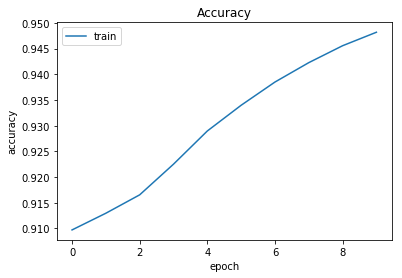

In [26]:
#Plot - Accuracy
plt.plot(history.history['acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend(['train','val'])
plt.show()


In [27]:
result = pd.DataFrame({"ID_code": test['ID_code'], "target": pred[:,0]})
result.head()

,ID_code,target
0,test_0,0.290256
1,test_1,0.184680
2,test_2,0.020023
3,test_3,0.258097
4,test_4,0.020023


In [27]:
result.to_csv("C:/Users/Katta's/PycharmProjects/data/usecase1/submission1.csv", index=False)